## Set File Paths and Define Important Features to Analyze

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

UCLA_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/UCLAIDx_Task78_Lesion_info.csv'
NLST_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/NLST_merged_lesion_info.csv'
LIDC_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/LIDC_lesion_info_maybe.csv'

NODULE_LIST_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/images_and_segpaths_2024-12-11-checkpoint.csv'

UCLA_MAP_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/data_mapping_UCLA.csv'
NLST_MAP_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/data_mapping_NLST.csv'
LIDC_MAP_CSV_PATH = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/data_mapping_LIDC.csv'

ucla_csv = pd.read_csv(UCLA_CSV_PATH, index_col=0)
nlst_csv = pd.read_csv(NLST_CSV_PATH)
lidc_csv = pd.read_csv(LIDC_CSV_PATH, index_col=0)

ucla_mapping = pd.read_csv(UCLA_MAP_CSV_PATH,)
nlst_mapping = pd.read_csv(NLST_MAP_CSV_PATH)
lidc_mapping = pd.read_csv(LIDC_MAP_CSV_PATH)

nodule_list = pd.read_csv(NODULE_LIST_PATH)

ucla_features = ["patient_id", "nodule_id", "dr_diaag_code", "nodule_category", "consistency", 
                 "location", "margins", "suspicion", "diam_long", "diam_small"]

nlst_features = ["pid", "nodule_id", "level_of_suspicion_of_lung_cancer", 
                 "slice_thickness", "kernel", "scanner_manufacturer", "scanner_model",  "axial_location",
                 "longest_axial_diameter_(mm)", "short_diameter_(mm)", "nodule_margin_conspicuity", "nodule_margins",
                 "additional_nodule_margins", "nodule_shape", "nodule_consistency", "cyst-like_spaces",
                 "pleural_attachment", "pleural_retraction", "vascular_convergence", "septal_stretching",
                 "paracicatricial_emphysema", "predominant_nature_of_lung_parenchyma", "fibrosis",
                 "fibrosis_distribution"]
lidc_features = ["pid", "nodule_id", "sphericity", "lobulation", "texture", "margin", "spiculation", "malignancy",
                 "diameter", "internalStructure", "calcification"]
nodule_list_features = ["pid", "texture", "scanner", "study_desc"]

display(ucla_mapping.head())

Image Path  \
0  /hsuraid/data/idx_data_request_78/Images_and_A...   
1  /hsuraid/data/idx_data_request_78/Images_and_A...   
2  /hsuraid/data/idx_data_request_78/Images_and_A...   
3  /hsuraid/data/idx_data_request_78/Images_and_A...   
4  /hsuraid/data/idx_data_request_78/Images_and_A...   

                                           Mask Path New Filename  
0  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA1  
1  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA2  
2  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA3  
3  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA4  
4  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA5

### Trim the First Two Directories from the image path
* **This allow relating dataframes easier**

In [2]:
def add_base_image_path(df):
    search_column = ['Image Path', 'image_path']
    keys = df.keys()
    for key in keys:
        if key in search_column:
            column = key
            break

    image_paths = df[column].values
    base_image_paths = []
    for image_path in image_paths:
        cleaned_image_path = '/'.join(image_path.split('/')[3:])
        base_image_paths.append(cleaned_image_path)
    df['base_image_path'] = base_image_paths
    return df

ucla_csv = add_base_image_path(ucla_csv)
nlst_csv = add_base_image_path(nlst_csv)
lidc_csv = add_base_image_path(lidc_csv)
ucla_mapping = add_base_image_path(ucla_mapping)
nlst_mapping = add_base_image_path(nlst_mapping)
lidc_mapping = add_base_image_path(lidc_mapping)

display_head = True
if display_head:
    display(ucla_csv.head())
    display(ucla_mapping.head())
    display(nlst_mapping.head())
    display(lidc_mapping.head())



research_id_x  experiment_id        patient_id study_date modality  \
0    1_2Q7AHP17          10064  10064_1_2Q7AHP17   9/7/2020       CT   
1    1_3I9AZJ84          10057  10057_1_3I9AZJ84  6/30/2022       CT   
2    1_3VQBXT77          10064  10064_1_3VQBXT77  3/26/2018       CT   
3    1_00SRWV59          10064  10064_1_00SRWV59  7/23/2020       CT   
4    1_00SRWV59          10064  10064_1_00SRWV59  8/24/2020       CT   

                      label_series_description initials marking_type  \
0  CT Full (thin) Chest at TLC Supine Low Dose      GCF         TgLs   
1           CT Full (thin) Chest at TLC Supine      CEM         TgLs   
2            CT Full (thin) Chest at TLC Prone      GCF         TgLs   
3           CT Full (thin) Chest at TLC Supine      GCF         TgLs   
4   CT Full (thin) Chest at TLC Prone Low Dose      GCF         TgLs   

   diaag_lesion_id_x  Study_ID  ... quantifiers_cribriform  \
0          500008964  IDX_Lung  ...                      .   
1          500075898  IDX_Lung  ...                      .   
2          500006052  IDX_Lung  ...                      .   
3          500064094  IDX_Lung  ...                      .   
4          500009222  IDX_Lung  ...                      .   

  quantifiers_signet_rin  quantifiers_adenoca_ot  quantifiers_adenoca_no  \
0                      .                       .                       .   
1                      .                       .                       .   
2                      .                       .                       .   
3                      .                       .                       .   
4                      .                       .                       .   

  hist_type_quant_spec ageAt_exam_date  \
0                  NaN            66.0   
1                  NaN            84.0   
2                  NaN            67.0   
3                  NaN            80.0   
4                  NaN            80.0   

                                          image_path study_date_dt  \
0  /radraid/whsu/idx_data_request_78/Images_and_A...      9/7/2020   
1  /radraid/whsu/idx_data_request_78/Images_and_A...     6/30/2022   
2  /radraid/whsu/idx_data_request_78/Images_and_A...     3/26/2018   
3  /radraid/whsu/idx_data_request_78/Images_and_A...     7/23/2020   
4  /radraid/whsu/idx_data_request_78/Images_and_A...     8/24/2020   

                                            seg_path  \
0                                                NaN   
1                                                NaN   
2  /radraid/whsu/idx_data_request_78/Images_and_A...   
3  /radraid/whsu/idx_data_request_78/Images_and_A...   
4  /radraid/whsu/idx_data_request_78/Images_and_A...   

                                     base_image_path  
0  idx_data_request_78/Images_and_Annotations/100...  
1  idx_data_request_78/Images_and_Annotations/100...  
2  idx_data_request_78/Images_and_Annotations/100...  
3  idx_data_request_78/Images_and_Annotations/100...  
4  idx_data_request_78/Images_and_Annotations/100...  

[5 rows x 82 columns]

Image Path  \
0  /hsuraid/data/idx_data_request_78/Images_and_A...   
1  /hsuraid/data/idx_data_request_78/Images_and_A...   
2  /hsuraid/data/idx_data_request_78/Images_and_A...   
3  /hsuraid/data/idx_data_request_78/Images_and_A...   
4  /hsuraid/data/idx_data_request_78/Images_and_A...   

                                           Mask Path New Filename  \
0  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA1   
1  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA2   
2  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA3   
3  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA4   
4  /hsuraid/data/idx_data_request_78/Images_and_A...        UCLA5   

                                     base_image_path  
0  idx_data_request_78/Images_and_Annotations/100...  
1  idx_data_request_78/Images_and_Annotations/100...  
2  idx_data_request_78/Images_and_Annotations/100...  
3  idx_data_request_78/Images_and_Annotations/100...  
4  idx_data_request_78/Images_and_Annotations/100...

Image Path  \
0  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
1  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
2  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
3  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
4  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   

                                           Mask Path New Filename  \
0  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...        NLST1   
1  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...        NLST2   
2  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...        NLST3   
3  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...        NLST4   
4  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...        NLST5   

                                     base_image_path  
0  Ticket8859/AnnotationPlusImage/10076_101444/20...  
1  Ticket8859/AnnotationPlusImage/10076_101499/19...  
2  Ticket8859/AnnotationPlusImage/10076_101506/20...  
3  Ticket8859/AnnotationPlusImage/10076_101506/20...  
4  Ticket8859/AnnotationPlusImage/10076_101506/20...

Image Path  \
0  /radraid/luotingzhuang/dataset/LIDC/LIDC_nifti...   
1  /radraid/luotingzhuang/dataset/LIDC/LIDC_nifti...   
2  /radraid/luotingzhuang/dataset/LIDC/LIDC_nifti...   
3  /radraid/luotingzhuang/dataset/LIDC/LIDC_nifti...   
4  /radraid/luotingzhuang/dataset/LIDC/LIDC_nifti...   

                                           Mask Path New Filename  \
0  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...        LIDC1   
1  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...        LIDC2   
2  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...        LIDC3   
3  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...        LIDC4   
4  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...        LIDC5   

                                     base_image_path  
0  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0001/1.3.6.1...  
1  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0002/1.3.6.1...  
2  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...  
3  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...  
4  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...

## Assign npy Image Filename to the Existing Dataframe

In [3]:
def assign_npy_image_filename(df, mapping_df, column_name):
    df_copy = df.copy()

    for index, row in mapping_df.iterrows():
        base_image_path = row['base_image_path']
        new_filename = row['New Filename']

        nodules = df_copy[df_copy['base_image_path'] == base_image_path]

        if len(nodules) > 1:
            multiple_im_paths = mapping_df[mapping_df['base_image_path'] == base_image_path]

            if len(multiple_im_paths) == len(nodules):
                print(f"Multiple nodules found for {base_image_path}")
                print(nodules.index.values)
                print(multiple_im_paths.index.values)

                for i, nodule_index in enumerate(nodules.index.values):
                    df_copy.loc[nodule_index, 'New Filename'] = multiple_im_paths.iloc[i]['New Filename']
                    print(f"Updated {nodule_index} to {multiple_im_paths.iloc[i]['New Filename']}")

            else:
                print(f"Multiple nodules found for {base_image_path}")
                print(nodules.index.values)
                print(multiple_im_paths.index.values)

                for i, nodule_index in enumerate(nodules.index.values):
                    df_copy.loc[nodule_index, 'New Filename'] = new_filename
                    print(f"Updated {nodule_index} to {new_filename}")

        elif len(nodules) == 0:
            print(f"No nodules found for {base_image_path}")
            print(nodules)
            break

        else:
            nodule_index = nodules.index.values[0]
            df_copy.loc[nodule_index, 'New Filename'] = new_filename
    
    return df_copy

# NLST
nlst_csv = assign_npy_image_filename(nlst_csv, nlst_mapping, 'New Filename')
display(nlst_csv.head())

nlst_csv.to_csv(NLST_CSV_PATH.replace('.csv', '_updated.csv'), index=False)

# UCLA
ucla_csv = assign_npy_image_filename(ucla_csv, ucla_mapping, 'New Filename')
display(ucla_csv.head())

ucla_csv.to_csv(UCLA_CSV_PATH.replace('.csv', '_updated.csv'), index=False)

# LIDC
lidc_csv = assign_npy_image_filename(lidc_csv, lidc_mapping, 'New Filename')
display(lidc_csv.head())

lidc_csv.to_csv(LIDC_CSV_PATH.replace('.csv', '_updated.csv'), index=False)




Multiple nodules found for Ticket8859/AnnotationPlusImage/10076_101506/2001-01-02/CT-Chest-at-TLC-Supine-1.2.840.113654.2.55.83966432883392044857482701051371721171/Contours/NIFTI/image.nii.gz
[12 13 14]
[2 3 4]
Updated 12 to NLST3
Updated 13 to NLST4
Updated 14 to NLST5
Multiple nodules found for Ticket8859/AnnotationPlusImage/10076_101506/2001-01-02/CT-Chest-at-TLC-Supine-1.2.840.113654.2.55.83966432883392044857482701051371721171/Contours/NIFTI/image.nii.gz
[12 13 14]
[2 3 4]
Updated 12 to NLST3
Updated 13 to NLST4
Updated 14 to NLST5
Multiple nodules found for Ticket8859/AnnotationPlusImage/10076_101506/2001-01-02/CT-Chest-at-TLC-Supine-1.2.840.113654.2.55.83966432883392044857482701051371721171/Contours/NIFTI/image.nii.gz
[12 13 14]
[2 3 4]
Updated 12 to NLST3
Updated 13 to NLST4
Updated 14 to NLST5
Multiple nodules found for Ticket8859/AnnotationPlusImage/10076_101736/1999-01-02/CT-Chest-at-TLC-Supine-1.2.840.113654.2.55.170370214347688322789974067061887144471/Contours/NIFTI/image.n

cohort  training     pid      year  nodule_id  \
0   NLST         1  100005  1/2/1999          0   
1   NLST         1  100280  1/2/2000          0   
2   NLST         1  100658  1/2/2001          0   
3   NLST         1  100658  1/2/2001          1   
4   NLST         1  100658  1/2/2001          2   

                                          image_path  \
0  /workspace/radraid/dataset/NLST_CT_annotations...   
1  /workspace/radraid/dataset/NLST_CT_annotations...   
2  /workspace/radraid/dataset/NLST_CT_annotations...   
3  /workspace/radraid/dataset/NLST_CT_annotations...   
4  /workspace/radraid/dataset/NLST_CT_annotations...   

                                         nodule_path      coordX     coordY  \
0  /workspace/radraid/NLST_CT_annotations/10076_1...  -94.413292  21.114596   
1  /workspace/radraid/NLST_CT_annotations/10076_1...   84.837933 -84.782630   
2  /workspace/radraid/NLST_CT_annotations/10076_1...  116.256209  58.520180   
3  /workspace/radraid/NLST_CT_annotations/10076_1... -127.159699  55.025046   
4  /workspace/radraid/NLST_CT_annotations/10076_1... -104.779234  73.263519   

       coordZ  ...  fibrosis  fibrosis_distribution       lymphadenopathy  \
0  -79.142212  ...   Present                  Focal  Yes, likely reactive   
1 -186.694267  ...   Present                  Focal                    No   
2 -171.218793  ...    Absent                    NaN                    No   
3 -207.821990  ...    Absent                    NaN                    No   
4 -189.616438  ...    Absent                    NaN                    No   

  prior_scans prior_year nodule_pre-existence nodule_size  \
0          No        NaN                  NaN         NaN   
1         Yes   1/2/1999                  Yes   Increased   
2         Yes   1/2/2000                  Yes   Increased   
3         Yes   1/2/2000                  Yes      Stable   
4         Yes   1/2/2000                  Yes      Stable   

          nodule_consistency.1  \
0                          NaN   
1  Increased attenuation focal   
2                       Stable   
3                       Stable   
4                       Stable   

                                     base_image_path  New Filename  
0  dataset/NLST_CT_annotations/10076_100005/1999-...           NaN  
1  dataset/NLST_CT_annotations/10076_100280/2000-...           NaN  
2  dataset/NLST_CT_annotations/10076_100658/2001-...           NaN  
3  dataset/NLST_CT_annotations/10076_100658/2001-...           NaN  
4  dataset/NLST_CT_annotations/10076_100658/2001-...           NaN  

[5 rows x 54 columns]

Multiple nodules found for idx_data_request_78/Images_and_Annotations/10057/10057_1_127FF332/2019-11-21/CT_Full_(thin)_Chest_at_TLC_Supine--1.3.12.2.1107.5.1.4.51964.30000019022115252629600000000/Contours/NIFTI/image.nii.gz
[97 98]
[80]
Updated 97 to UCLA81
Updated 98 to UCLA81
Multiple nodules found for idx_data_request_78/Images_and_Annotations/10057/10057_1_284W5K7R/2022-09-16/CT_Full_(thin)_Chest_at_TLC_Supine--1.3.12.2.1107.5.1.4.73938.30050021121715162637900011708/Contours/NIFTI/image.nii.gz
[180 181]
[161]
Updated 180 to UCLA162
Updated 181 to UCLA162
Multiple nodules found for idx_data_request_78/Images_and_Annotations/10057/10057_1_2A7961FF/2024-08-16/CT_Partial_(thin)_Chest_at_TLC_Supine_Low_Dose--1.3.12.2.1107.5.1.4.76430.30000022111814331039400047008/Contours/NIFTI/image.nii.gz
[186 187]
[165]
Updated 186 to UCLA166
Updated 187 to UCLA166
Multiple nodules found for idx_data_request_78/Images_and_Annotations/10057/10057_1_3E2Z5D96/2020-04-21/CT_Full_(thin)_Chest_at_TLC_Supin

research_id_x  experiment_id        patient_id study_date modality  \
0    1_2Q7AHP17          10064  10064_1_2Q7AHP17   9/7/2020       CT   
1    1_3I9AZJ84          10057  10057_1_3I9AZJ84  6/30/2022       CT   
2    1_3VQBXT77          10064  10064_1_3VQBXT77  3/26/2018       CT   
3    1_00SRWV59          10064  10064_1_00SRWV59  7/23/2020       CT   
4    1_00SRWV59          10064  10064_1_00SRWV59  8/24/2020       CT   

                      label_series_description initials marking_type  \
0  CT Full (thin) Chest at TLC Supine Low Dose      GCF         TgLs   
1           CT Full (thin) Chest at TLC Supine      CEM         TgLs   
2            CT Full (thin) Chest at TLC Prone      GCF         TgLs   
3           CT Full (thin) Chest at TLC Supine      GCF         TgLs   
4   CT Full (thin) Chest at TLC Prone Low Dose      GCF         TgLs   

   diaag_lesion_id_x  Study_ID  ... quantifiers_signet_rin  \
0          500008964  IDX_Lung  ...                      .   
1          500075898  IDX_Lung  ...                      .   
2          500006052  IDX_Lung  ...                      .   
3          500064094  IDX_Lung  ...                      .   
4          500009222  IDX_Lung  ...                      .   

  quantifiers_adenoca_ot  quantifiers_adenoca_no  hist_type_quant_spec  \
0                      .                       .                   NaN   
1                      .                       .                   NaN   
2                      .                       .                   NaN   
3                      .                       .                   NaN   
4                      .                       .                   NaN   

  ageAt_exam_date                                         image_path  \
0            66.0  /radraid/whsu/idx_data_request_78/Images_and_A...   
1            84.0  /radraid/whsu/idx_data_request_78/Images_and_A...   
2            67.0  /radraid/whsu/idx_data_request_78/Images_and_A...   
3            80.0  /radraid/whsu/idx_data_request_78/Images_and_A...   
4            80.0  /radraid/whsu/idx_data_request_78/Images_and_A...   

  study_date_dt                                           seg_path  \
0      9/7/2020                                                NaN   
1     6/30/2022                                                NaN   
2     3/26/2018  /radraid/whsu/idx_data_request_78/Images_and_A...   
3     7/23/2020  /radraid/whsu/idx_data_request_78/Images_and_A...   
4     8/24/2020  /radraid/whsu/idx_data_request_78/Images_and_A...   

                                     base_image_path New Filename  
0  idx_data_request_78/Images_and_Annotations/100...          NaN  
1  idx_data_request_78/Images_and_Annotations/100...          NaN  
2  idx_data_request_78/Images_and_Annotations/100...        UCLA1  
3  idx_data_request_78/Images_and_Annotations/100...        UCLA2  
4  idx_data_request_78/Images_and_Annotations/100...        UCLA3  

[5 rows x 83 columns]

Multiple nodules found for dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276577556143013894866/1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264/img.nii.gz
[2 3 4 5]
[2 3 4 5]
Updated 2 to LIDC3
Updated 3 to LIDC4
Updated 4 to LIDC5
Updated 5 to LIDC6
Multiple nodules found for dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276577556143013894866/1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264/img.nii.gz
[2 3 4 5]
[2 3 4 5]
Updated 2 to LIDC3
Updated 3 to LIDC4
Updated 4 to LIDC5
Updated 5 to LIDC6
Multiple nodules found for dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1.4.1.14519.5.2.1.6279.6001.101370605276577556143013894866/1.3.6.1.4.1.14519.5.2.1.6279.6001.170706757615202213033480003264/img.nii.gz
[2 3 4 5]
[2 3 4 5]
Updated 2 to LIDC3
Updated 3 to LIDC4
Updated 4 to LIDC5
Updated 5 to LIDC6
Multiple nodules found for dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1.4.1.14519.5.2.1.6

pid  nodule_id  sphericity  lobulation  texture  margin  \
0  LIDC-IDRI-0001          0         3.5         3.0      5.0     3.5   
1  LIDC-IDRI-0002          0         4.0         1.0      1.5     1.5   
2  LIDC-IDRI-0003          0         5.0         1.0      1.0     2.0   
3  LIDC-IDRI-0003          1         4.0         2.0      4.0     3.0   
4  LIDC-IDRI-0003          2         3.5         1.5      5.0     4.0   

   spiculation  malignancy   diameter           x  ...  internalStructure  \
0          4.5         5.0  32.697290  366.729124  ...                  1   
1          1.0         4.5  30.781671  361.162287  ...                  1   
2          1.0         2.0  31.664468  346.394690  ...                  1   
3          2.5         4.5  30.234699  350.301547  ...                  1   
4          1.5         3.5  13.252157  197.914588  ...                  1   

   calcification     coordX     coordY   coordZ  \
0              6  55.835938  85.292191 -118.750   
1              6  59.325319  71.231590 -103.875   
2              6  72.664665  73.417788 -215.250   
3              6  71.024041  76.699036 -192.750   
4              6  22.625632 -48.808703 -175.250   

                                     image_path_abhi  \
0  /workspace/radraid/dataset/LIDC/LIDC_nifti/LID...   
1  /workspace/radraid/dataset/LIDC/LIDC_nifti/LID...   
2  /workspace/radraid/dataset/LIDC/LIDC_nifti/LID...   
3  /workspace/radraid/dataset/LIDC/LIDC_nifti/LID...   
4  /workspace/radraid/dataset/LIDC/LIDC_nifti/LID...   

                                            seg_path   texture_text  \
0  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...          Solid   
1  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...  Non-Solid/GGO   
2  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...  Non-Solid/GGO   
3  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...    Solid/Mixed   
4  /radraid/luotingzhuang/dataset/LIDC/LIDC_seg_n...          Solid   

                                     base_image_path New Filename  
0  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0001/1.3.6.1...        LIDC1  
1  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0002/1.3.6.1...        LIDC2  
2  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...        LIDC3  
3  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...        LIDC4  
4  dataset/LIDC/LIDC_nifti/LIDC-IDRI-0003/1.3.6.1...        LIDC5  

[5 rows x 23 columns]

## Clean Up The UCLA_CSV

In [4]:
updated__csv = pd.read_csv(UCLA_CSV_PATH.replace('.csv', '_updated.csv'))

# Count the number of rows with empty New Filename and the number of unique non-empty New Filenames
valuecounts = updated__csv['New Filename'].value_counts(dropna=False)
print(f"{valuecounts.keys()[0]}: {valuecounts.values[0]}")
print(f"Multiple Filenames: {valuecounts[valuecounts > 1]}\n")
print(f"Total Non Empty Unique Filenames: {len(valuecounts)-1}")
print(f"Total rows: {len(updated__csv)}")

# Clean the dataframe by dropping rows with empty New Filename and sorting by New Filename
cleaned_csv = updated__csv[updated__csv['New Filename'].notna()]
cleaned_sorted_csv = cleaned_csv.sort_values(by='New Filename', key=lambda x: x.str.strip('UCLA').astype(int))

# Function to drop the first duplicate of a column
def drop_first_duplicate(df, column):
    df = df.sort_values(by=column)
    df = df.drop_duplicates(subset=column, keep='first')
    return df

cleaned_sorted_csv = drop_first_duplicate(cleaned_sorted_csv, 'New Filename')
cleaned_sorted_csv = cleaned_sorted_csv.sort_values(by='New Filename', key=lambda x: x.str.strip('UCLA').astype(int))

# Count the number of rows of the cleaned dataframe and the number of unique New Filenames
print('\nCleaned Ucla CSV')
print(f"Total rows: {len(cleaned_sorted_csv)}")
print(f"Total unique New Filenames: {len(cleaned_sorted_csv['New Filename'].unique())}")


nan: 61
Multiple Filenames: New Filename
NaN        61
UCLA424     2
UCLA166     2
UCLA882     2
UCLA389     2
UCLA688     2
UCLA81      2
UCLA497     2
UCLA233     2
UCLA544     2
UCLA468     2
UCLA162     2
UCLA612     2
Name: count, dtype: int64

Total Non Empty Unique Filenames: 1075
Total rows: 1148

Cleaned Ucla CSV
Total rows: 1075
Total unique New Filenames: 1075


Dataset Counts:
dataset
UCLA    1075
NLST     245
Name: count, dtype: int64

Mean Dice Score per Dataset:
dataset
NLST    0.660543
UCLA    0.757714
Name: dice_score, dtype: float64

T-test results:
T-statistic: 7.1092
P-value: 0.0000000000

The difference in mean Dice scores between UCLA and NLST is statistically significant (p < 0.05).


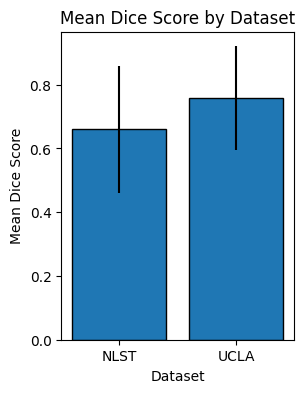

In [5]:
import scipy.stats as stats

result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46.csv'
result_df = pd.read_csv(result_path)
result_df['dataset'] = ['UCLA' if 'UCLA' in pid else 'NLST' for pid in result_df['pid']]

result_df.to_csv(result_path.replace('.csv', '_updated.csv'), index=False)

print("Dataset Counts:")
print(result_df['dataset'].value_counts())

print("\nMean Dice Score per Dataset:")
dice_score_mean = result_df.groupby('dataset')['dice_score'].mean()
dice_score_std = result_df.groupby('dataset')['dice_score'].std()
print(dice_score_mean)

# Separate dice scores for each dataset
ucla_scores = result_df[result_df['dataset'] == 'UCLA']['dice_score']
nlst_scores = result_df[result_df['dataset'] == 'NLST']['dice_score']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(ucla_scores, nlst_scores, equal_var=False) # Assuming unequal variances (Welch's t-test)

print(f"\nT-test results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

# Check for significance
alpha = 0.05
if p_value < alpha:
    print(f"\nThe difference in mean Dice scores between UCLA and NLST is statistically significant (p < {alpha}).")
else:
    print(f"\nThe difference in mean Dice scores between UCLA and NLST is not statistically significant (p >= {alpha}).")


# Plotting the mean dice scores
plt.figure(figsize=(3, 4))  
plt.bar(dice_score_mean.index, dice_score_mean.values, yerr=dice_score_std.values, edgecolor='black')
plt.xlabel('Dataset')
plt.ylabel('Mean Dice Score')
plt.title('Mean Dice Score by Dataset')
plt.show()


## Combined Result and Metadata then trim the UCLA Dataset

In [6]:
result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated.csv'
result_df = pd.read_csv(result_path)

ucla_result_df = result_df[result_df['pid'].str.startswith('UCLA')]
ucla_result_df = ucla_result_df.sort_values(by='pid', key=lambda x: x.str.strip('UCLA').astype(int)).reset_index(drop=True)

# change the column name of the ucla_result_df to New Filename
ucla_result_df.rename(columns={'pid': 'New Filename'}, inplace=True)

print(len(ucla_result_df))
ucla_result_df.head()

all_keys = cleaned_sorted_csv['New Filename'].unique().tolist()
for key in all_keys:
    if key not in ucla_result_df['New Filename'].values:
        print(key)

ucla_combined_df = cleaned_sorted_csv.copy().merge(ucla_result_df, on='New Filename', how='left')
display(ucla_combined_df.head())
ucla_combined_df.to_csv('/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/UCLAIDx_Task78_Lesion_info_updated_with_results.csv', index=False)

# Store the keys that are not needed found from the value counts
ignore_keys = ['research_id_x', 'nodule_id', 'seg_path', 'image_path', 
               'base_image_path', 'comment', 'research_id_y', 'study_date_dt', 'study_date', 'shifted_exam_date',
               'diaag_lesion_id_x', 'diaag_lesion_id_y', 'hash_accession', 'nodule_quantity_category']

empty_keys = ['parent_observation_id', 't_size', 't_invasion', 't_carina', 't_atelectasis', 't_satellites', 
              't_status', 'tnm_clinical_stage', 'ucsf_rad_app_barcode', 'hist_type', 'hist_type_detail', 
              'tumor_highest_hist_grade', 'hist_type_detail_comment', 'hist_type_other', 'hist_type_quant_spec',
              'modality', 'marking_type', 'Study_ID', 'TNAM', 'diaag_code', 'quantifiers_lepidic_pa', 
              'quantifiers_acinar_pat', 'quantifiers_papillary_', 'quantifiers_micropapil', 'quantifiers_solid_patt', 
              'quantifiers_mucinous_a', 'quantifiers_cribriform', 'quantifiers_signet_rin', 'quantifiers_adenoca_ot', 
              'quantifiers_adenoca_no']

# Keys with too many NaN values (more than 90%)
nan_keys = ['fiss_cross', 'multiple_nodules_yn', 'nodule_radioactivity_other', 'calcification_other', 'nodule_suv_max', 
            'nonpsn_atten_change', 'calcification', 'subsolid_psn_atten_change', 'solid_psn_atten_change', 
            'subsolid_psn_size_change', 'subsolid_psn_stable_yn', 'psn_size_value', 'psn_size_operator', 'orig_nodule_idx']

# change all '.' values to 'nan'
ucla_combined_df = ucla_combined_df.replace('.', np.nan)

# Check the value counts of each column to see if there are any columns that are not needed

#for key in ucla_combined_df.keys():
#    if key not in ignore_keys and key not in empty_keys and key not in nan_keys:
#        print(ucla_combined_df[key].value_counts(dropna=False))
#        print()

# Drop the columns that are not needed and save the trimmed dataframe
trimmed_df = ucla_combined_df.drop(columns=ignore_keys + empty_keys + nan_keys)
trimmed_df.to_csv(result_path.replace('.csv', '_trimmed_UCLA.csv'), index=False)

1075


research_id_x  experiment_id        patient_id  study_date modality  \
0    1_3VQBXT77          10064  10064_1_3VQBXT77   3/26/2018       CT   
1    1_00SRWV59          10064  10064_1_00SRWV59   7/23/2020       CT   
2    1_00SRWV59          10064  10064_1_00SRWV59   8/24/2020       CT   
3    1_00SSIM8B          10064  10064_1_00SSIM8B   3/12/2019       CT   
4    1_0167K414          10064  10064_1_0167K414  12/18/2023       CT   

                     label_series_description initials marking_type  \
0           CT Full (thin) Chest at TLC Prone      GCF         TgLs   
1          CT Full (thin) Chest at TLC Supine      GCF         TgLs   
2  CT Full (thin) Chest at TLC Prone Low Dose      GCF         TgLs   
3  CT Full (thin) Chest at TLC Prone Low Dose      GCF         TgLs   
4          CT Full (thin) Chest at TLC Supine      GCF         TgLs   

   diaag_lesion_id_x  Study_ID  ... ageAt_exam_date  \
0          500006052  IDX_Lung  ...            67.0   
1          500064094  IDX_Lung  ...            80.0   
2          500009222  IDX_Lung  ...            80.0   
3          500006585  IDX_Lung  ...            62.0   
4          500104078  IDX_Lung  ...            49.0   

                                          image_path  study_date_dt  \
0  /radraid/whsu/idx_data_request_78/Images_and_A...      3/26/2018   
1  /radraid/whsu/idx_data_request_78/Images_and_A...      7/23/2020   
2  /radraid/whsu/idx_data_request_78/Images_and_A...      8/24/2020   
3  /radraid/whsu/idx_data_request_78/Images_and_A...      3/12/2019   
4  /radraid/whsu/idx_data_request_78/Images_and_A...     12/18/2023   

                                            seg_path  \
0  /radraid/whsu/idx_data_request_78/Images_and_A...   
1  /radraid/whsu/idx_data_request_78/Images_and_A...   
2  /radraid/whsu/idx_data_request_78/Images_and_A...   
3  /radraid/whsu/idx_data_request_78/Images_and_A...   
4  /radraid/whsu/idx_data_request_78/Images_and_A...   

                                     base_image_path New Filename num_slices  \
0  idx_data_request_78/Images_and_Annotations/100...        UCLA1          7   
1  idx_data_request_78/Images_and_Annotations/100...        UCLA2          5   
2  idx_data_request_78/Images_and_Annotations/100...        UCLA3          7   
3  idx_data_request_78/Images_and_Annotations/100...        UCLA4          4   
4  idx_data_request_78/Images_and_Annotations/100...        UCLA5         10   

  pos_voxels  dice_score dataset  
0         92    0.890000    UCLA  
1         88    0.864583    UCLA  
2        106    0.840336    UCLA  
3         39    0.891566    UCLA  
4        664    0.747073    UCLA  

[5 rows x 87 columns]

/tmp/ipykernel_2159179/3147972722.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ucla_combined_df = ucla_combined_df.replace('.', np.nan)


In [14]:
result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_UCLA.csv'
trimmed_df = pd.read_csv(result_path)
print(trimmed_df.keys())

Index(['experiment_id', 'patient_id', 'label_series_description', 'initials',
       'dr_diaag_code', 'nodule_category', 'img_series_num', 'img_slice_num',
       'consistency', 'location', 'margins', 'evolution', 'suspicion',
       'nodule_rads', 'nodule_measurement', 'diam_long', 'diam_small',
       'potential_clinical_stage_yn', 'nonpsn_size_change_yn',
       'nonpsn_size_change', 'nonpsn_atten_change_yn', 'nodule_radioactivity',
       'known_primary_cancer', 'ageAt_exam_date', 'New Filename', 'num_slices',
       'pos_voxels', 'dice_score', 'dataset'],
      dtype='object')


Generating average 'dice_score' plot for feature: diam_long (dtype: float64)
  Binning numeric feature 'diam_long' (68 unique values) for plotting.


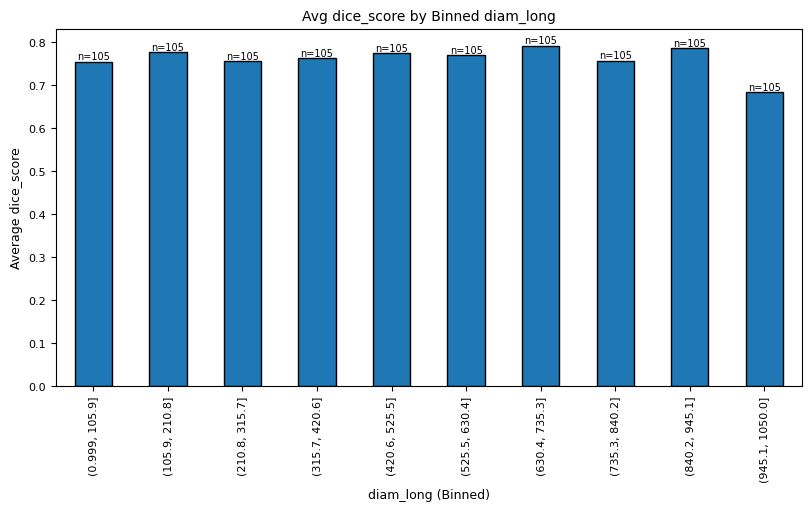

Finished generating plot for diam_long.


In [15]:
result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_UCLA.csv'
trimmed_df = pd.read_csv(result_path)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # Import seaborn for potentially better categorical plots
import math

# Note: create_histogram_continuous and create_barplot_categorical are no longer used by generate_single_plot
# but might be useful elsewhere, or could be removed if not needed.
def create_histogram_continuous(df, key, ax):
    """Plots a histogram for a continuous numerical column on a given Axes."""
    # Check if data exists and is not all NaN after dropping NaNs
    data = df[key].dropna()
    if data.empty:
        print(f"  Skipping {key}: No valid data points.")
        return False # Indicate plot was not created

    ax.hist(data, bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {key}')
    ax.set_xlabel(key)
    ax.set_ylabel('Frequency')
    return True # Indicate plot was created

def create_barplot_categorical(df, key, ax, top_n=30):
    """Plots a bar chart for a categorical column on a given Axes, showing top N categories."""
    # Check if data exists
    if df[key].isnull().all():
        print(f"  Skipping {key}: Column is all NaN.")
        return False

    # Calculate value counts, handling potential NaN categories explicitly if needed
    counts = df[key].value_counts(dropna=False) # Include NaNs if present

    # Limit the number of categories shown for clarity
    original_count = len(counts)
    if original_count > top_n:
        print(f"  Showing top {top_n} categories for {key} (out of {original_count}).")
        counts = counts.head(top_n)

    if counts.empty:
        print(f"  Skipping {key}: No categories found after filtering.")
        return False

    # Using pandas plot directly on the specified axes:
    counts.plot(kind='bar', edgecolor='black', ax=ax)
    ax.set_title(f'Frequency of Categories in {key}')
    ax.set_xlabel(key)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45) # Rotate labels for better readability

    # Add counts on top of the bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
                f'{int(bar.get_height())}', # Display the count (height of the bar)
                ha='center', va='bottom', fontsize=9)

    return True

# Assuming trimmed_df is loaded correctly before this cell
# df_keys = list(trimmed_df.keys()) # This line is not strictly necessary if generate_all_histograms iterates df.columns
# print(df_keys)

ignore_keys = ['New Filename', 'dataset', 'patient_id']
interested_keys = ['location', 'margins', 'consistency', 'dr_diaag_code', 'evolution', 'suspicion', 'nodule_rads',
                   'nodule_measurement', 'diam_long', 'nodule_radioactivity', 'known_primary_cancer', 'num_slices', 'pos_voxels']


def generate_average_metric_by_feature_on_ax(df, metric_col, key, ax, top_n_cat=30):
    """
    Computes and plots the average metric score grouped by a feature column's
    values onto a given Matplotlib Axes object. Annotates bars with sample count.
    Handles categorical and binned numerical features. Returns True if plot is successful.
    """
    # Use a temporary df containing only the feature and metric, drop rows where EITHER is NaN
    temp_df = df[[key, metric_col]].dropna()
    if temp_df.empty:
         print(f"  Skipping {key}: No overlapping non-NaN data with {metric_col}.")
         return False

    # Decide plotting strategy based on feature type and unique values
    is_numeric = pd.api.types.is_numeric_dtype(temp_df[key])
    unique_count = temp_df[key].nunique() # Use nunique on the dropped-NaN temp_df

    grouping_key = key
    plot_xlabel = key
    binned = False

    # If numeric with many unique values, bin it first
    if is_numeric and unique_count > top_n_cat:
        print(f"  Binning numeric feature '{key}' ({unique_count} unique values) for plotting.")
        try:
            # Use pd.qcut for quantile-based bins
            binned_col = f'{key}_binned'
            # Ensure bins are unique, otherwise qcut fails. Use rank(method='first') to handle ties.
            temp_df[binned_col] = pd.qcut(temp_df[key].rank(method='first'), q=min(top_n_cat, 10), duplicates='drop')
            grouping_key = binned_col
            plot_xlabel = f'{key} (Binned)'
            binned = True
            # When grouping by IntervalIndex, need to handle potential non-observed intervals if any
            # Use observed=True if pandas version supports it and it's desired behavior
            grouped_stats = temp_df.groupby(grouping_key, observed=True)[metric_col].agg(['mean', 'count'])
            plot_title = f'Avg {metric_col} by Binned {key}'
            # Convert IntervalIndex to string for plotting labels if needed, or rely on pandas plotting
            grouped_stats.index = grouped_stats.index.astype(str)


        except ValueError as ve: # Handle cases where qcut fails
             print(f"    Could not bin {key} effectively ({ve}), plotting unique values.")
             grouped_stats = temp_df.groupby(key)[metric_col].agg(['mean', 'count']).sort_index()
             plot_title = f'Avg {metric_col} by {key}'
             if len(grouped_stats) > top_n_cat * 1.5:
                 print(f"    Warning: Plotting {len(grouped_stats)} unique numeric values for {key}. May be cluttered.")

    # If categorical or numeric with few unique values, group directly
    else:
        print(f"  Grouping by categorical or low-cardinality numeric feature '{key}'.")
        # Ensure grouping key is treated appropriately (e.g., convert bools/categories explicitly if needed)
        grouped_stats = temp_df.groupby(key)[metric_col].agg(['mean', 'count'])

        # If categorical and too many unique values, show top N by frequency in original data
        if not is_numeric and unique_count > top_n_cat:
             print(f"    Showing top {top_n_cat} categories for '{key}' based on frequency.")
             # Get top N categories from the original df (before dropping NaNs with metric_col)
             # to ensure we capture the most frequent categories overall.
             top_categories = df[key].value_counts().nlargest(top_n_cat).index
             # Filter the grouped_stats to only include these top categories
             grouped_stats = grouped_stats[grouped_stats.index.isin(top_categories)]

        # Sort by index for consistent plotting order (alphabetical/numerical)
        # Convert index to string to avoid potential issues with mixed types or categorical types in plotting
        grouped_stats.index = grouped_stats.index.astype(str)
        grouped_stats = grouped_stats.sort_index()
        plot_title = f'Avg {metric_col} by {key}'


    if grouped_stats.empty:
        print(f"  Skipping {key}: Grouping resulted in empty data.")
        return False

    # Plotting the average metric on the provided axes
    # Use reset_index to plot easily if index causes issues
    plot_data = grouped_stats.reset_index()
    # Ensure the grouping key column is used for x-axis ticks
    plot_data.plot(kind='bar', x=grouping_key, y='mean', edgecolor='black', ax=ax, legend=False)

    ax.set_title(plot_title, fontsize=10) # Adjust fontsize for subplots
    ax.set_xlabel(plot_xlabel, fontsize=9)
    ax.set_ylabel(f'Average {metric_col}', fontsize=9)
    # Remove rotation to prevent shifting; labels will be horizontal.
    # Ensure labels fit, may need fig adjustments or fewer categories if they overlap.
    ax.tick_params(axis='x', labelsize=8) # Removed rotation=45
    ax.tick_params(axis='y', labelsize=8)
    # Set x-ticks explicitly to ensure they match the bars
    ax.set_xticks(range(len(plot_data)))
    ax.set_xticklabels(plot_data[grouping_key])


    # Add counts on top of the bars
    counts = plot_data['count'] # Use plot_data which is ordered correctly
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        # Handle NaN heights gracefully if they occur
        if pd.isna(height):
             height = 0
        count_val = counts.iloc[i]
        ax.text(bar.get_x() + bar.get_width() / 2., height, f'n={count_val}',
                ha='center', va='bottom', fontsize=7) # Adjust fontsize

    # Ensure x-axis labels don't overlap; might need fig adjustments elsewhere
    # plt.setp(ax.get_xticklabels(), ha="center") # Center align horizontal labels

    return True


def generate_single_plot(df, key, metric_col='dice_score', figsize=(12, 5), top_n=30):
    """
    Generates a single plot showing the average value of `metric_col` (e.g., 'dice_score')
    grouped by the categories or binned values of the specified `key` column.
    """
    if key not in df.columns:
        print(f"Error: Feature column '{key}' not found in DataFrame.")
        return
    if metric_col not in df.columns:
        print(f"Error: Metric column '{metric_col}' not found in DataFrame.")
        return
    if not pd.api.types.is_numeric_dtype(df[metric_col]):
        print(f"Error: Metric column '{metric_col}' must be numeric.")
        return
    if key in ignore_keys:
        print(f"Skipping ignored column: {key}")
        return
    if key == metric_col:
        print(f"Skipping: Feature column cannot be the same as the metric column ('{key}').")
        return


    print(f"Generating average '{metric_col}' plot for feature: {key} (dtype: {df[key].dtype})")
    try:
        fig, ax = plt.subplots(figsize=figsize) # Create figure and axes for the plot

        # Use the existing function to perform the calculation and plotting on the created axis
        plot_created = generate_average_metric_by_feature_on_ax(
            df, metric_col, key, ax, top_n_cat=top_n
        )

        if plot_created:
            # Adjust layout for the single figure
            # Use constrained_layout for potentially better spacing than tight_layout
            fig.set_constrained_layout(True)
            # fig.tight_layout() # Alternative layout adjustment
            plt.show() # Show the current figure
        else:
            # If plot wasn't created (e.g., no data), close the empty figure
            print(f"  Plot for {key} was not generated (likely due to insufficient data).")
            plt.close(fig)

    except Exception as e:
        print(f"  Skipped {key} due to error: {e}")
        # Ensure plot is closed if error occurs mid-plotting
        if 'fig' in locals() and plt.fignum_exists(fig.number):
             plt.close(fig) # Close the potentially created figure on error
    print(f"Finished generating plot for {key}.")


def generate_all_plots(df, metric_col='dice_score'):
    """
    Generates an individual plot for each relevant column in the DataFrame,
    showing the average `metric_col` grouped by that column's values.
    Uses generate_single_plot for each valid column.
    """
    print(f"\nGenerating individual average '{metric_col}' plots for relevant columns...")
    count = 0
    for key in df.columns:
        # Skip ignored keys, the metric column itself, and keys not in interested_keys (if specified)
        if key in ignore_keys or key == metric_col:
            continue
        if interested_keys and key not in interested_keys: # Only plot interested keys if list is provided
             continue

        # generate_single_plot handles its own printing and error checking
        generate_single_plot(df, key, metric_col=metric_col)
        count += 1
    print(f"Finished generating {count} individual average metric plots.")


def plot_all_average_metrics(df, metric_col, top_n_cat=30):
    """
    Generates a single figure containing subplots, where each subplot shows
    the average metric score grouped by a feature column's values.
    """
    print(f"\nGenerating combined figure for average '{metric_col}' plots by feature...")
    if metric_col not in df.columns:
        print(f"  Error: Metric column '{metric_col}' not found in DataFrame.")
        return
    if not pd.api.types.is_numeric_dtype(df[metric_col]):
        print(f"  Error: Metric column '{metric_col}' must be numeric.")
        return

    # Determine which features to plot
    features_to_plot = []
    for key in df.columns:
        if key == metric_col:
            continue
        # Use original ignore_keys and interested_keys logic
        if key in ignore_keys:
            continue
        # Only plot if in interested_keys OR if interested_keys is empty/None (plot all others)
        # Assuming interested_keys is defined and contains the keys to plot
        if interested_keys and key not in interested_keys:
             continue
        features_to_plot.append(key)


    if not features_to_plot:
        print("  No features selected for plotting based on interested_keys.")
        return

    n_plots = len(features_to_plot)
    print(f"  Attempting to plot for {n_plots} features: {features_to_plot}")

    # Calculate grid size
    ncols = 3 # Adjust number of columns as desired
    nrows = math.ceil(n_plots / ncols)

    # Create figure and subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 5)) # Adjust figsize as needed
    # Handle case where nrows*ncols=1, axes is not an array
    if n_plots == 1:
        # Ensure axes is iterable even for a single plot
        axes = np.array([axes]) # Make it a numpy array containing the single Axes object
    else:
        axes = axes.flatten() # Flatten the 2D array of axes for easy iteration


    plot_idx = 0
    for key in features_to_plot:
        if plot_idx >= len(axes):
            print("Warning: More plots generated than available axes in the grid.")
            break

        print(f"Processing feature for subplot: {key} (dtype: {df[key].dtype})")
        current_ax = axes[plot_idx]
        try:
            # Call the modified plotting function, passing the current axis
            success = generate_average_metric_by_feature_on_ax(
                df, metric_col, key, current_ax, top_n_cat
            )
            if success:
                plot_idx += 1 # Only increment if plot was successfully created
            else:
                # Optionally hide the axis if the plot failed or was skipped
                 current_ax.set_visible(False)

        except Exception as e:
            print(f"  Skipped {key} for subplot due to error: {e}")
            current_ax.set_title(f"Error plotting {key}") # Indicate error on the subplot
            current_ax.set_visible(False) # Hide axis on error


    # Hide any remaining unused axes
    for i in range(plot_idx, len(axes)):
        axes[i].set_visible(False)

    # Adjust layout and show the combined figure
    # Use constrained_layout for better automatic spacing
    fig.set_constrained_layout(True)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Keep or adjust as needed, constrained_layout might be better
    plt.suptitle(f"Average '{metric_col}' by Feature", fontsize=16, y=1.02) # Add overall title
    plt.show()

    print("Finished generating combined average metric plot figure.")


# Example Usage (assuming trimmed_df is loaded and has a 'dice_score' column):
# Generate a single plot showing average dice score by 'diam_long' (binned)
generate_single_plot(trimmed_df, 'diam_long', metric_col='dice_score', figsize=(8, 5), top_n=10)


## Value Counts

### UCLA

In [16]:
### UCLA
ucla_value_counts = {}
for feature in ucla_features:
    if feature not in ["patient_id", "nodule_id", "diam_long", "diam_small"]:
        ucla_value_counts[feature] = ucla_csv[feature].value_counts(dropna=False)
        print(ucla_value_counts[feature])
        print()

### NLST
nlst_value_counts = {}
for feature in nlst_features:
    if feature not in ["pid", "nodule_id", "longest_axial_diameter_(mm)", "short_diameter_(mm)"]:
        nlst_value_counts[feature] = nlst_csv[feature].value_counts(dropna=False)
        print(nlst_value_counts[feature])
        print()

### LIDC
lidc_value_counts = {}
for feature in lidc_features:
    if feature not in ["pid", "nodule_id", "diameter"]:
        lidc_value_counts[feature] = lidc_csv[feature].value_counts(dropna=False)
        print(lidc_value_counts[feature])
        print()

### Nodule List
nodule_list_value_counts = {}
for feature in nodule_list_features:
    if feature not in ["pid"]:
        nodule_list_value_counts[feature] = nodule_list[feature].value_counts(dropna=False)
        print(nodule_list_value_counts[feature])
        print()

dr_diaag_code
Lung Procedure - Core Needle Biopsy    662
Lung Diagnostic Imaging                394
Lung Screening LDCT                     38
Lung Non-Screening LDCT                 34
Lung Pathology - Biopsy                 15
NaN                                      5
Name: count, dtype: int64

nodule_category
Principal Nodule        1007
NaN                       59
Category 3-4x Nodule      45
Other Nodule              31
Category 2 Nodule          6
Name: count, dtype: int64

consistency
Solid              738
PSN                179
Unknown            101
Pure GGN            83
Cavitary            23
Cyst-associated     10
NaN                 10
Not specified        4
Name: count, dtype: int64

location
RUL = Right Upper Lobe     294
RLL = Right Lower Lobe     269
LUL = Left Upper Lobe      237
LLL = Left Lower Lobe      215
RML = Right Middle Lobe     92
Lingula                     20
NaN                          9
Other                        7
Mediastinum                  3
Ri



==================== Processing column: location ====================
Initial subset shape for 'location': (1075, 2)
Rows after dropping NaN in 'location': 1071 (dropped 4)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'location': 1071 (dropped 0)
Column 'location' has 9 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                             mean  count       std
location                                          
LLL = Left Lower Lobe    0.709947    204  0.190273
LUL = Left Upper Lobe    0.711797    231  0.184860
Lingula                  0.633548     16  0.220905
Mediastinum              0.464125      3  0.315178
Other                    0.442184      7  0.235414
RLL = Right Lower Lobe   0.688784    255  0.210105
RML = Right Middle Lobe  0.746106     84  0.151998
RUL = Right Upper Lobe   0.676318    269  0.189224
Right Hilum              0.764633      2  0.120757

--- Statistica

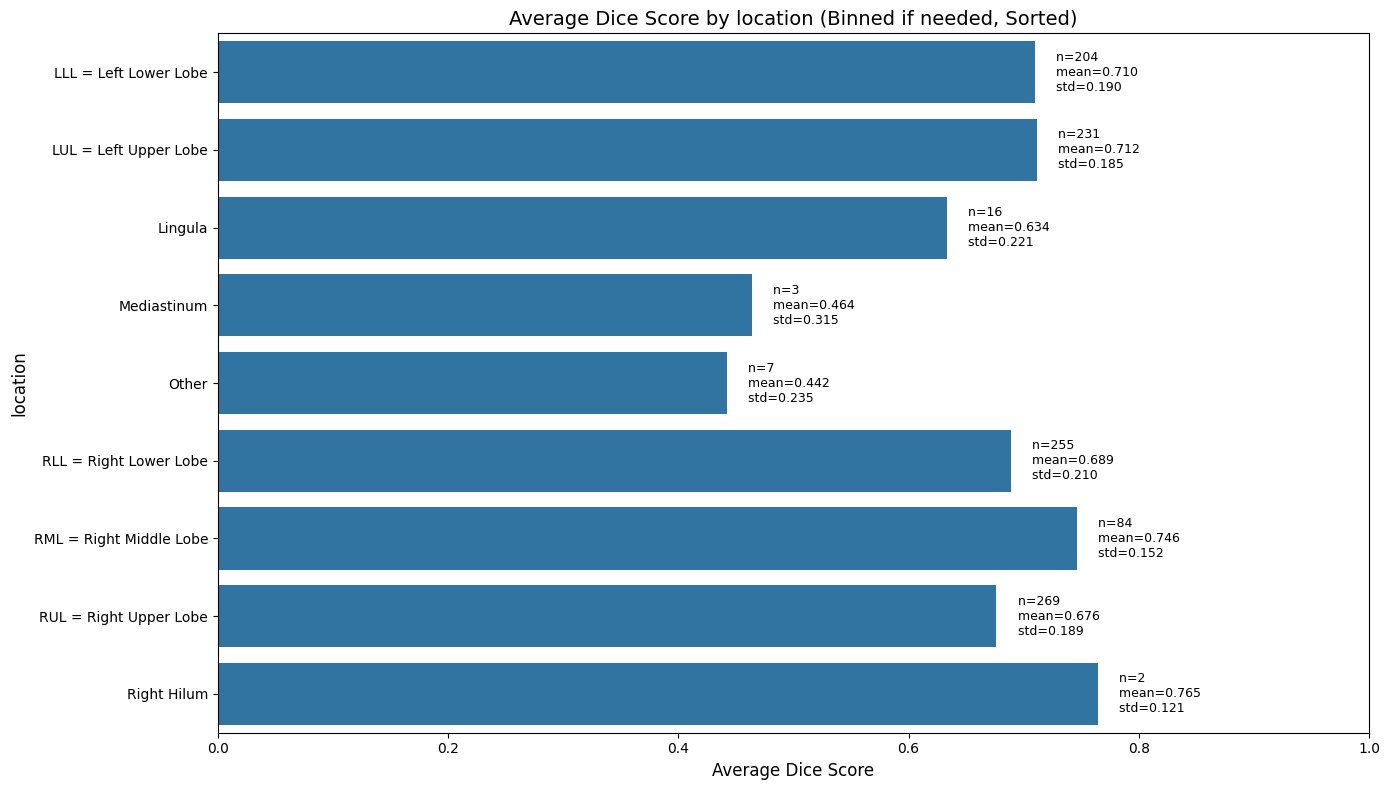



==================== Processing column: margins ====================
Initial subset shape for 'margins': (1075, 2)
Rows after dropping NaN in 'margins': 608 (dropped 467)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'margins': 608 (dropped 0)
Column 'margins' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                         mean  count       std
margins                                       
Lobulated            0.753641     60  0.168679
Other                0.645793     27  0.186161
Poorly marginated    0.618163    122  0.208060
Smooth               0.726053    220  0.203404
Spiculated/Serrated  0.746802    179  0.142513

--- Statistical Significance Testing (alpha=0.05) for margins ---

Performing ANOVA on 5 groups with >1 sample...
ANOVA Results for margins:
F-statistic: 11.4282
P-value: 0.0000
ANOVA indicates a significant difference exists between at least one pair

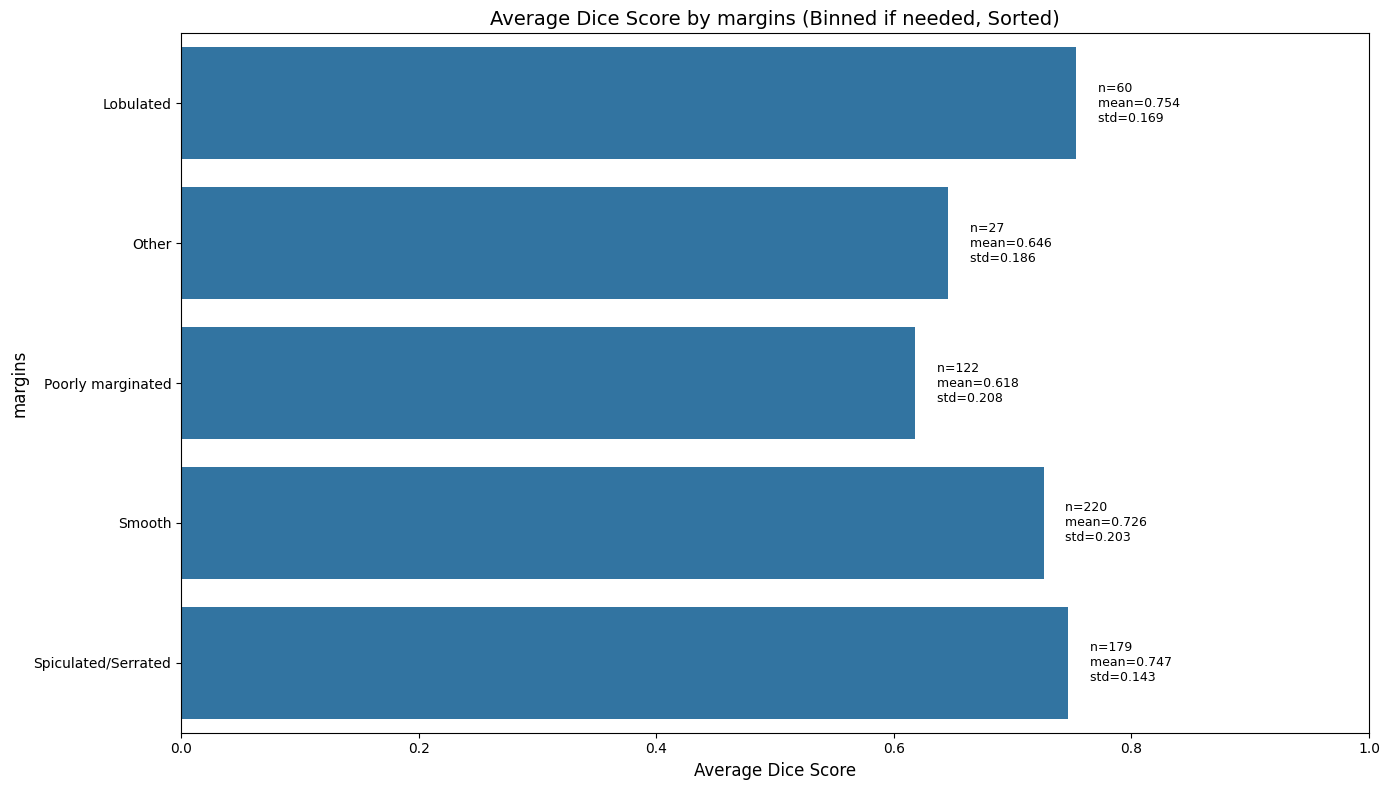



==================== Processing column: consistency ====================
Initial subset shape for 'consistency': (1075, 2)
Rows after dropping NaN in 'consistency': 1075 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'consistency': 980 (dropped 95)
Column 'consistency' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                     mean  count       std
consistency                               
Cavitary         0.692941     19  0.210479
Cyst-associated  0.692432      9  0.181649
PSN              0.617218    155  0.178146
Pure GGN         0.605059     77  0.157449
Solid            0.724976    720  0.190629

--- Statistical Significance Testing (alpha=0.05) for consistency ---

Performing ANOVA on 5 groups with >1 sample...
ANOVA Results for consistency:
F-statistic: 15.7986
P-value: 0.0000
ANOVA indicates a significant difference exists between at least one pair

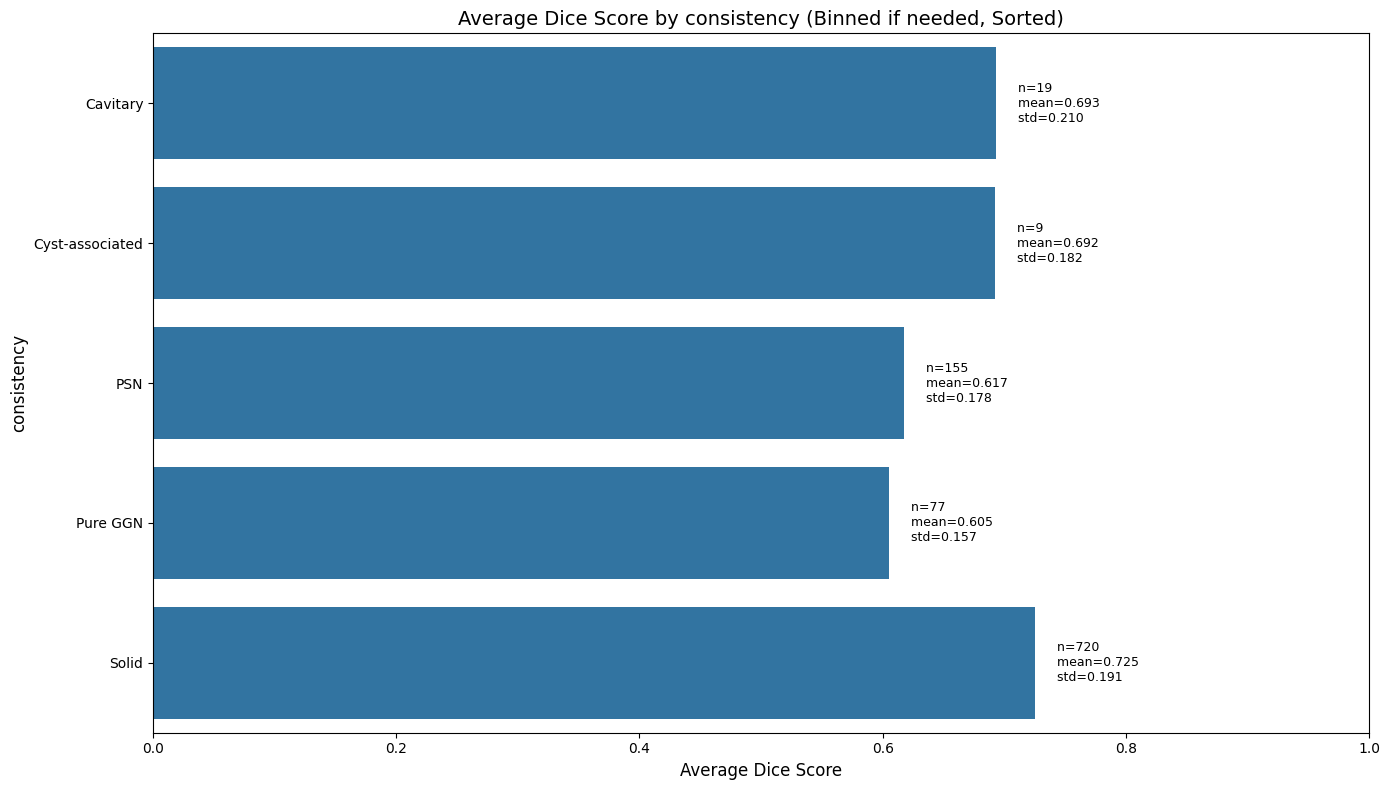



==================== Processing column: dr_diaag_code ====================
Initial subset shape for 'dr_diaag_code': (1075, 2)
Rows after dropping NaN in 'dr_diaag_code': 1075 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'dr_diaag_code': 1075 (dropped 0)
Column 'dr_diaag_code' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                         mean  count       std
dr_diaag_code                                                 
Lung Diagnostic Imaging              0.682459    354  0.193355
Lung Non-Screening LDCT              0.621164     32  0.201586
Lung Pathology - Biopsy              0.660864     15  0.236168
Lung Procedure - Core Needle Biopsy  0.706641    644  0.195678
Lung Screening LDCT                  0.714441     30  0.120225

--- Statistical Significance Testing (alpha=0.05) for dr_diaag_code ---

Performing ANOVA on 5 groups with >1

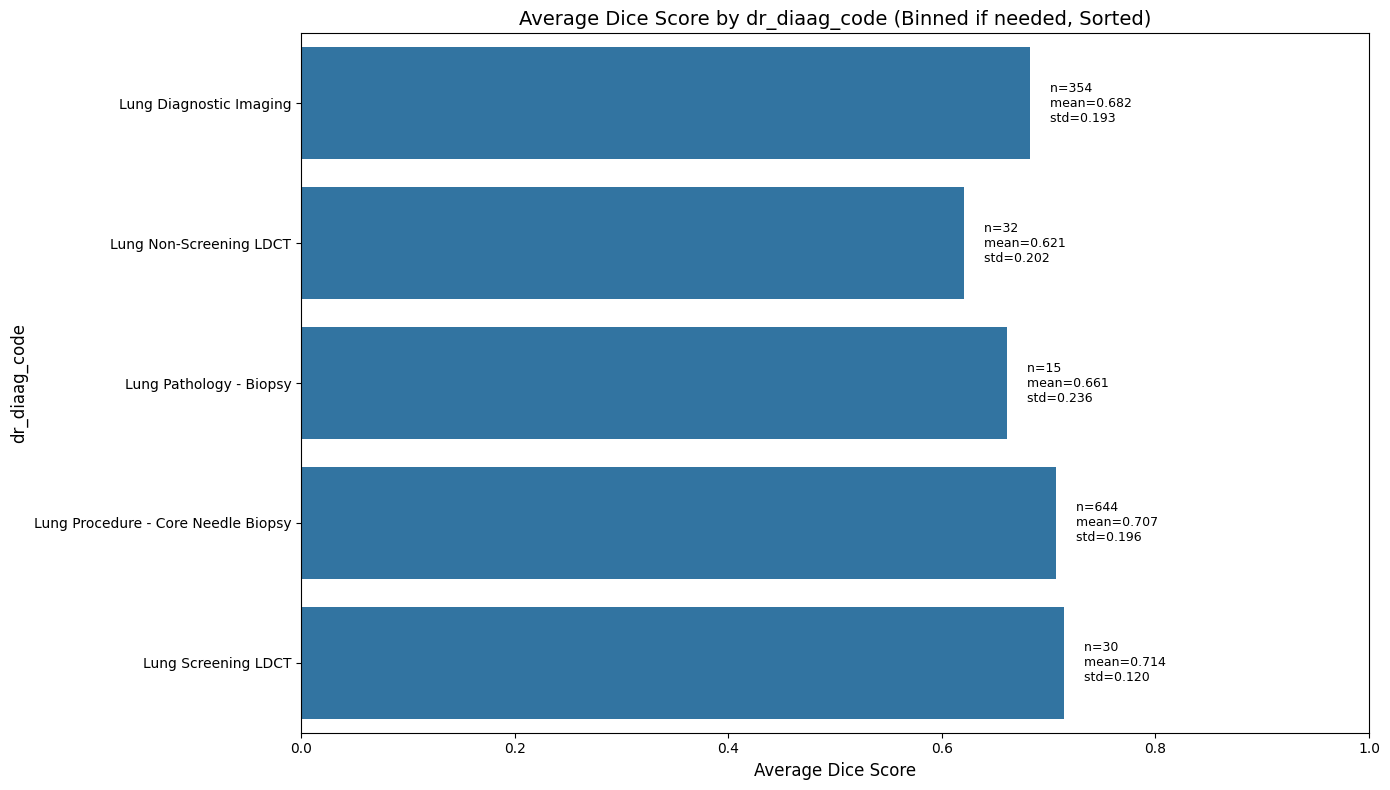



==================== Processing column: evolution ====================
Initial subset shape for 'evolution': (1075, 2)
Rows after dropping NaN in 'evolution': 1002 (dropped 73)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'evolution': 1002 (dropped 0)
Column 'evolution' has 6 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                 mean  count       std
evolution                             
Change       0.692857    249  0.182855
First Study  0.693600    269  0.202948
New          0.691220     78  0.214835
Other        0.710646    297  0.188511
Resolved     0.786041      4  0.176299
Stable       0.670596    105  0.198057

--- Statistical Significance Testing (alpha=0.05) for evolution ---

Performing ANOVA on 6 groups with >1 sample...
ANOVA Results for evolution:
F-statistic: 0.8993
P-value: 0.4808
ANOVA p-value (0.4808) is not less than alpha (0.05).
Overall difference bet

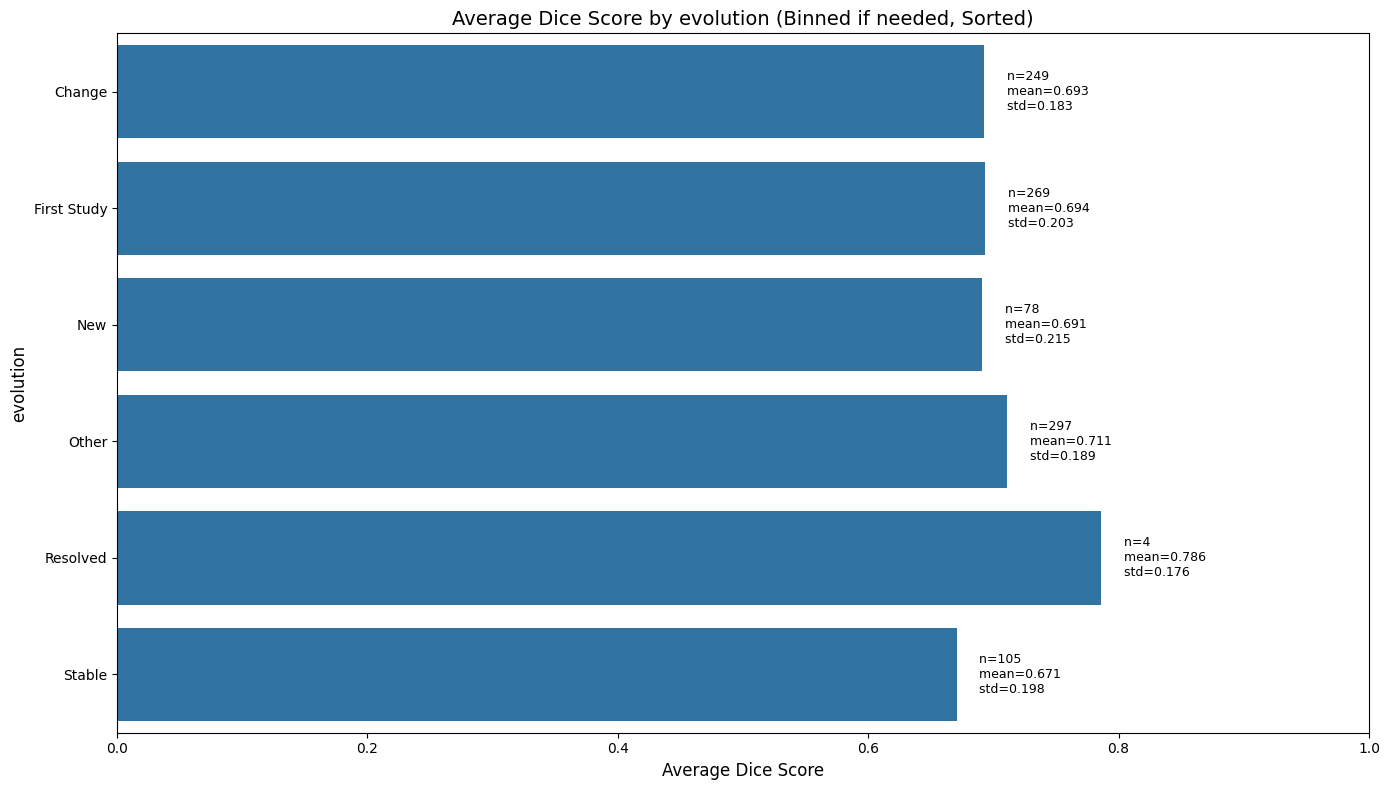



==================== Processing column: suspicion ====================
Initial subset shape for 'suspicion': (1075, 2)
Rows after dropping NaN in 'suspicion': 607 (dropped 468)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'suspicion': 607 (dropped 0)
Column 'suspicion' has 6 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                     mean  count       std
suspicion                                 
High             0.712410     11  0.138582
Intermediate     0.846089      2  0.005634
Low              0.706162    347  0.199197
Moderately High  0.687264     13  0.158030
Moderately Low   0.516854      1       NaN
Not Specified    0.700621    233  0.195477

--- Statistical Significance Testing (alpha=0.05) for suspicion ---

Performing ANOVA on 5 groups with >1 sample...
ANOVA Results for suspicion:
F-statistic: 0.3193
P-value: 0.8651
ANOVA p-value (0.8651) is not less than alpha

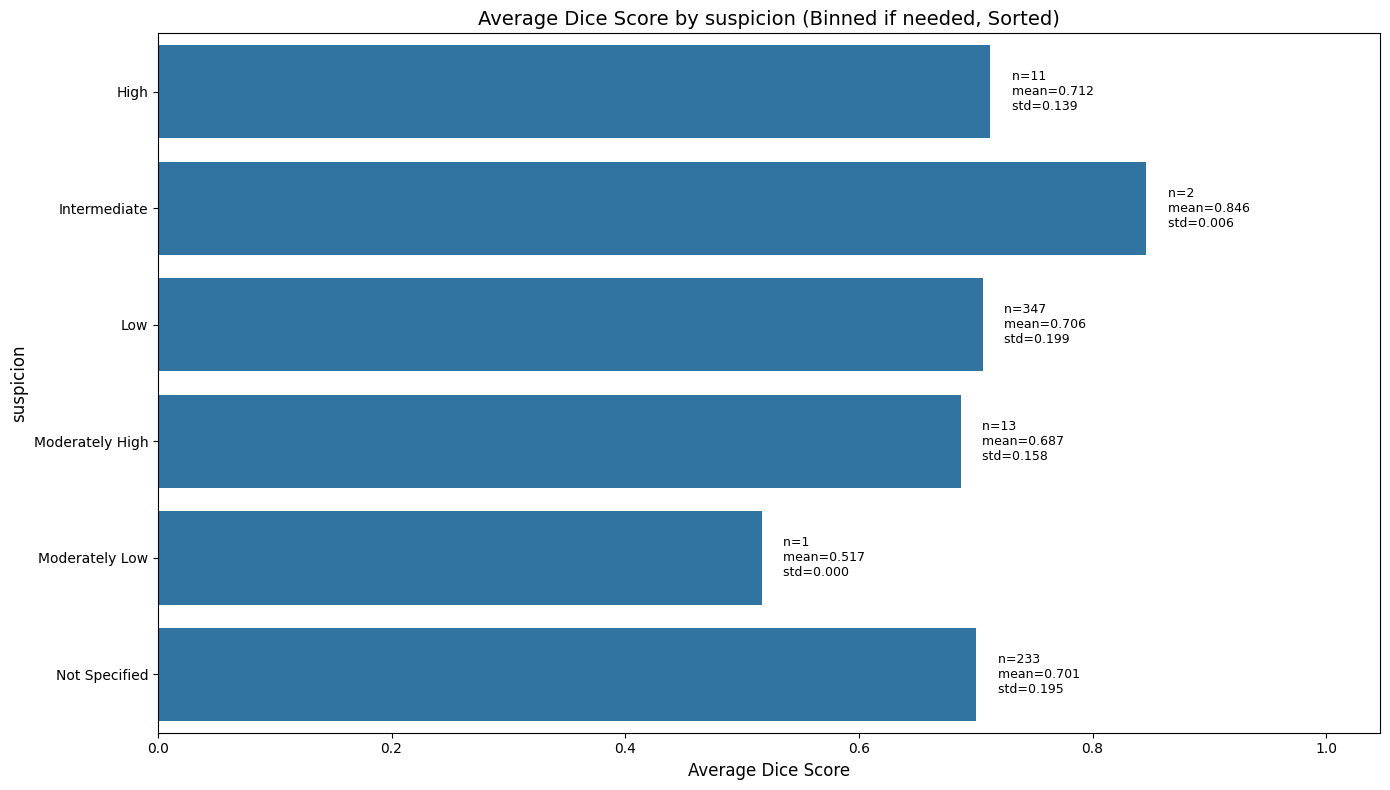



==================== Processing column: nodule_rads ====================
Initial subset shape for 'nodule_rads': (1075, 2)
Rows after dropping NaN in 'nodule_rads': 512 (dropped 563)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_rads': 512 (dropped 0)
Column 'nodule_rads' has 6 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                                     mean  count       std
nodule_rads                                                               
2 = Benign appearance, <1% chance of malignancy  0.681737     18  0.179097
3 = Probably benign, 1-2% chance of malignancy   0.709714     27  0.200697
4A = Suspicious, 5-15% chance of malignancy      0.762016     10  0.117869
4B = Suspicious, >15% chance of malignancy       0.685480     24  0.131501
4X = Suspicious, >15% chance of malignancy       0.742760      6  0.149154
NA = Not Applicable/Unknown         

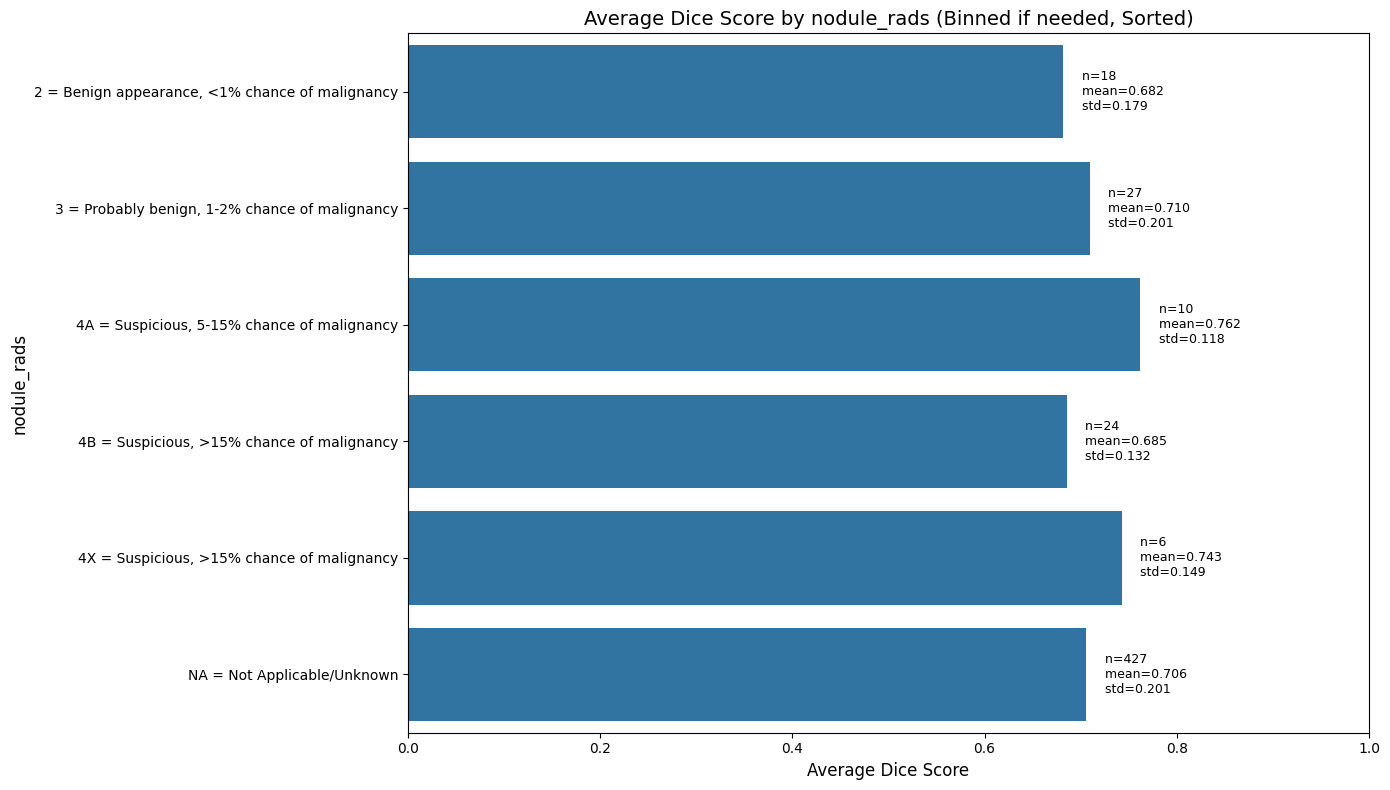



==================== Processing column: nodule_measurement ====================
Initial subset shape for 'nodule_measurement': (1075, 2)
Rows after dropping NaN in 'nodule_measurement': 1073 (dropped 2)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_measurement': 1073 (dropped 0)
Column 'nodule_measurement' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
nodule_measurement                           
Measured Size       0.697470   1031  0.195152
Not available       0.663100     39  0.172075
Small               0.384615      1       NaN
Subcentimeter       0.641392      2  0.341380

--- Statistical Significance Testing (alpha=0.05) for nodule_measurement ---

Performing ANOVA on 3 groups with >1 sample...
ANOVA Results for nodule_measurement:
F-statistic: 0.6656
P-value: 0.5142
ANOVA p-value (0.5142) is not less than alpha (0.0

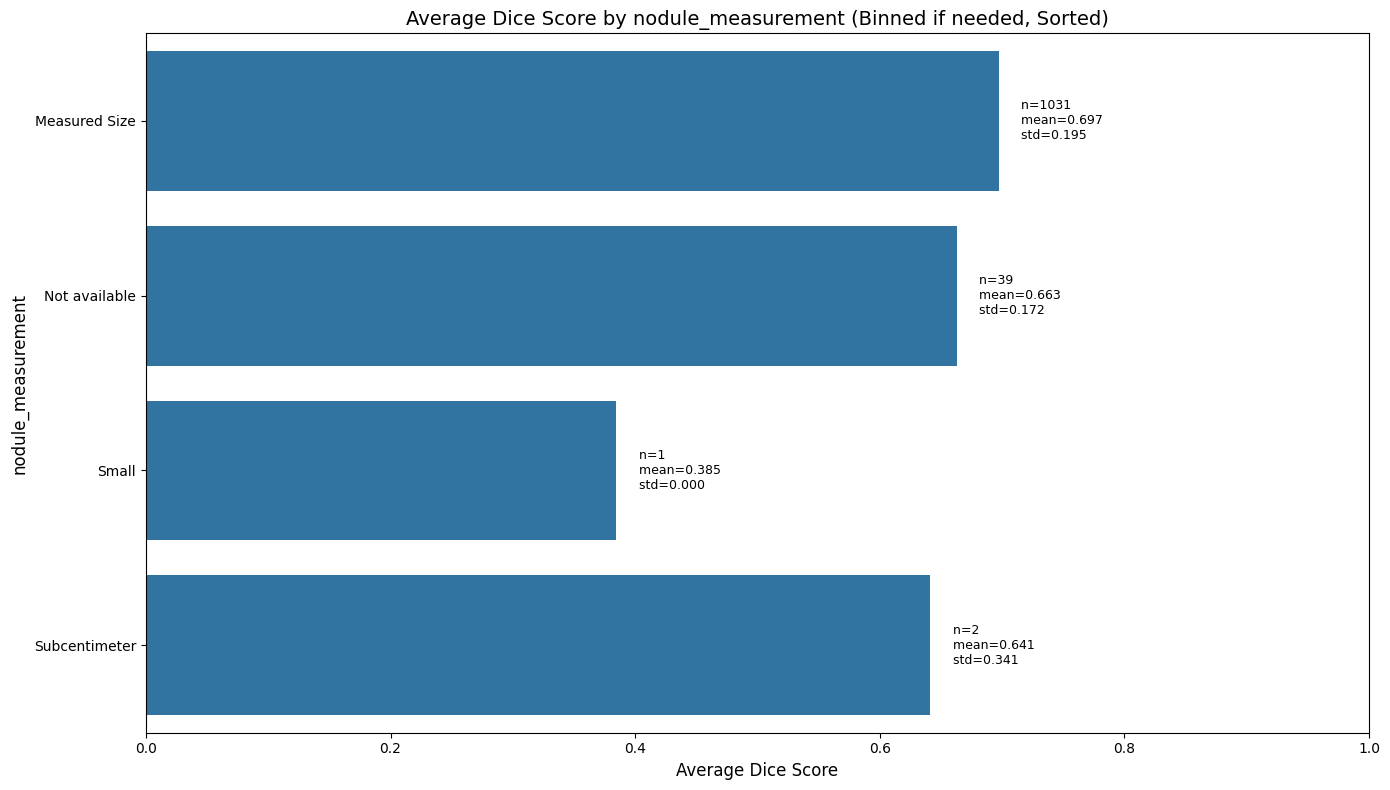



==================== Processing column: diam_long ====================
Initial subset shape for 'diam_long': (1075, 2)
Rows after dropping NaN in 'diam_long': 1050 (dropped 25)
Column 'diam_long' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'diam_long' has 68 unique values. Attempting binning...
Column 'diam_long' appears to be primarily numeric.
Attempting to bin numeric column 'diam_long' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                   mean  count       std
diam_long                               
(-0.001, 8.0]  0.656619    145  0.187804
(8.0, 10.0]    0.713695    130  0.138588
(10.0, 11.0]   0.696456     64  0.187925
(11.0, 13.0]   0.700208    103  0.183279
(13.0, 15.0]   0.711597     86  0.185924
(15.0, 18.0]   0.692371    115  0.178150
(18.0, 22.0]   0.726915    106  0.168840
(22.0, 28.0]   0.731358    101  0

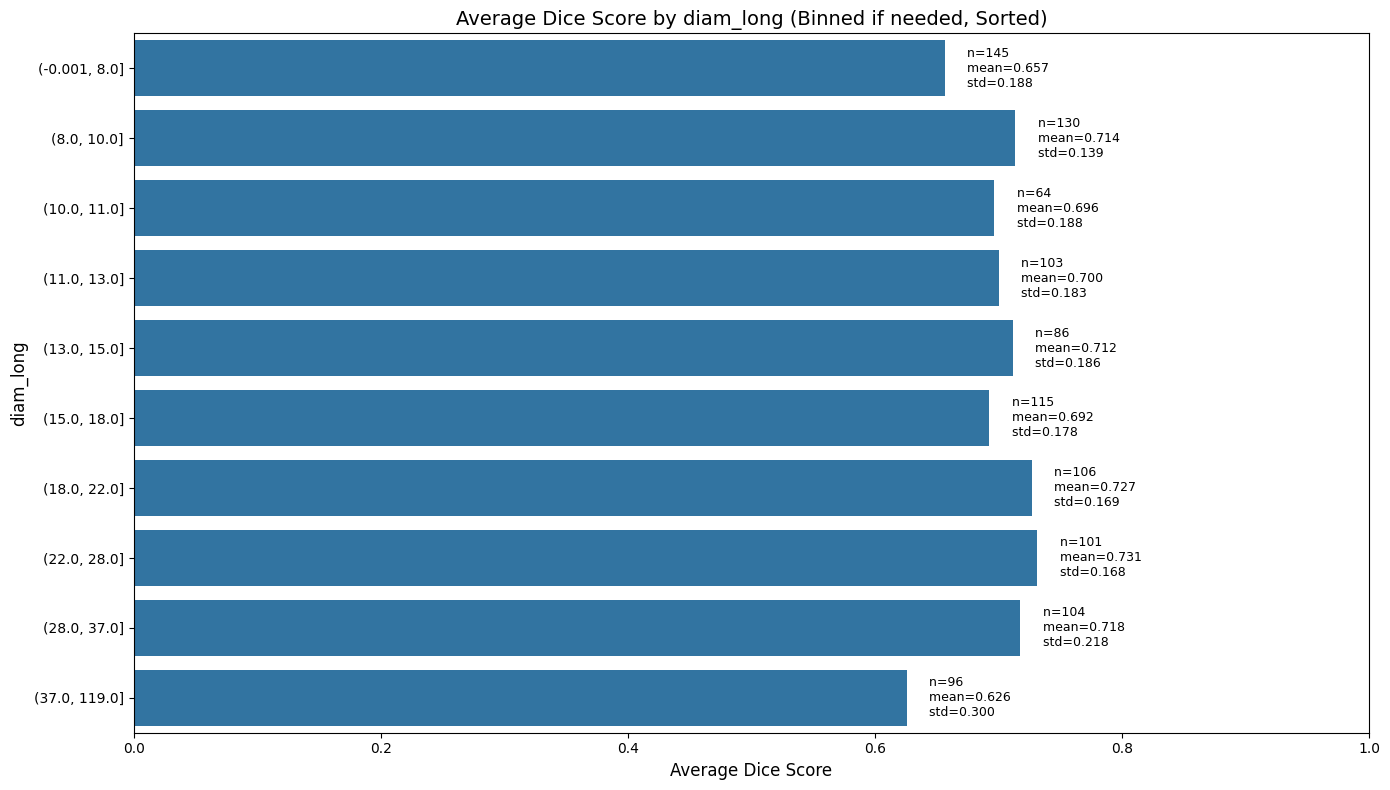



==================== Processing column: nodule_radioactivity ====================
Initial subset shape for 'nodule_radioactivity': (1075, 2)
Rows after dropping NaN in 'nodule_radioactivity': 133 (dropped 942)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_radioactivity': 133 (dropped 0)
Column 'nodule_radioactivity' has 6 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
nodule_radioactivity                           
Faint                 0.769437      7  0.068073
Intense               0.701785     49  0.259379
Mild                  0.668204     36  0.159203
Moderate              0.759625     11  0.071483
Not Specified         0.698906     27  0.176835
Other                 0.748607      3  0.182505

--- Statistical Significance Testing (alpha=0.05) for nodule_radioactivity ---

Performing ANOVA on 6 groups with >1 sample...
ANOV

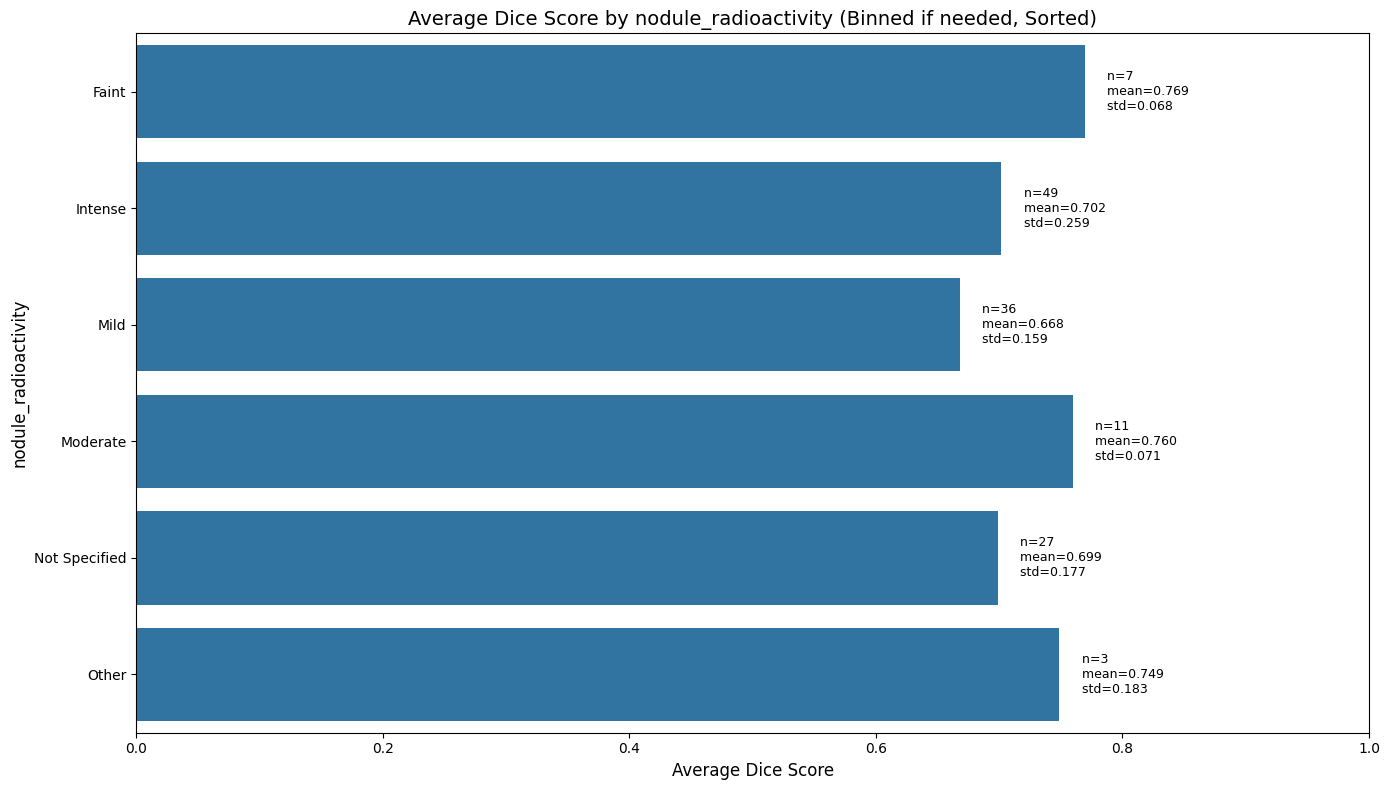



==================== Processing column: known_primary_cancer ====================
Initial subset shape for 'known_primary_cancer': (1075, 2)
Rows after dropping NaN in 'known_primary_cancer': 642 (dropped 433)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'known_primary_cancer': 642 (dropped 0)
Column 'known_primary_cancer' has 368 unique values. Attempting binning...
Treating column 'known_primary_cancer' as categorical. Binning into top 9 + 'Other'.
Number of unique values after categorical binning: 10

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
known_primary_cancer                           
BREAST                0.721535     17  0.148223
Breast                0.638700     11  0.257860
Lung                  0.741395     15  0.227987
Other                 0.692514    528  0.205008
breast                0.769172      9  0.114180
colon                 0.741721      7

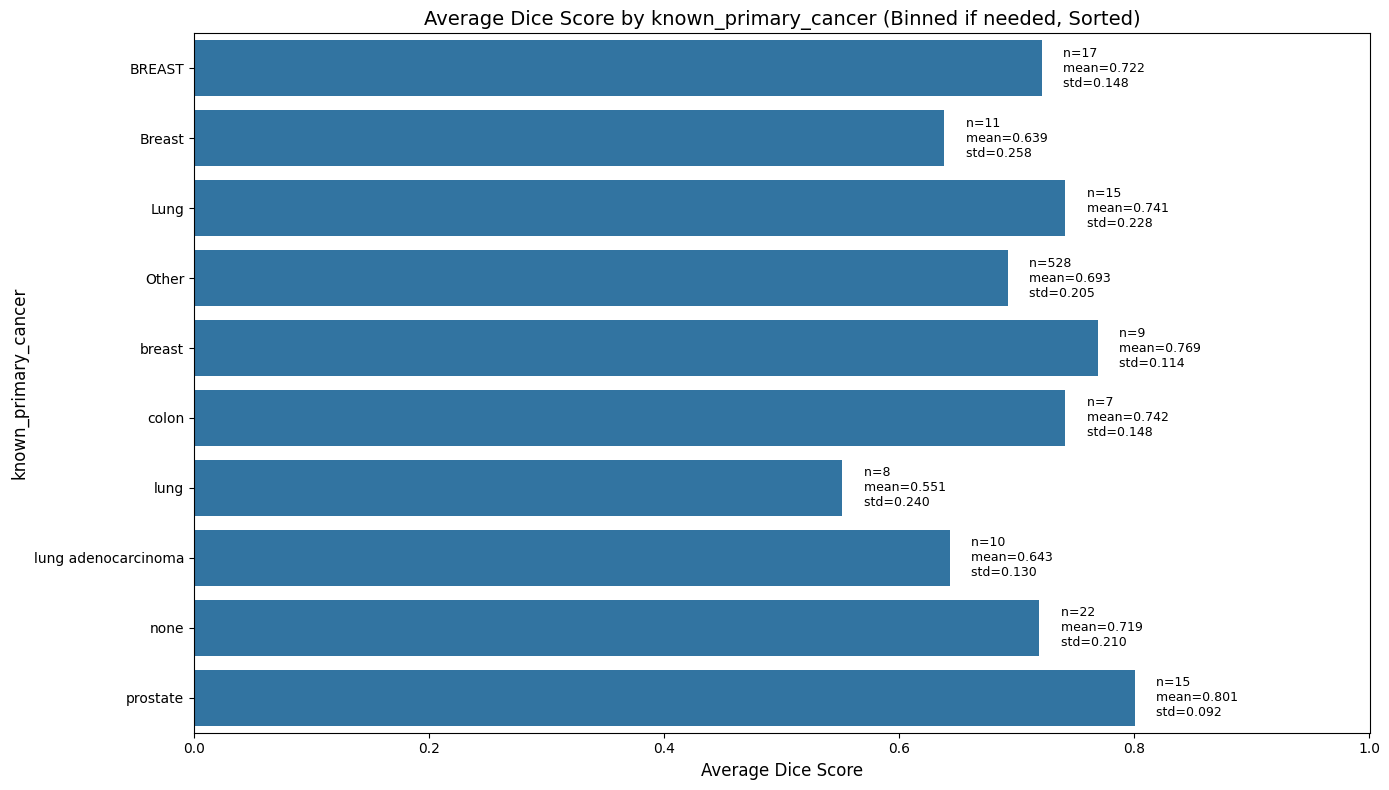



==================== Processing column: num_slices ====================
Initial subset shape for 'num_slices': (1075, 2)
Rows after dropping NaN in 'num_slices': 1075 (dropped 0)
Column 'num_slices' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'num_slices' has 56 unique values. Attempting binning...
Column 'num_slices' appears to be primarily numeric.
Attempting to bin numeric column 'num_slices' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                  mean  count       std
num_slices                             
(1.999, 7.0]  0.722529    147  0.147058
(7.0, 8.8]    0.721195     68  0.137306
(8.8, 10.0]   0.721321    121  0.144984
(10.0, 12.0]  0.695864    111  0.175315
(12.0, 14.0]  0.681705    111  0.210995
(14.0, 16.0]  0.703586     92  0.153477
(16.0, 20.0]  0.700339    111  0.189634
(20.0, 25.0]  0.745468    105  0.193

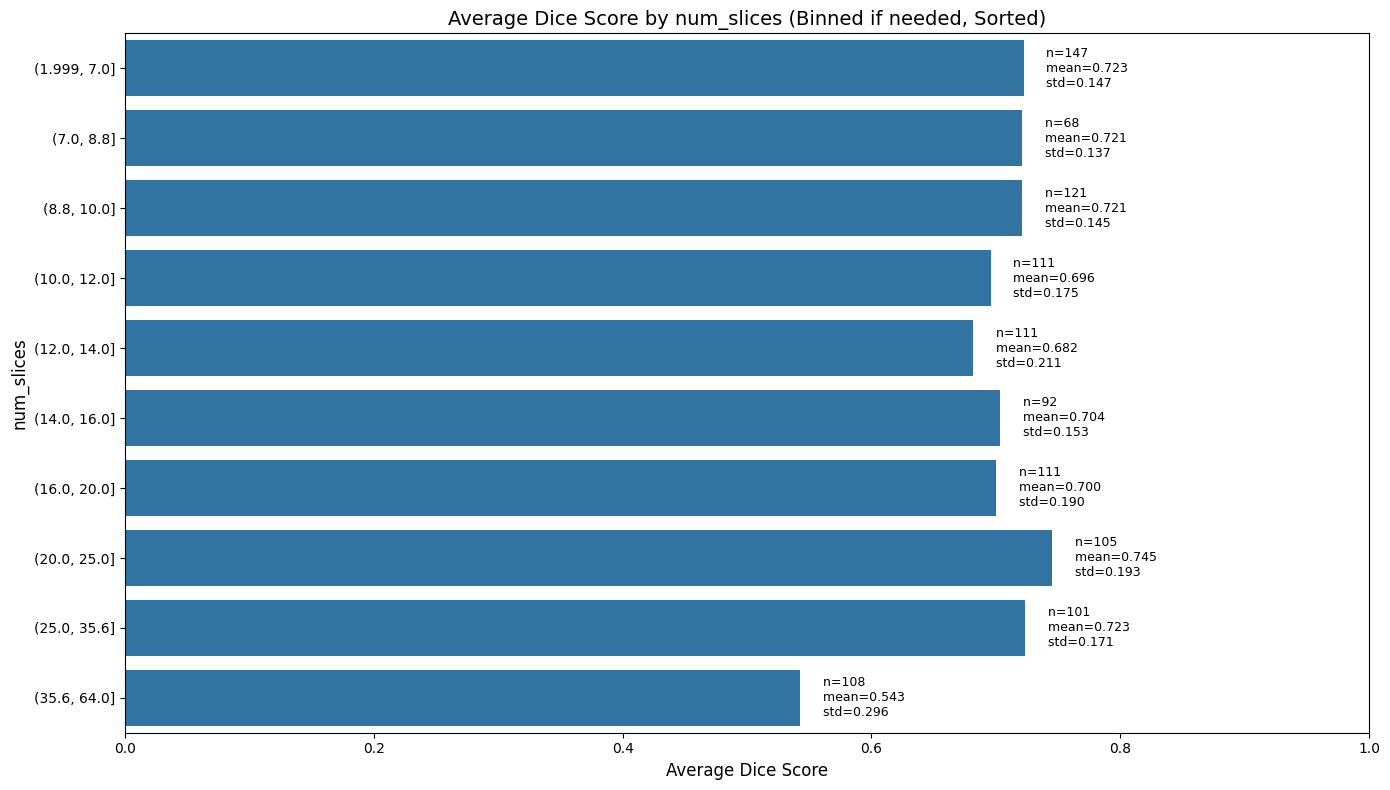



==================== Processing column: pos_voxels ====================
Initial subset shape for 'pos_voxels': (1075, 2)
Rows after dropping NaN in 'pos_voxels': 1075 (dropped 0)
Column 'pos_voxels' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'pos_voxels' has 799 unique values. Attempting binning...
Column 'pos_voxels' appears to be primarily numeric.
Attempting to bin numeric column 'pos_voxels' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
pos_voxels                                   
(4.999, 74.0]       0.665311    109  0.154953
(74.0, 129.8]       0.711661    106  0.141052
(129.8, 204.2]      0.698327    108  0.150746
(204.2, 324.6]      0.689675    107  0.167095
(324.6, 543.0]      0.703454    109  0.185108
(543.0, 805.0]      0.728370    107  0.147510
(805.0, 1347.8]     0.70015

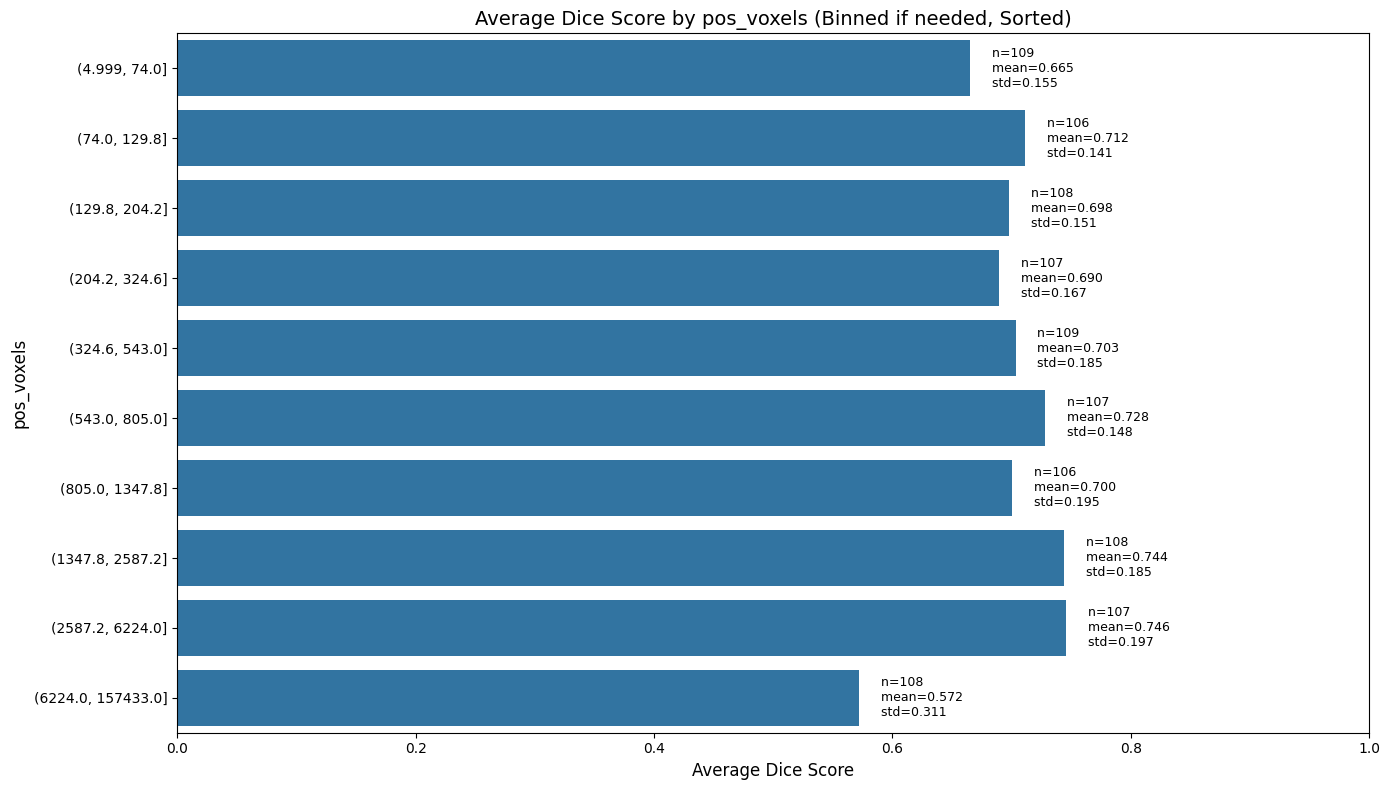



--- Analysis Complete for all columns ---


--- Analysis Complete for all columns ---


--- Analysis Complete for all columns ---


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import os # Import os module to check directory
import traceback # For detailed error reporting

result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-04-24_00:05:13_updated_trimmed_UCLA.csv'
trimmed_df = pd.read_csv(result_path)

def get_df_subset(df, column_name):
    # Ensure the target column exists
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")
    # Select 'dice_score' and the specified column
    if 'dice_score' not in df.columns:
        raise ValueError("'dice_score' column not found in DataFrame.")
    return df[['dice_score', column_name]].copy() # Use copy to avoid SettingWithCopyWarning

# Identify columns to process (all except 'dice_score')
columns_to_analyze = [col for col in trimmed_df.columns if col != 'dice_score']

# Base directory for saving figures
figure_base_dir = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/figures'

interested_keys_ucla = ['location', 'margins', 'consistency', 'dr_diaag_code', 'evolution', 'suspicion', 'nodule_rads',
                   'nodule_measurement', 'diam_long', 'nodule_radioactivity', 'known_primary_cancer', 'num_slices', 'pos_voxels']

# Ensure the base figure directory exists
if not os.path.exists(figure_base_dir):
    try:
        os.makedirs(figure_base_dir)
        print(f"Created base directory for figures: {figure_base_dir}")
    except Exception as e:
        print(f"Error creating base directory {figure_base_dir}: {e}. Figures may not be saved.")
        # Depending on requirements, you might want to exit here

# Loop through each column to analyze
for column_name in interested_keys_ucla:
    print(f"\n\n{'='*20} Processing column: {column_name} {'='*20}")

    try:
        # --- Get Subset ---
        df_subset = get_df_subset(trimmed_df, column_name)
        print(f"Initial subset shape for '{column_name}': {df_subset.shape}")

        # --- Preprocessing ---
        # Drop rows with missing values in the grouping column BEFORE binning/conversion
        initial_rows = len(df_subset)
        df_subset.dropna(subset=[column_name], inplace=True)
        print(f"Rows after dropping NaN in '{column_name}': {len(df_subset)} (dropped {initial_rows - len(df_subset)})")
        if len(df_subset) == 0:
             print(f"Skipping '{column_name}' as it became empty after dropping NaNs.")
             plt.close('all') # Close any potentially open plots
             continue # Skip to the next column

        # Drop specific unwanted string values
        drop_values = ['Unknown', 'Not specified'] # Add any other values to drop
        # Ensure the column is treated as string for isin comparison if it's object type
        if df_subset[column_name].dtype == 'object':
            initial_rows = len(df_subset)
            df_subset = df_subset[~df_subset[column_name].astype(str).isin(drop_values)]
            print(f"Rows after dropping specific values {drop_values} in '{column_name}': {len(df_subset)} (dropped {initial_rows - len(df_subset)})")
        elif pd.api.types.is_numeric_dtype(df_subset[column_name]):
             print(f"Column '{column_name}' is numeric, skipping drop of string values {drop_values}.")
        else:
             print(f"Column '{column_name}' has dtype {df_subset[column_name].dtype}, skipping drop of string values {drop_values}.")


        if len(df_subset) == 0:
             print(f"Skipping '{column_name}' as it became empty after dropping specific values.")
             plt.close('all') # Close any potentially open plots
             continue # Skip to the next column

        # --- Binning if more than 10 unique values ---
        n_unique = df_subset[column_name].nunique()
        is_numeric_binned = False # Flag to track if numeric binning occurred

        if n_unique > 10:
            print(f"Column '{column_name}' has {n_unique} unique values. Attempting binning...")
            # Check if the column is potentially numeric (might contain strings that can be converted)
            temp_numeric_col = pd.to_numeric(df_subset[column_name], errors='coerce')

            # Check if a significant portion could be converted to numeric
            if not temp_numeric_col.isnull().all() and temp_numeric_col.notnull().sum() > len(temp_numeric_col) * 0.5: # Heuristic: at least 50% numeric
                print(f"Column '{column_name}' appears to be primarily numeric.")
                # Drop rows where conversion failed before binning
                df_subset = df_subset[temp_numeric_col.notnull()].copy() # Work on a copy after filtering
                df_subset[column_name] = temp_numeric_col[temp_numeric_col.notnull()] # Assign the converted numeric values

                if df_subset[column_name].nunique() > 1: # Need variability to bin
                    print(f"Attempting to bin numeric column '{column_name}' into up to 10 quantiles.")
                    try:
                        # Use qcut for quantile-based bins, drop duplicate edges
                        df_subset[column_name] = pd.qcut(df_subset[column_name], q=10, duplicates='drop', retbins=False)
                        # df_subset[column_name] now contains Interval objects
                        is_numeric_binned = True
                        print(f"Successfully binned numeric column into {df_subset[column_name].nunique()} bins.")
                    except Exception as e:
                        print(f"Warning: Could not bin numeric column '{column_name}' using pd.qcut. Error: {e}. Proceeding with original numeric values (potentially >10).")
                        # Keep original numeric values if binning fails
                else:
                    print(f"Not enough unique numeric values in '{column_name}' after cleaning to perform quantile binning.")
                    # Keep original numeric values

            # Handle as categorical/string if not numeric or if numeric binning failed/was skipped
            if not is_numeric_binned:
                print(f"Treating column '{column_name}' as categorical. Binning into top 9 + 'Other'.")
                # Ensure the column is string type for value_counts and replacement
                df_subset[column_name] = df_subset[column_name].astype(str)
                value_counts = df_subset[column_name].value_counts()
                # Identify the top 9 most frequent categories
                top_categories = value_counts.nlargest(9).index
                # Replace values not in the top 9 with 'Other'
                df_subset[column_name] = df_subset[column_name].apply(lambda x: x if x in top_categories else 'Other')
                print(f"Number of unique values after categorical binning: {df_subset[column_name].nunique()}")
        else:
             print(f"Column '{column_name}' has {n_unique} unique values. No binning applied.")
             # Ensure column is string if it's object type for consistent grouping later
             if df_subset[column_name].dtype == 'object':
                 df_subset[column_name] = df_subset[column_name].astype(str)

        # --- End of Binning ---


        # Check if df_subset is empty after filtering and potential binning
        if df_subset.empty:
            print(f"DataFrame is empty after filtering/binning for column '{column_name}'. Cannot perform analysis.")
            plt.close('all')
            continue # Skip to the next column
        else:
            # --- Grouping and Stats ---
            print("\nCalculating group statistics...")
            # Group by the column (Intervals if numeric binned, strings/numbers otherwise)
            # Need to handle observed=False explicitly for future pandas versions if using CategoricalDtype
            # If column is Interval, observed=True is default and desired. If string/other, observed=False might be needed.
            observed_flag = True if isinstance(df_subset[column_name].dtype, pd.IntervalDtype) else False

            try:
                grouped_stats = df_subset.groupby(column_name, observed=observed_flag)['dice_score'].agg(['mean', 'count', 'std'])
            except TypeError as te:
                 # Handle cases like mixed types if not caught earlier, fallback to string conversion
                 print(f"TypeError during grouping '{column_name}', attempting conversion to string. Error: {te}")
                 df_subset[column_name] = df_subset[column_name].astype(str)
                 grouped_stats = df_subset.groupby(column_name, observed=False)['dice_score'].agg(['mean', 'count', 'std'])


            # Sort the grouped stats. IntervalIndex sorts numerically. String index sorts alphabetically.
            grouped_stats = grouped_stats.sort_index()

            # --- Prepare for Stats/Plotting ---
            # Get the sorted index (Intervals or strings/numbers)
            sorted_index = grouped_stats.index
            # Create the plot order using string representations of the sorted index
            plot_order = sorted_index.astype(str).tolist()
            # Convert the index of grouped_stats to string for consistent lookup later (e.g., in annotations)
            grouped_stats.index = grouped_stats.index.astype(str)

            # Convert the column in the main df to string *after* grouping/sorting
            # This ensures consistency for filtering and plotting using string labels
            df_subset[column_name] = df_subset[column_name].astype(str)


            counts = grouped_stats['count']
            means = grouped_stats['mean']
            stds = grouped_stats['std']
            print("\n--- Group Statistics (after potential binning, sorted) ---")
            print(grouped_stats)

            # --- Statistical Significance Testing ---
            alpha = 0.05
            print(f"\n--- Statistical Significance Testing (alpha={alpha}) for {column_name} ---")

            # Prepare data for comparison: list of dice scores for each group
            # Use the string group names from plot_order (derived from sorted index)
            group_names = plot_order
            # Filter df_subset using the string version of the column
            group_data = [df_subset['dice_score'][df_subset[column_name] == group].values for group in group_names]

            # Check if all groups have sufficient data for tests (e.g., >1 sample for std dev)
            valid_group_indices = [i for i, g in enumerate(group_data) if len(g) > 1]
            valid_groups_for_anova = [group_data[i] for i in valid_group_indices]
            # Use the corresponding string names for valid groups
            valid_group_names = [group_names[i] for i in valid_group_indices]


            significant_pairs_details = []

            if len(valid_groups_for_anova) >= 3: # ANOVA makes sense for 3+ groups
                # 1. ANOVA (to check for any significant difference overall)
                print(f"\nPerforming ANOVA on {len(valid_groups_for_anova)} groups with >1 sample...")
                f_stat, p_value_anova = stats.f_oneway(*valid_groups_for_anova)
                print(f"ANOVA Results for {column_name}:")
                print(f"F-statistic: {f_stat:.4f}")
                print(f"P-value: {p_value_anova:.4f}")

                if p_value_anova < alpha:
                    print("ANOVA indicates a significant difference exists between at least one pair of groups.")
                    # 2. Post-hoc Test: Tukey's HSD for pairwise comparisons
                    # Filter df_subset to include only the groups used in ANOVA/Tukey
                    # Use the string version of column_name for filtering and grouping
                    df_subset_filtered_for_tukey = df_subset[df_subset[column_name].isin(valid_group_names)]

                    print(f"\nPerforming Tukey's HSD post-hoc test...")
                    # Ensure data passed to tukeyhsd corresponds to the filtered groups
                    # Pass the string version of the column for groups
                    tukey_result = pairwise_tukeyhsd(endog=df_subset_filtered_for_tukey['dice_score'],
                                                     groups=df_subset_filtered_for_tukey[column_name],
                                                     alpha=alpha)

                    print("\nTukey's HSD Results Summary:")
                    print(tukey_result)

                    # Extract results into a DataFrame for easier filtering
                    results_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

                    # Filter for significant pairs
                    significant_pairs_tukey = results_df[results_df['reject'] == True]

                    print(f"\n--- {column_name} Pairs with Significant Difference (p-adj < {alpha}) based on Tukey's HSD ---")
                    if not significant_pairs_tukey.empty:
                            print(significant_pairs_tukey[['group1', 'group2', 'p-adj']])
                            # Store details for potential later use or more detailed reporting
                            for _, row in significant_pairs_tukey.iterrows():
                                significant_pairs_details.append({
                                    'pair': (row['group1'], row['group2']),
                                    'p_value': row['p-adj'],
                                    'test': 'Tukey HSD'
                                })
                    else:
                        print("No significant differences found between pairs after Tukey's HSD correction.")

                else:
                    print(f"ANOVA p-value ({p_value_anova:.4f}) is not less than alpha ({alpha}).")
                    print("Overall difference between groups is not statistically significant, skipping post-hoc tests.")

            elif len(valid_groups_for_anova) == 2:
                    # If exactly two groups with >1 sample, perform an independent t-test
                    print("\nExactly two groups with sufficient data found. Performing Welch's t-test...")
                    group1_data = valid_groups_for_anova[0]
                    group2_data = valid_groups_for_anova[1]
                    group1_name = valid_group_names[0] # String name
                    group2_name = valid_group_names[1] # String name

                    # Welch's t-test is performed as both groups have > 1 sample (checked above)
                    t_stat, p_value_ttest = stats.ttest_ind(group1_data, group2_data, equal_var=False) # Welch's t-test
                    print(f"\nWelch's t-test Results ({group1_name} vs {group2_name}):")
                    print(f"T-statistic: {t_stat:.4f}")
                    print(f"P-value: {p_value_ttest:.4f}")

                    if p_value_ttest < alpha:
                        print(f"Significant difference found between '{group1_name}' and '{group2_name}' (p < {alpha}).")
                        significant_pairs_details.append({
                            'pair': (group1_name, group2_name),
                            'p_value': p_value_ttest,
                            'test': "Welch's t-test"
                        })
                    else:
                        print(f"No significant difference found between '{group1_name}' and '{group2_name}' (p >= {alpha}).")

            else: # Handles cases where < 2 groups had > 1 sample
                    print("\nNot enough groups with sufficient data (>1 sample per group) for ANOVA or t-test.")


            # --- Categorical Plot ---
            print("\nGenerating plot...")
            fig, ax = plt.subplots(figsize=(14, 8)) # Increased height slightly
            # Ensure the order of bars matches the sorted index (now represented as strings in plot_order)
            # plot_order was created from the sorted index earlier

            # Check if df_subset is not empty before plotting
            if not df_subset.empty:
                # Use the string version of column_name for the y-axis and data filtering
                # Use plot_order (list of strings) to enforce the desired sort order
                # Set color to blue and remove error bars
                sns.barplot(x='dice_score', y=column_name, data=df_subset, ax=ax, order=plot_order, errorbar=None)
                ax.set_title(f'Average Dice Score by {column_name} (Binned if needed, Sorted)', fontsize=14)
                ax.set_xlabel('Average Dice Score', fontsize=12)
                ax.set_xlim(0, 1.0) # Set x-axis limit from 0 to 1 for Dice score
                ax.set_ylabel(column_name, fontsize=12) # Label remains the original column name

                # Annotate bars
                max_bar_width = 0 # Keep track of max bar width for text placement
                for i, bar in enumerate(ax.patches):
                    bar_width = bar.get_width()
                    if bar_width > max_bar_width:
                        max_bar_width = bar_width
                    bar_y_center = bar.get_y() + bar.get_height() / 2.

                    # Get corresponding count, mean, and std using the plot_order index
                    # Ensure index lookup is safe and uses the correct group name from plot_order
                    # grouped_stats index is now string type, matching plot_order
                    group_name = plot_order[i] # This is the string representation of the group
                    if group_name in grouped_stats.index:
                        stats_row = grouped_stats.loc[group_name]
                        count_val = int(stats_row['count']) # Ensure count is integer
                        mean_val = stats_row['mean'] # This should be equal to bar_width
                        std_val = stats_row['std'] if not pd.isna(stats_row['std']) else 0 # Handle potential NaN std if count=1

                        # Add text annotation slightly to the right of the bar
                        ax.text(bar_width + 0.015,  # x-position (slightly past the bar end)
                                bar_y_center,      # y-position (vertically centered)
                                f' n={count_val}\n mean={mean_val:.3f}\n std={std_val:.3f}', # Text content
                                va='center',       # Vertical alignment
                                ha='left',         # Horizontal alignment
                                fontsize=9)        # Adjust fontsize
                    else:
                         print(f"Warning: Could not find stats for group '{group_name}' during annotation.")


                # Adjust x-limit slightly if needed to make space for text, but keep max at 1.0
                # Add a bit more space for annotations
                current_xlim = ax.get_xlim()
                # Estimate required space based on max bar width and typical annotation length
                required_xlim_for_text = max_bar_width + 0.20 # Increased buffer
                new_xlim_max = max(current_xlim[1], min(required_xlim_for_text, 1.1)) # Allow slightly > 1 if needed
                ax.set_xlim(current_xlim[0], new_xlim_max)


                plt.tight_layout() # Adjust layout to prevent labels overlapping

                # Sanitize column name for filename
                safe_column_name = "".join([c if c.isalnum() else "_" for c in column_name])
                fig_save_path = os.path.join(figure_base_dir, f'{safe_column_name}_dice_distribution.png')

                # Try saving the figure
                try:
                    plt.savefig(fig_save_path, bbox_inches='tight') # Use bbox_inches='tight' to include annotations
                    print(f"Figure saved to {fig_save_path}")
                except Exception as e:
                    print(f"Error saving figure to {fig_save_path}: {e}")

                plt.show() # Show the plot after saving

            else:
                # This case should ideally be caught earlier, but as a safeguard:
                print("Skipping plot generation as the DataFrame subset is empty.")
                plt.close(fig) # Close the empty figure

    except Exception as e:
        print(f"\n--- ERROR processing column '{column_name}' ---")
        print(f"Error type: {type(e).__name__}")
        print(f"Error message: {e}")
        print("Traceback:")
        traceback.print_exc() # Print detailed traceback
        print(f"--- Skipping to next column ---")
        # Close any potentially open plot window from the failed iteration
        plt.close('all')
        continue # Move to the next column

print("\n\n--- Analysis Complete for all columns ---")
print("\n\n--- Analysis Complete for all columns ---")
print("\n\n--- Analysis Complete for all columns ---")

In [10]:
import os
import glob
import pandas as pd

result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated.csv'
result_df = pd.read_csv(result_path)

nlst_result_df = result_df[result_df['pid'].str.startswith('NLST')]
nlst_result_df = nlst_result_df.sort_values(by='pid', key=lambda x: x.str.strip('NLST').astype(int)).reset_index(drop=True)

# change the column name of the ucla_result_df to New Filename
nlst_result_df.rename(columns={'pid': 'New Filename'}, inplace=True)

print(len(nlst_result_df))
display(nlst_result_df.head())

_filenames = glob.glob('/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/splits/val/images_2D_2axis/*.npy')
filenames = [os.path.basename(filename) for filename in _filenames]
nlst_patient_names = [filename.split('_')[0] for filename in filenames if filename.startswith('NLST')]
#print(len(nlst_patient_names))
#print(nlst_patient_names[:10])
#print(len(list(set(nlst_patient_names))))

NLST_csv = pd.read_csv('/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/NLST_merged_lesion_info_updated.csv')
NLST_csv = NLST_csv[~NLST_csv['New Filename'].isna()]
NLST_csv_val = NLST_csv[NLST_csv['New Filename'].isin(nlst_patient_names)]
#display(NLST_csv_val.head())

keys = NLST_csv_val.keys()

all_keys = NLST_csv_val['New Filename'].unique().tolist()
for key in all_keys:
    if key not in NLST_csv_val['New Filename'].values:
        print(key)

nlst_combined_df = NLST_csv_val.copy().merge(nlst_result_df, on='New Filename', how='left')
display(nlst_combined_df.head())

nlst_combined_df.to_csv('/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/NLST_merged_lesion_info_updated_with_results_val.csv', index=False)
nlst_combined_df.to_csv('/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_NLST.csv', index=False)

for key in keys:
    value_counts = nlst_combined_df[key].value_counts(dropna=False)
    if len(value_counts) < 30:
        print(value_counts)




245


New Filename  num_slices  pos_voxels  dice_score dataset
0      NLST981           5          39    0.633333    NLST
1      NLST982           5         103    0.884615    NLST
2      NLST983           6         101    0.800000    NLST
3      NLST984           3          21    0.857143    NLST
4      NLST985           6          54    0.748201    NLST

cohort  training     pid      year  nodule_id  \
0   NLST         1  208551  1/2/2001          0   
1   NLST         1  208553  1/2/2001          0   
2   NLST         1  208553  1/2/2001          1   
3   NLST         1  208587  1/2/2001          0   
4   NLST         1  208589  1/2/2000          0   

                                          image_path  \
0  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
1  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
2  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
3  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   
4  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   

                                         nodule_path      coordX      coordY  \
0  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...  104.473475   42.710944   
1  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...  -76.735604  157.676027   
2  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...  -96.319890  127.927751   
3  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...  105.560779   97.524081   
4  /radraid/whsu/Ticket8859/AnnotationPlusImage/1...   57.216101  -77.600898   

        coordZ  ...  prior_year  nodule_pre-existence  nodule_size  \
0  -130.269754  ...    1/2/1999                   Yes       Stable   
1  1573.470507  ...    1/2/1999                   Yes       Stable   
2  1552.306294  ...    1/2/1999                   Yes       Stable   
3  -236.732759  ...    1/2/1999                   Yes       Stable   
4   160.892098  ...    1/2/1999                   Yes       Stable   

          nodule_consistency.1  \
0                       Stable   
1                       Stable   
2                       Stable   
3                       Stable   
4  Increased attenuation focal   

                                     base_image_path New Filename num_slices  \
0  Ticket8859/AnnotationPlusImage/10076_208551/20...      NLST981          5   
1  Ticket8859/AnnotationPlusImage/10076_208553/20...      NLST982          5   
2  Ticket8859/AnnotationPlusImage/10076_208553/20...      NLST983          6   
3  Ticket8859/AnnotationPlusImage/10076_208587/20...      NLST984          3   
4  Ticket8859/AnnotationPlusImage/10076_208589/20...      NLST985          6   

  pos_voxels dice_score  dataset  
0         39   0.633333     NLST  
1        103   0.884615     NLST  
2        101   0.800000     NLST  
3         21   0.857143     NLST  
4         54   0.748201     NLST  

[5 rows x 58 columns]

cohort
NLST    250
Name: count, dtype: int64
training
1    250
Name: count, dtype: int64
year
1/2/2001    197
1/2/1999     36
1/2/2000     17
Name: count, dtype: int64
nodule_id
0    183
1     52
2     15
Name: count, dtype: int64
diagnosis_patient
0    201
1     49
Name: count, dtype: int64
diagnosis_nodule
0.0    209
1.0     41
Name: count, dtype: int64
level_of_suspicion_of_lung_cancer
Very Low           76
Moderately Low     56
Intermediate       47
Moderately High    39
High               27
NaN                 5
Name: count, dtype: int64
slice_thickness
2.5 mm    102
2 mm       84
1 mm       55
>3 mm       6
1.5 mm      3
Name: count, dtype: int64
kernel
Medium    246
Sharp       3
NaN         1
Name: count, dtype: int64
scanner_manufacturer
GE         149
Siemens     73
Philips     18
Toshiba     10
Name: count, dtype: int64
scanner_model
LSULT            54
LS16             33
SEN16            29
SEN64            23
LSQX             21
LSPR16           21
MX8000           18
AQ

Generating average 'dice_score' plot for feature: num_slices (dtype: int64)
  Binning numeric feature 'num_slices' (22 unique values) into ~10 quantile-based bins.


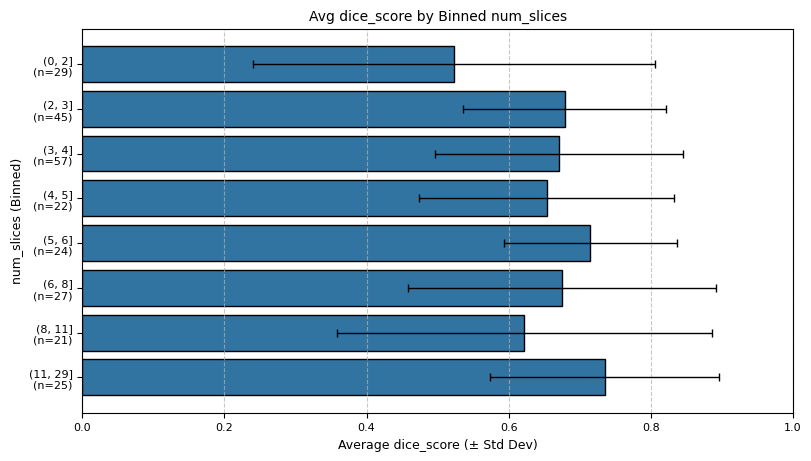

Finished generating plot for num_slices.


In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported for type hints and pd.isna
import numpy as np # Ensure numpy is imported if used for y_coords (though not in final version of this snippet)

nlst_csv_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_NLST.csv'
ucla_csv_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_UCLA.csv'

nlst_data = pd.read_csv(nlst_csv_path)
ucla_data = pd.read_csv(ucla_csv_path)
#display(data.head())

def create_histogram_continuous(df, key, ax):
    """Plots a histogram for a continuous numerical column on a given Axes."""
    # Check if data exists and is not all NaN after dropping NaNs
    data = df[key].dropna()
    if data.empty:
        print(f"  Skipping {key}: No valid data points.")
        return False # Indicate plot was not created

    ax.hist(data, bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {key}')
    ax.set_xlabel(key)
    ax.set_ylabel('Frequency')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7) # Add grid
    return True # Indicate plot was created

def create_barplot_categorical(df, key, ax, top_n=30):
    """Plots a bar chart for a categorical column on a given Axes, showing top N categories."""
    # Check if data exists
    if df[key].isnull().all():
        print(f"  Skipping {key}: Column is all NaN.")
        return False

    # Calculate value counts, handling potential NaN categories explicitly if needed
    counts = df[key].value_counts(dropna=False) # Include NaNs if present

    # Limit the number of categories shown for clarity
    original_count = len(counts)
    if original_count > top_n:
        print(f"  Showing top {top_n} categories for {key} (out of {original_count}).")
        counts = counts.head(top_n)

    if counts.empty:
        print(f"  Skipping {key}: No categories found after filtering.")
        return False

    # Using pandas plot directly on the specified axes:
    counts.plot(kind='bar', edgecolor='black', ax=ax)
    ax.set_title(f'Frequency of Categories in {key}')
    ax.set_xlabel(key)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45) # Rotate labels for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7) # Add grid

    # Add counts on top of the bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2., bar.get_height(),
                f'{int(bar.get_height())}', # Display the count (height of the bar)
                ha='center', va='bottom', fontsize=9)

    return True

def generate_average_metric_by_feature_on_ax(df, metric_col, key, ax, top_n_cat=30):
    """
    Computes and plots the average metric score (e.g., dice_score) grouped by a
    feature column's values onto a given Matplotlib Axes object, using a horizontal bar plot
    with error bars representing standard deviation.
    Annotates bars with mean and sample count. Handles categorical and binned numerical features.
    Returns True if plot is successful.
    """
    # Use a temporary df containing only the feature and metric, drop rows where EITHER is NaN
    temp_df = df[[key, metric_col]].dropna()
    if temp_df.empty:
         print(f"  Skipping {key}: No overlapping non-NaN data with {metric_col}.")
         return False

    # Decide plotting strategy based on feature type and unique values
    is_numeric = pd.api.types.is_numeric_dtype(temp_df[key])
    unique_count = temp_df[key].nunique()

    grouping_key_col_name = key # This will be the actual column name in plot_data for grouping
    plot_y_label = key          # This will be the Y-axis label text

    # If numeric with many unique values, bin it first
    if is_numeric and unique_count > top_n_cat:
        print(f"  Binning numeric feature '{key}' ({unique_count} unique values) into ~{top_n_cat} quantile-based bins.")
        try:
            binned_col_name = f'{key}_binned'

            if pd.api.types.is_integer_dtype(temp_df[key]):
                bin_precision = 0
            else:
                bin_precision = 1 # Changed precision to 1 for float types

            temp_df[binned_col_name] = pd.qcut(temp_df[key], q=top_n_cat, duplicates='drop', precision=bin_precision)

            grouping_key_col_name = binned_col_name
            plot_y_label = f'{key} (Binned)'

            grouped_stats = temp_df.groupby(grouping_key_col_name, observed=True)[metric_col].agg(['mean', 'std', 'count'])
            plot_title = f'Avg {metric_col} by Binned {key}'

            if isinstance(grouped_stats.index, pd.CategoricalIndex) and \
               isinstance(grouped_stats.index.categories, pd.IntervalIndex):

                new_formatted_categories = [
                    f"({interval.left:.{bin_precision}f}, {interval.right:.{bin_precision}f}]"
                    for interval in grouped_stats.index.categories
                ]

                category_map = {
                    old_cat: new_str_cat
                    for old_cat, new_str_cat in zip(grouped_stats.index.categories, new_formatted_categories)
                }

                # Rename the categories of the index. The index remains Categorical,
                # but its categories are now the formatted strings.
                grouped_stats.index = grouped_stats.index.rename_categories(category_map)
            else:
                # Fallback if the index is not as expected (e.g., already stringified or qcut changed behavior)
                grouped_stats.index = grouped_stats.index.astype(str)

        except ValueError as ve:
             print(f"    Could not bin {key} effectively using qcut ({ve}). Grouping by unique values instead.")
             grouped_stats = temp_df.groupby(key)[metric_col].agg(['mean', 'std', 'count']).sort_index()
             plot_title = f'Avg {metric_col} by {key}'
             if len(grouped_stats) > top_n_cat * 1.5:
                 print(f"    Warning: Plotting {len(grouped_stats)} unique numeric values for {key} after failing to bin. May be cluttered.")
             grouped_stats.index = grouped_stats.index.astype(str)
             # grouping_key_col_name remains `key`, plot_y_label remains `key`

    # If categorical or numeric with few unique values, group directly
    else:
        print(f"  Grouping by categorical or low-cardinality numeric feature '{key}'.")
        grouped_stats = temp_df.groupby(key)[metric_col].agg(['mean', 'std', 'count'])

        if not is_numeric and unique_count > top_n_cat:
             print(f"    Showing top {top_n_cat} categories for '{key}' based on frequency.")
             top_categories = df[key].value_counts().nlargest(top_n_cat).index
             grouped_stats = grouped_stats[grouped_stats.index.isin(top_categories)]

        grouped_stats.index = grouped_stats.index.astype(str)
        grouped_stats = grouped_stats.sort_index()
        plot_title = f'Avg {metric_col} by {key}'
        # grouping_key_col_name remains `key`, plot_y_label remains `key`

    if grouped_stats.empty:
        print(f"  Skipping {key}: Grouping resulted in empty data.")
        return False

    plot_data = grouped_stats.reset_index()
    # The index is now a column, named either `key` or `binned_col_name`.
    # We stored this name in `grouping_key_col_name`.

    # Ensure the grouping key column (y-axis) is of string type for seaborn compatibility
    # and append the count to the label for each category/bin.
    plot_data['y_axis_label'] = plot_data[grouping_key_col_name].astype(str) + \
                                '\n(n=' + plot_data['count'].astype(str) + ')'


    # Plotting using Seaborn for a horizontal bar plot (bars only)
    sns.barplot(x='mean', y='y_axis_label', data=plot_data, ax=ax,
                color=sns.color_palette()[0], edgecolor='black', orient='h', errorbar=None) # errorbar=None to plot only bars

    # Add error bars manually using matplotlib's errorbar function
    # y_coords are 0, 1, ..., N-1 corresponding to the order of categories in plot_data.
    # This assumes plot_data is sorted in the desired plotting order, which it is due to sort_index() earlier.
    y_coords = np.arange(len(plot_data))
    ax.errorbar(x=plot_data['mean'], y=y_coords, xerr=plot_data['std'], fmt='none', c='black',
                capsize=3, elinewidth=1, zorder=5) # zorder to ensure visibility on top of bars

    ax.set_title(plot_title, fontsize=10)
    ax.set_xlabel(f'Average {metric_col} (± Std Dev)', fontsize=9)  # Updated X-axis label
    ax.set_ylabel(plot_y_label, fontsize=9)             # Feature categories/bins on Y-axis
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Add grid lines (only horizontal lines for horizontal bar plot)
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    # Annotate bars with mean and count
    # Assumes ax.patches order matches plot_data rows.
    for i, bar in enumerate(ax.patches):
        mean_val = bar.get_width() # This is the 'mean' value plotted for horizontal bars

        # Retrieve count from plot_data for the corresponding bar
        # std_val and std_text are no longer needed for annotation text
        count_val = plot_data['count'].iloc[i]

        if pd.isna(mean_val): # Skip annotation if mean is NaN
            continue



    return True

def generate_single_plot(df, key, metric_col='dice_score', figsize=(12, 5), top_n=30, xlim=None, savefig=True):
    """
    Generates a single plot showing the average value of `metric_col` (e.g., 'dice_score')
    grouped by the categories or binned values of the specified `key` column.
    Uses a horizontal bar plot with standard deviation error bars.
    Allows setting x-axis limits via `xlim`.
    Saves the figure if savefig is True.
    """
    # Using the globally defined keys_to_ignore list
    if key in keys_to_ignore:
        print(f"Skipping ignored column: {key}")
        return
    if key == metric_col:
        print(f"Skipping: Feature column cannot be the same as the metric column ('{key}').")
        return

    print(f"Generating average '{metric_col}' plot for feature: {key} (dtype: {df[key].dtype})")
    try:
        fig, ax = plt.subplots(figsize=figsize)

        plot_created = generate_average_metric_by_feature_on_ax(
            df, metric_col, key, ax, top_n_cat=top_n
        )

        if plot_created:
            if xlim is not None:
                ax.set_xlim(xlim)
            fig.set_constrained_layout(True) # Adjust layout to prevent overlap

            if savefig:
                dataset_name = "unknown_dataset" # Default
                if 'dataset' in df.columns:
                    if not (df['dataset'].empty or df['dataset'].isnull().all()):
                        dataset_name = df['dataset'].unique()[0]
                    else:
                        print("Warning: 'dataset' column is empty or all NaN. Using 'unknown_dataset' for filename.")
                else:
                     print("Warning: 'dataset' column not found in DataFrame. Using 'unknown_dataset' for filename.")

                file_path = f'/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/additional_figures/{dataset_name}_avg_{metric_col}_by_{key}.png'
                plt.savefig(file_path, dpi=300)

            plt.show()
            plt.close(fig) # Close the figure after showing and/or saving
        else:
            print(f"  Plot for {key} was not generated (likely due to insufficient data).")
            plt.close(fig) # Close the figure if no plot was made

    except Exception as e:
        print(f"  Skipped {key} due to error: {e}")
        import traceback
        traceback.print_exc() # Print detailed traceback
        # Ensure figure is closed if an error occurs after its creation
        if 'fig' in locals() and plt.fignum_exists(fig.number):
             plt.close(fig)
    print(f"Finished generating plot for {key}.")

keys_to_ignore = ['pid', 'image_path', 'nodule_path', 'coordX', 'coordY', 'coordZ',
                  'screen_to_days', 'base_image_path', 'New Filename', 'cohort', 'training', 'year',
                  'scanner_model','psn_longest_diameter_solid_component', 'intra-nodular_bronchiectasis',
                  'necrosis', 'cavitation', 'dataset']

interested_keys_nlst = ['diagnosis_patient', 'diagnosis_nodule', 'level_of_suspicion_of_lung_cancer',
                        'slice_thickness', 'kernel', 'longest_axial_diameter_(mm)',
                        'short_diameter_(mm)', 'mean_diameter', 'nodule_margin_conspicuity', 'nodule_margins',
                        'additional_nodule_margins', 'nodule_shape', 'nodule_consistency', 'nodule_reticulation',
                        'cyst-like_spaces', 'eccentric_calcification', 'airway_cut-off', 'pleural_attachment',
                        'pleural_retraction', 'vascular_convergence', 'septal_stretching', 'paracicatricial_emphysema',
                        'predominant_nature_of_lung_parenchyma', 'emphysema_presence', 'emphysema_type', 'emphysema_distribution',
                        'fibrosis', 'fibrosis_distribution', 'lymphadenopathy', 'prior_scans',
                        'nodule_pre-existence', 'nodule_size', 'nodule_consistency.1', 'num_slices', 'pos_voxels']

interested_keys_ucla = ['location', 'margins', 'consistency', 'dr_diaag_code', 'evolution', 'suspicion', 'nodule_rads',
                        'nodule_measurement', 'diam_long', 'nodule_radioactivity', 'known_primary_cancer', 'num_slices', 'pos_voxels']


data = nlst_data
keys = interested_keys_nlst

def generate_plots(data, keys):
    for key in keys:
        figsize = (5, 5)

        if data[key].nunique() >= 9:
            figsize = (5, 4.5)
        elif data[key].nunique() >= 7:
            figsize = (5, 3.5)
        elif data[key].nunique() >= 5:
            figsize = (5, 3)
        elif data[key].nunique() >= 3:
            figsize = (5, 2.5)
        else:
            figsize = (5, 2)

        generate_single_plot(data, key, 'dice_score', figsize=figsize, top_n=10, xlim=(0, 1), savefig=True)

#generate_plots(ucla_data, interested_keys_ucla)
generate_single_plot(nlst_data, 'num_slices', 'dice_score', figsize=(8, 4.5), top_n=10, xlim=(0, 1), savefig=True)




==================== Processing column: diagnosis_patient ====================
Initial subset shape for 'diagnosis_patient': (250, 2)
Rows after dropping NaN in 'diagnosis_patient': 250 (dropped 0)
Column 'diagnosis_patient' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'diagnosis_patient' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                       mean  count       std
diagnosis_patient                           
0                  0.641231    201  0.208446
1                  0.740677     49  0.130344

--- Statistical Significance Testing (alpha=0.05) for diagnosis_patient ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (0 vs 1):
T-statistic: -4.1915
P-value: 0.0001
Significant difference found between '0' and '1' (p < 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNoduleS

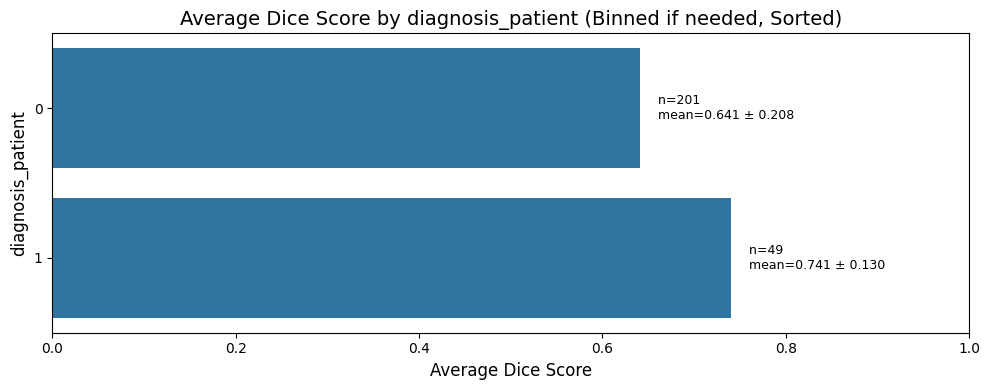



==================== Processing column: diagnosis_nodule ====================
Initial subset shape for 'diagnosis_nodule': (250, 2)
Rows after dropping NaN in 'diagnosis_nodule': 250 (dropped 0)
Column 'diagnosis_nodule' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'diagnosis_nodule' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                      mean  count       std
diagnosis_nodule                           
0.0               0.642868    209  0.206950
1.0               0.751737     41  0.120473

--- Statistical Significance Testing (alpha=0.05) for diagnosis_nodule ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (0.0 vs 1.0):
T-statistic: -4.6050
P-value: 0.0000
Significant difference found between '0.0' and '1.0' (p < 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNoduleSeg

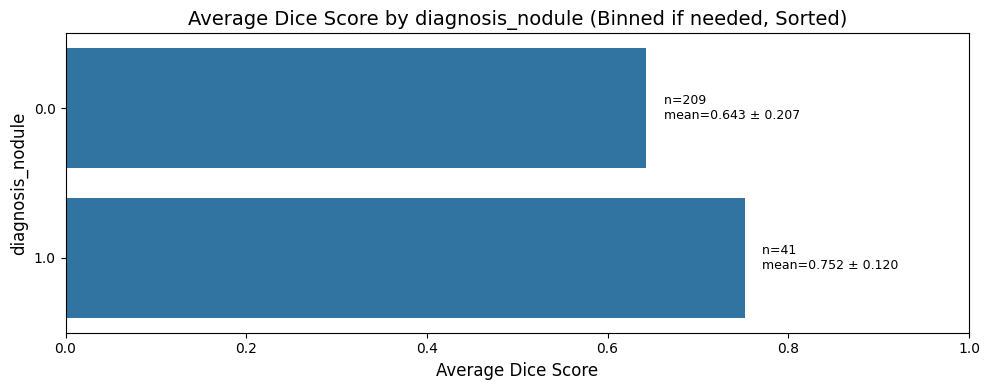



==================== Processing column: level_of_suspicion_of_lung_cancer ====================
Initial subset shape for 'level_of_suspicion_of_lung_cancer': (250, 2)
Rows after dropping NaN in 'level_of_suspicion_of_lung_cancer': 245 (dropped 5)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'level_of_suspicion_of_lung_cancer': 245 (dropped 0)
Column 'level_of_suspicion_of_lung_cancer' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                       mean  count       std
level_of_suspicion_of_lung_cancer                           
High                               0.781356     27  0.114955
Intermediate                       0.595233     47  0.229578
Moderately High                    0.616181     39  0.173871
Moderately Low                     0.716367     56  0.148991
Very Low                           0.638878     76  0.224399

--- Statistical Significan

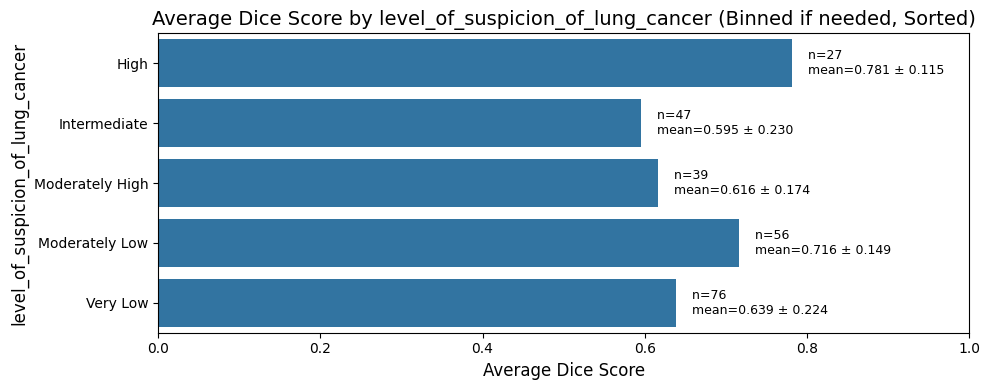



==================== Processing column: slice_thickness ====================
Initial subset shape for 'slice_thickness': (250, 2)
Rows after dropping NaN in 'slice_thickness': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'slice_thickness': 250 (dropped 0)
Column 'slice_thickness' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                     mean  count       std
slice_thickness                           
1 mm             0.648254     55  0.213519
1.5 mm           0.811881      3  0.037071
2 mm             0.684502     84  0.200167
2.5 mm           0.638179    102  0.193115
>3 mm            0.749768      6  0.151164

--- Statistical Significance Testing (alpha=0.05) for slice_thickness ---

Performing ANOVA on 5 groups with >1 sample...
ANOVA Results for slice_thickness:
F-statistic: 1.4187
P-value: 0.2283
ANOVA p-value (0.2283) is not less than alpha (0.

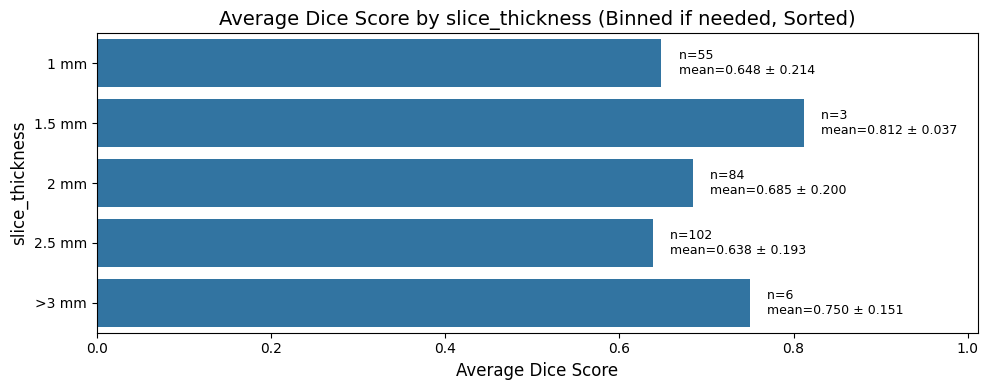



==================== Processing column: kernel ====================
Initial subset shape for 'kernel': (250, 2)
Rows after dropping NaN in 'kernel': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'kernel': 249 (dropped 0)
Column 'kernel' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
            mean  count       std
kernel                           
Medium  0.663040    246  0.198536
Sharp   0.421176      3  0.145662

--- Statistical Significance Testing (alpha=0.05) for kernel ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Medium vs Sharp):
T-statistic: 2.8439
P-value: 0.0994
No significant difference found between 'Medium' and 'Sharp' (p >= 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/figures/kernel_dice_distribution_NLST.png


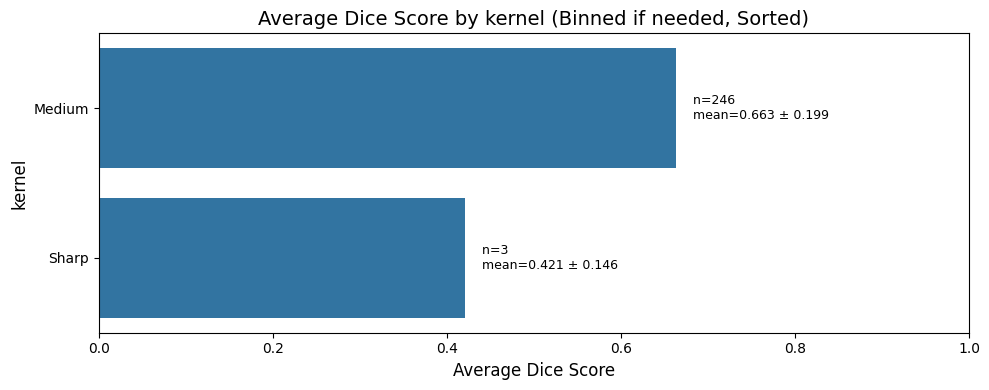



==================== Processing column: scanner_manufacturer ====================
Initial subset shape for 'scanner_manufacturer': (250, 2)
Rows after dropping NaN in 'scanner_manufacturer': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'scanner_manufacturer': 250 (dropped 0)
Column 'scanner_manufacturer' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
scanner_manufacturer                           
GE                    0.643034    149  0.197824
Philips               0.737073     18  0.148384
Siemens               0.670944     73  0.210199
Toshiba               0.712231     10  0.200543

--- Statistical Significance Testing (alpha=0.05) for scanner_manufacturer ---

Performing ANOVA on 4 groups with >1 sample...
ANOVA Results for scanner_manufacturer:
F-statistic: 1.5684
P-value: 0.1976
ANOVA p-value (0.1976) is n

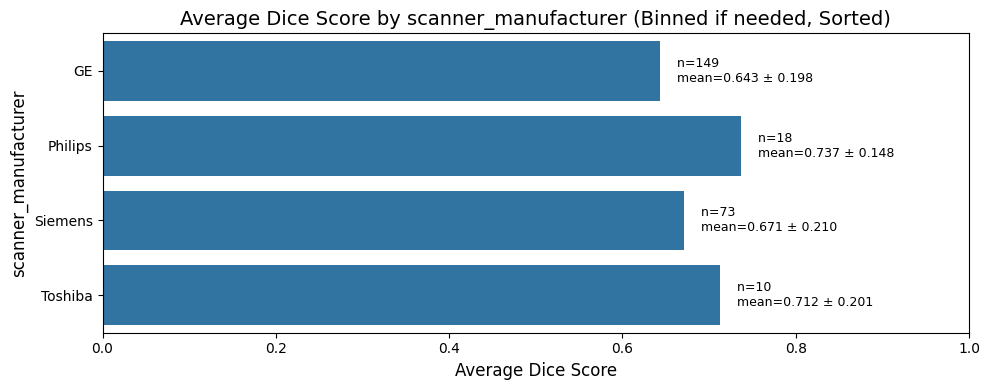



==================== Processing column: axial_location ====================
Initial subset shape for 'axial_location': (250, 2)
Rows after dropping NaN in 'axial_location': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'axial_location': 249 (dropped 0)
Column 'axial_location' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                    mean  count       std
axial_location                           
Central         0.672151    107  0.178553
Peripheral      0.653014    142  0.214323

--- Statistical Significance Testing (alpha=0.05) for axial_location ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Central vs Peripheral):
T-statistic: 0.7677
P-value: 0.4434
No significant difference found between 'Central' and 'Peripheral' (p >= 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_Lun

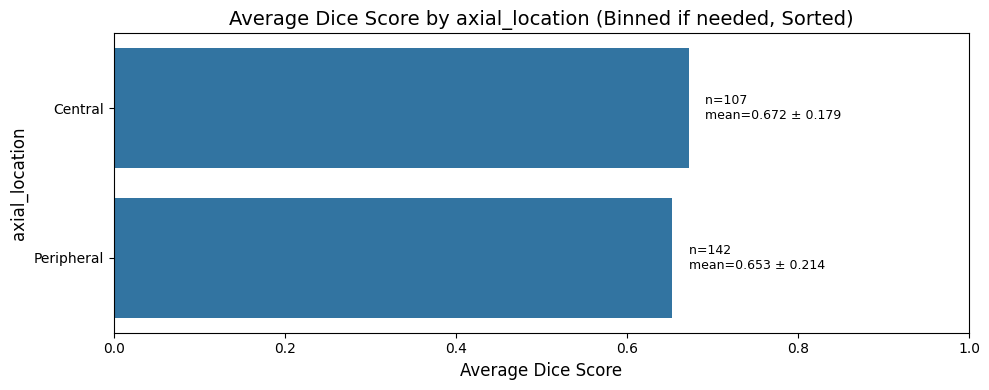



==================== Processing column: longest_axial_diameter_(mm) ====================
Initial subset shape for 'longest_axial_diameter_(mm)': (250, 2)
Rows after dropping NaN in 'longest_axial_diameter_(mm)': 250 (dropped 0)
Column 'longest_axial_diameter_(mm)' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'longest_axial_diameter_(mm)' has 111 unique values. Attempting binning...
Column 'longest_axial_diameter_(mm)' appears to be primarily numeric.
Attempting to bin numeric column 'longest_axial_diameter_(mm)' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                 mean  count       std
longest_axial_diameter_(mm)                           
(4.399, 6.3]                 0.670480     31  0.177864
(6.3, 6.88]                  0.658392     19  0.227883
(6.88, 7.2]                  0.625733     27  0.190869
(7.

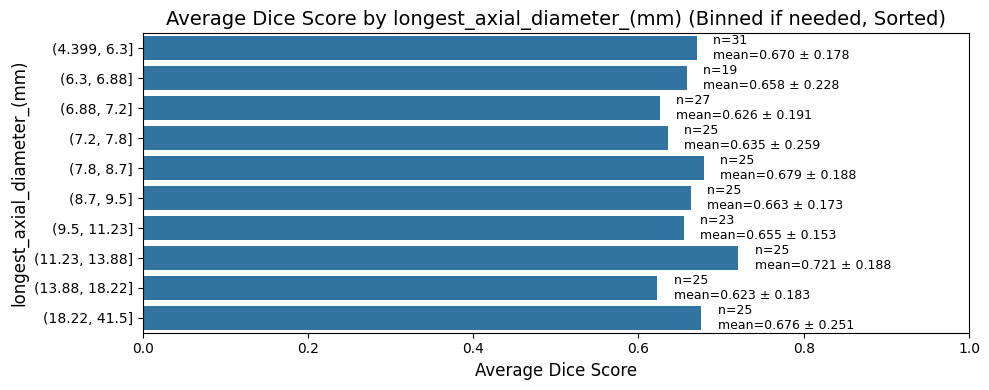



==================== Processing column: short_diameter_(mm) ====================
Initial subset shape for 'short_diameter_(mm)': (250, 2)
Rows after dropping NaN in 'short_diameter_(mm)': 250 (dropped 0)
Column 'short_diameter_(mm)' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'short_diameter_(mm)' has 95 unique values. Attempting binning...
Column 'short_diameter_(mm)' appears to be primarily numeric.
Attempting to bin numeric column 'short_diameter_(mm)' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                         mean  count       std
short_diameter_(mm)                           
(2.499, 4.3]         0.597564     26  0.240319
(4.3, 4.78]          0.607710     24  0.247051
(4.78, 5.2]          0.692827     27  0.150624
(5.2, 5.6]           0.670169     24  0.168072
(5.6, 6.1]           0.675326     28  0.194783
(6.1, 

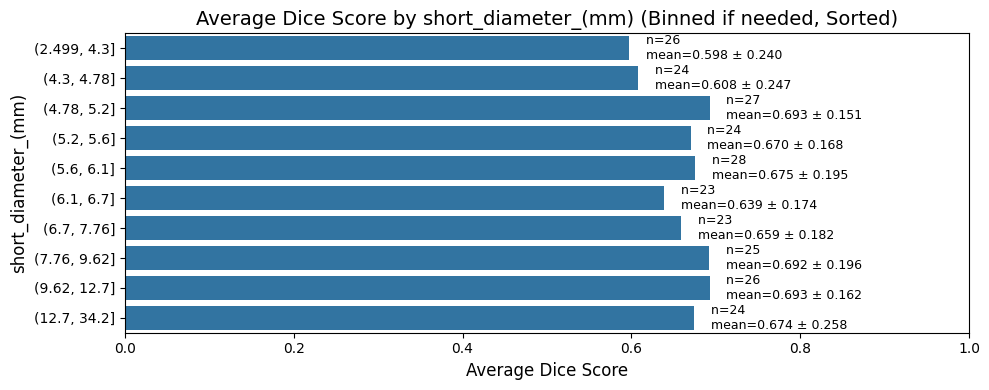



==================== Processing column: mean_diameter ====================
Initial subset shape for 'mean_diameter': (250, 2)
Rows after dropping NaN in 'mean_diameter': 250 (dropped 0)
Column 'mean_diameter' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'mean_diameter' has 104 unique values. Attempting binning...
Column 'mean_diameter' appears to be primarily numeric.
Attempting to bin numeric column 'mean_diameter' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                   mean  count       std
mean_diameter                           
(3.799, 5.5]   0.624257     26  0.250183
(5.5, 5.9]     0.616165     32  0.204611
(5.9, 6.2]     0.630447     22  0.206206
(6.2, 6.8]     0.739345     24  0.183355
(6.8, 7.45]    0.643121     21  0.159211
(7.45, 8.04]   0.670532     25  0.165779
(8.04, 9.46]   0.666401     25  0.156658
(9.46, 

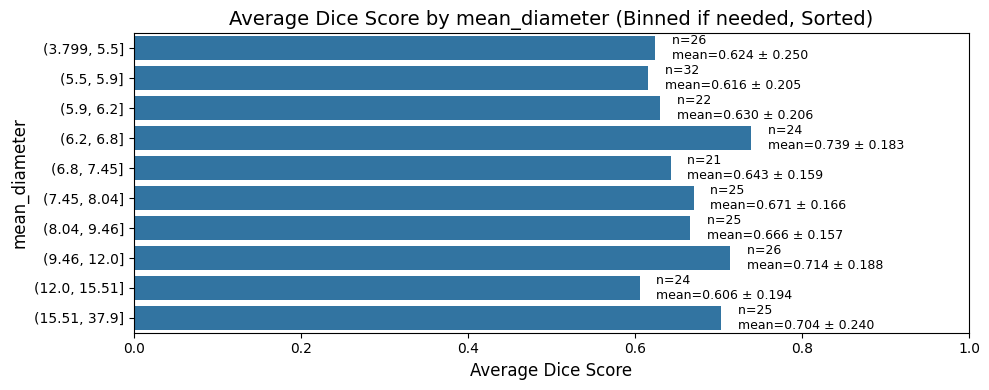



==================== Processing column: nodule_margin_conspicuity ====================
Initial subset shape for 'nodule_margin_conspicuity': (250, 2)
Rows after dropping NaN in 'nodule_margin_conspicuity': 247 (dropped 3)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_margin_conspicuity': 247 (dropped 0)
Column 'nodule_margin_conspicuity' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                               mean  count       std
nodule_margin_conspicuity                           
Poorly marginated          0.495561     37  0.208877
Well marginated            0.688604    210  0.184554

--- Statistical Significance Testing (alpha=0.05) for nodule_margin_conspicuity ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Poorly marginated vs Well marginated):
T-statistic: -5.2708
P-value: 0.0000
Significant differe

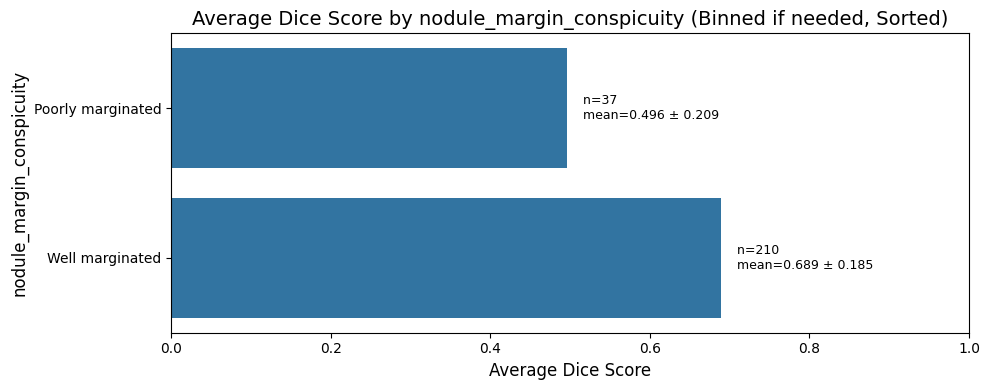



==================== Processing column: nodule_margins ====================
Initial subset shape for 'nodule_margins': (250, 2)
Rows after dropping NaN in 'nodule_margins': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_margins': 250 (dropped 0)
Column 'nodule_margins' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                         mean  count       std
nodule_margins                                
Ill-defined          0.458837     31  0.187274
Lobulated            0.725873     32  0.153973
Smooth               0.668493    154  0.196550
Spiculated/Serrated  0.750933     33  0.127491

--- Statistical Significance Testing (alpha=0.05) for nodule_margins ---

Performing ANOVA on 4 groups with >1 sample...
ANOVA Results for nodule_margins:
F-statistic: 16.7352
P-value: 0.0000
ANOVA indicates a significant difference exists between at least one pair 

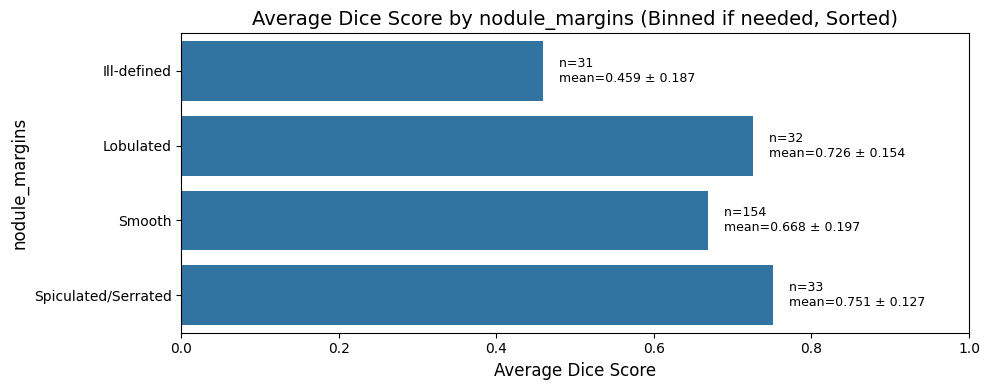



==================== Processing column: additional_nodule_margins ====================
Initial subset shape for 'additional_nodule_margins': (250, 2)
Rows after dropping NaN in 'additional_nodule_margins': 244 (dropped 6)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'additional_nodule_margins': 244 (dropped 0)
Column 'additional_nodule_margins' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                               mean  count       std
additional_nodule_margins                           
Ill-defined                0.482206     34  0.206145
Lobulated                  0.730718     50  0.144785
Notched (concavity)        0.805970      1       NaN
Smooth                     0.666054    114  0.195982
Spiculated/Serrated        0.720327     45  0.157943

--- Statistical Significance Testing (alpha=0.05) for additional_nodule_margins ---

Performing ANOVA on 4 groups with >1 

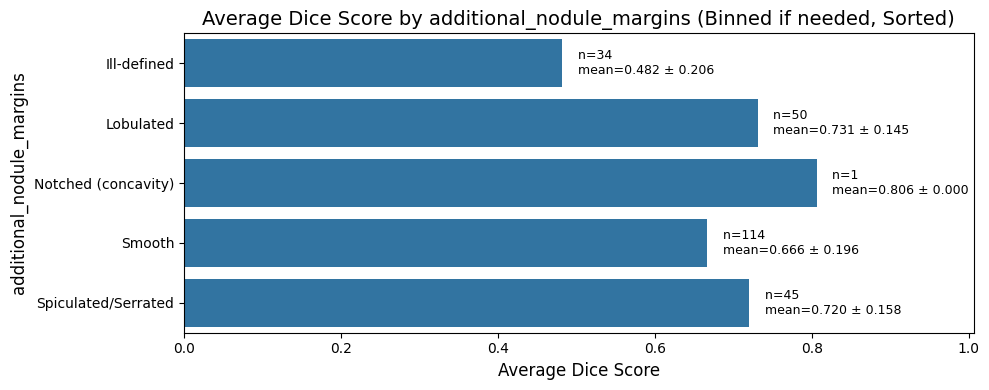



==================== Processing column: nodule_shape ====================
Initial subset shape for 'nodule_shape': (250, 2)
Rows after dropping NaN in 'nodule_shape': 246 (dropped 4)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_shape': 246 (dropped 0)
Column 'nodule_shape' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                       mean  count       std
nodule_shape                                
Complex/Irregular  0.584812     80  0.196175
Ovoid              0.689713     91  0.214994
Polygonal          0.622579     25  0.169417
Round              0.736989     50  0.145990

--- Statistical Significance Testing (alpha=0.05) for nodule_shape ---

Performing ANOVA on 4 groups with >1 sample...
ANOVA Results for nodule_shape:
F-statistic: 7.7956
P-value: 0.0001
ANOVA indicates a significant difference exists between at least one pair of groups.

Performing Tuke

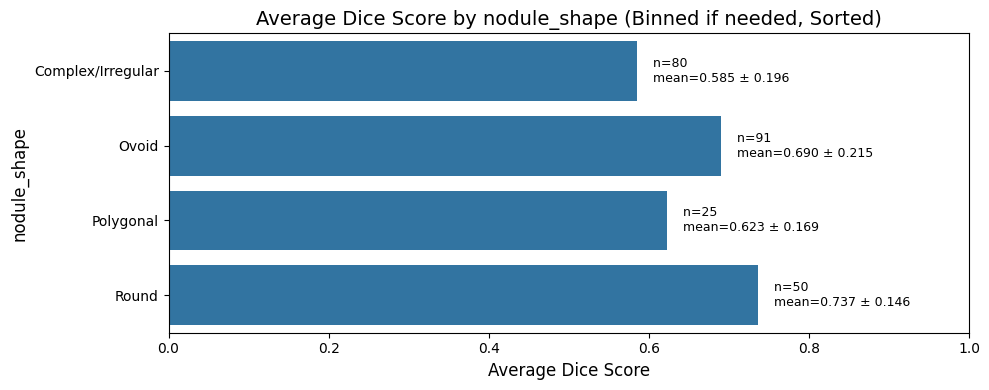



==================== Processing column: nodule_consistency ====================
Initial subset shape for 'nodule_consistency': (250, 2)
Rows after dropping NaN in 'nodule_consistency': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_consistency': 249 (dropped 0)
Column 'nodule_consistency' has 5 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
nodule_consistency                           
Part-solid          0.526421     30  0.203408
Peri-cystic         0.556336      3  0.094765
Pure ground glass   0.517868     20  0.228648
Semiconsolidation   0.582109     16  0.180716
Solid               0.706573    180  0.178340

--- Statistical Significance Testing (alpha=0.05) for nodule_consistency ---

Performing ANOVA on 5 groups with >1 sample...
ANOVA Results for nodule_consistency:
F-statistic: 10.6030
P-value: 0.0000
ANOVA 

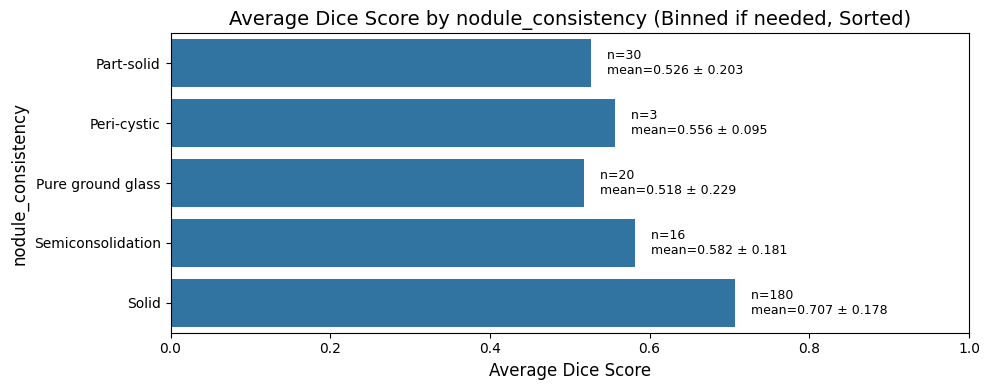



==================== Processing column: nodule_reticulation ====================
Initial subset shape for 'nodule_reticulation': (250, 2)
Rows after dropping NaN in 'nodule_reticulation': 248 (dropped 2)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_reticulation': 248 (dropped 0)
Column 'nodule_reticulation' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                         mean  count       std
nodule_reticulation                           
Absent               0.676334    222  0.195191
Present              0.519973     26  0.188145

--- Statistical Significance Testing (alpha=0.05) for nodule_reticulation ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: 3.9934
P-value: 0.0004
Significant difference found between 'Absent' and 'Present' (p < 0.05).

Generating plot...
Figure 

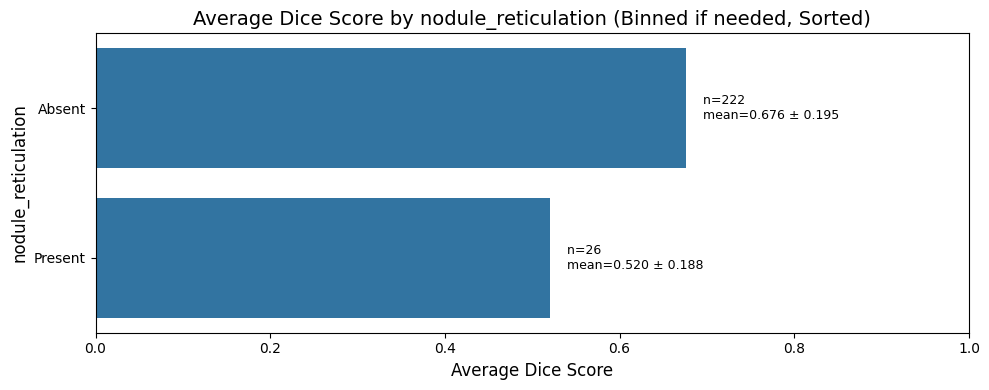



==================== Processing column: cyst-like_spaces ====================
Initial subset shape for 'cyst-like_spaces': (250, 2)
Rows after dropping NaN in 'cyst-like_spaces': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'cyst-like_spaces': 249 (dropped 0)
Column 'cyst-like_spaces' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                      mean  count       std
cyst-like_spaces                           
Absent            0.672239    202  0.192362
Present           0.606883     47  0.221296

--- Statistical Significance Testing (alpha=0.05) for cyst-like_spaces ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: 1.8672
P-value: 0.0665
No significant difference found between 'Absent' and 'Present' (p >= 0.05).

Generating plot...
Figure saved to /radraid2/dongwoo

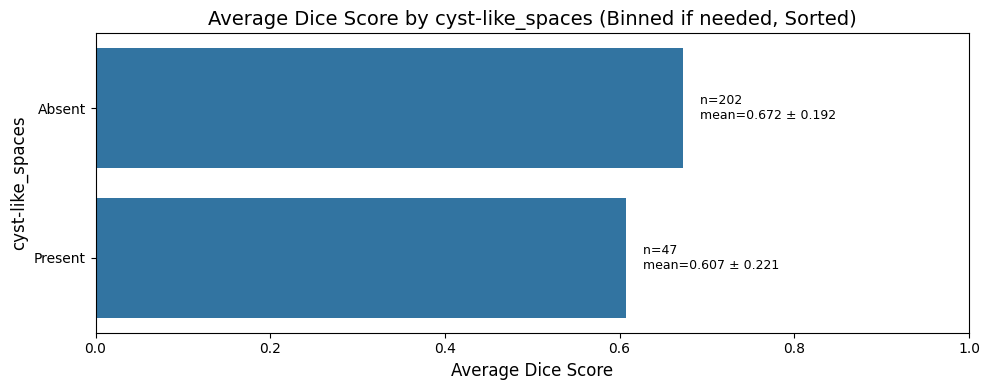



==================== Processing column: eccentric_calcification ====================
Initial subset shape for 'eccentric_calcification': (250, 2)
Rows after dropping NaN in 'eccentric_calcification': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'eccentric_calcification': 249 (dropped 0)
Column 'eccentric_calcification' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                             mean  count       std
eccentric_calcification                           
Absent                   0.656087    241  0.200666
Present                  0.791972      8  0.109191

--- Statistical Significance Testing (alpha=0.05) for eccentric_calcification ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: -3.3378
P-value: 0.0092
Significant difference found between 'Absent' and 'Present

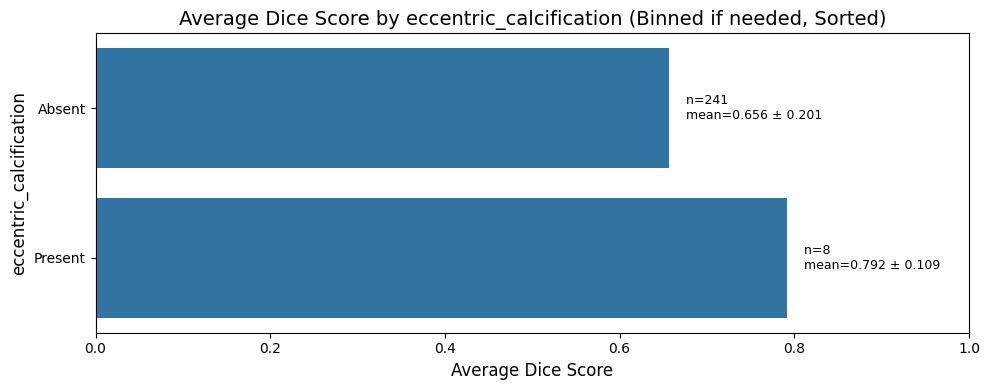



==================== Processing column: airway_cut-off ====================
Initial subset shape for 'airway_cut-off': (250, 2)
Rows after dropping NaN in 'airway_cut-off': 53 (dropped 197)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'airway_cut-off': 53 (dropped 0)
Column 'airway_cut-off' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                    mean  count       std
airway_cut-off                           
Absent          0.680146     48  0.185076
Present         0.796380      5  0.148929

--- Statistical Significance Testing (alpha=0.05) for airway_cut-off ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: -1.6197
P-value: 0.1621
No significant difference found between 'Absent' and 'Present' (p >= 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNodule

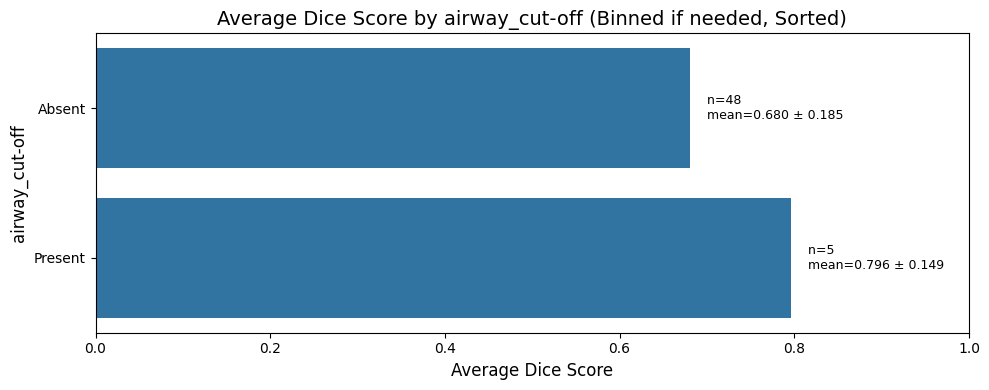



==================== Processing column: pleural_attachment ====================
Initial subset shape for 'pleural_attachment': (250, 2)
Rows after dropping NaN in 'pleural_attachment': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'pleural_attachment': 249 (dropped 0)
Column 'pleural_attachment' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
pleural_attachment                           
Absent              0.686045    127  0.181928
Present             0.633403    122  0.213946

--- Statistical Significance Testing (alpha=0.05) for pleural_attachment ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: 2.0877
P-value: 0.0379
Significant difference found between 'Absent' and 'Present' (p < 0.05).

Generating plot...
Figure saved to /

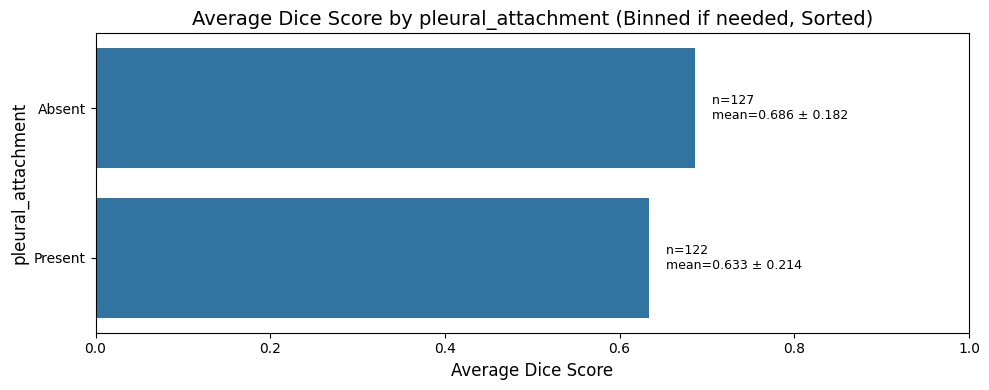



==================== Processing column: pleural_retraction ====================
Initial subset shape for 'pleural_retraction': (250, 2)
Rows after dropping NaN in 'pleural_retraction': 249 (dropped 1)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'pleural_retraction': 249 (dropped 0)
Column 'pleural_retraction' has 3 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
pleural_retraction                           
Absent              0.658441    199  0.201877
Mild dimpling       0.662813     36  0.176826
Obvious dimpling    0.721610     14  0.186842

--- Statistical Significance Testing (alpha=0.05) for pleural_retraction ---

Performing ANOVA on 3 groups with >1 sample...
ANOVA Results for pleural_retraction:
F-statistic: 0.6675
P-value: 0.5139
ANOVA p-value (0.5139) is not less than alpha (0.05).
Overall difference between groups is not stat

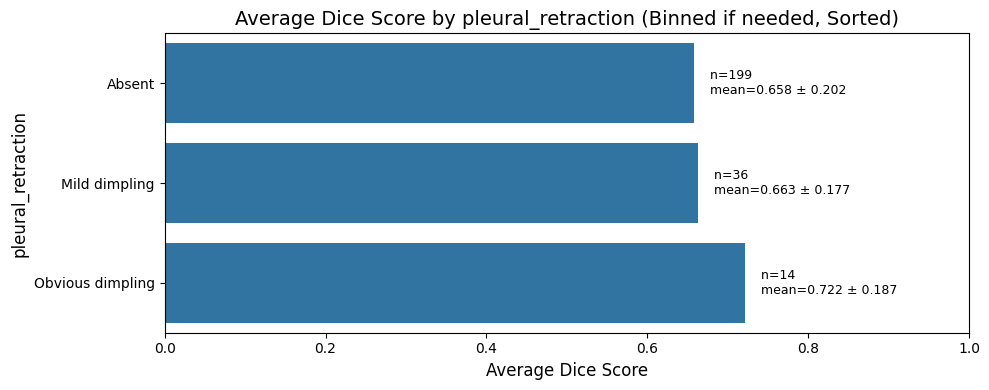



==================== Processing column: vascular_convergence ====================
Initial subset shape for 'vascular_convergence': (250, 2)
Rows after dropping NaN in 'vascular_convergence': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'vascular_convergence': 250 (dropped 0)
Column 'vascular_convergence' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
vascular_convergence                           
Absent                0.648208    221  0.203566
Present               0.756089     29  0.130948

--- Statistical Significance Testing (alpha=0.05) for vascular_convergence ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: -3.8657
P-value: 0.0003
Significant difference found between 'Absent' and 'Present' (p < 0.05).

Generating plot

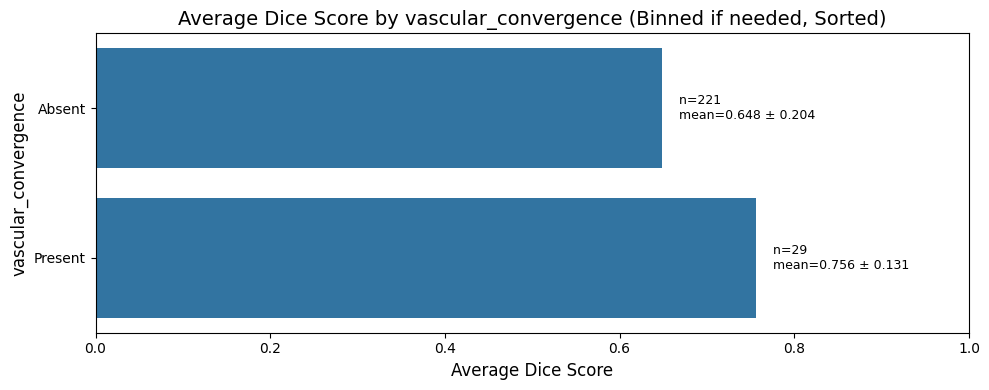



==================== Processing column: septal_stretching ====================
Initial subset shape for 'septal_stretching': (250, 2)
Rows after dropping NaN in 'septal_stretching': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'septal_stretching': 250 (dropped 0)
Column 'septal_stretching' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                       mean  count       std
septal_stretching                           
Absent             0.649129    166  0.207207
Present            0.683634     84  0.181838

--- Statistical Significance Testing (alpha=0.05) for septal_stretching ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: -1.3510
P-value: 0.1783
No significant difference found between 'Absent' and 'Present' (p >= 0.05).

Generating plot...
Figure saved to /radra

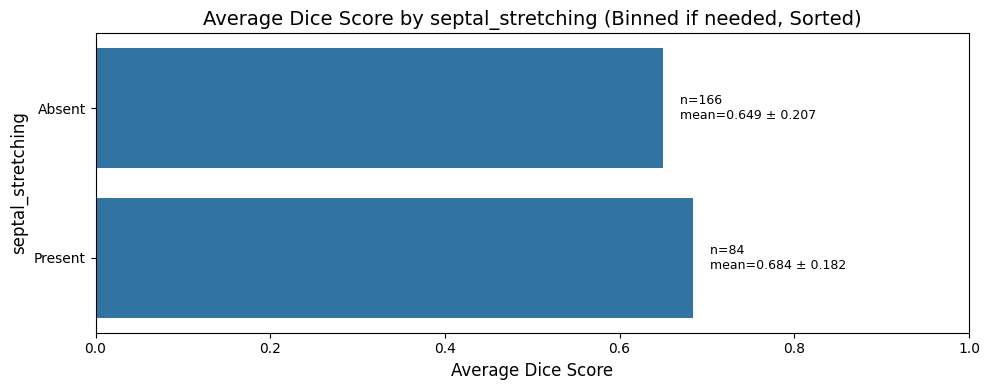



==================== Processing column: paracicatricial_emphysema ====================
Initial subset shape for 'paracicatricial_emphysema': (250, 2)
Rows after dropping NaN in 'paracicatricial_emphysema': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'paracicatricial_emphysema': 250 (dropped 0)
Column 'paracicatricial_emphysema' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                               mean  count       std
paracicatricial_emphysema                           
Absent                     0.657086    230  0.202468
Present                    0.702544     20  0.157211

--- Statistical Significance Testing (alpha=0.05) for paracicatricial_emphysema ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: -1.2089
P-value: 0.2381
No significant difference found betwee

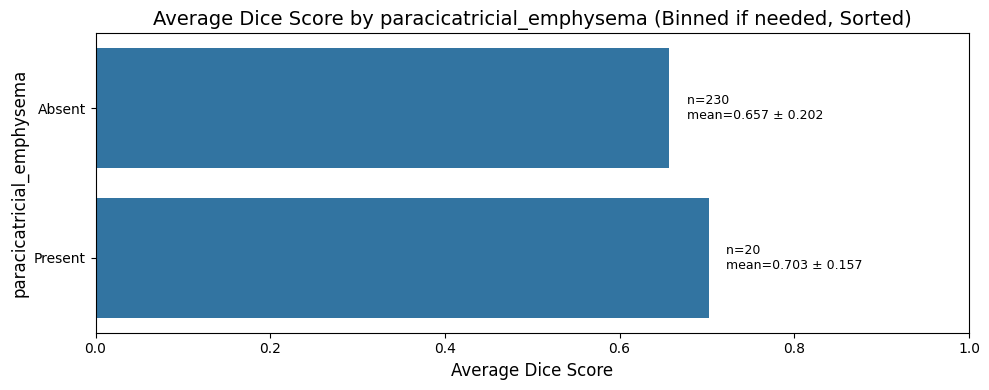



==================== Processing column: predominant_nature_of_lung_parenchyma ====================
Initial subset shape for 'predominant_nature_of_lung_parenchyma': (250, 2)
Rows after dropping NaN in 'predominant_nature_of_lung_parenchyma': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'predominant_nature_of_lung_parenchyma': 250 (dropped 0)
Column 'predominant_nature_of_lung_parenchyma' has 3 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                           mean  count       std
predominant_nature_of_lung_parenchyma                           
Emphysema                              0.668962     56  0.188317
Fibrosis                               0.685484      2  0.000000
Normal lung                            0.658061    192  0.203865

--- Statistical Significance Testing (alpha=0.05) for predominant_nature_of_lung_parenchyma ---

Performing 

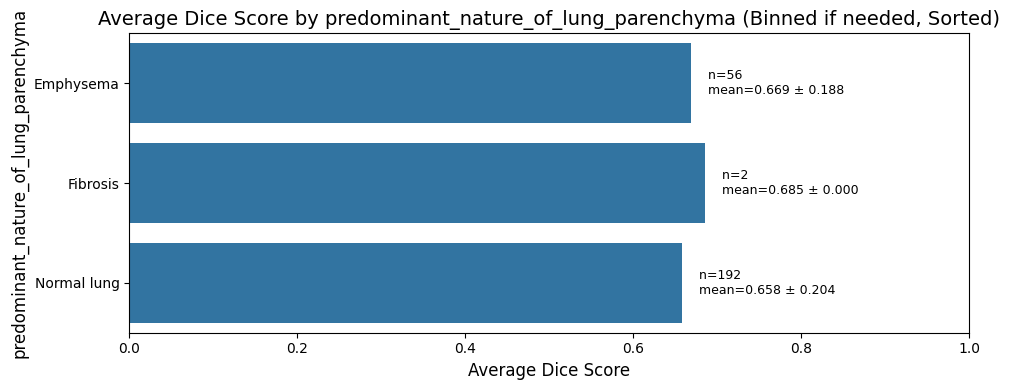



==================== Processing column: emphysema_presence ====================
Initial subset shape for 'emphysema_presence': (250, 2)
Rows after dropping NaN in 'emphysema_presence': 247 (dropped 3)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'emphysema_presence': 247 (dropped 0)
Column 'emphysema_presence' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                        mean  count       std
emphysema_presence                           
Absent              0.668699     79  0.192723
Present             0.655194    168  0.203821

--- Statistical Significance Testing (alpha=0.05) for emphysema_presence ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: 0.5042
P-value: 0.6148
No significant difference found between 'Absent' and 'Present' (p >= 0.05).

Generating plot...
Figure saved 

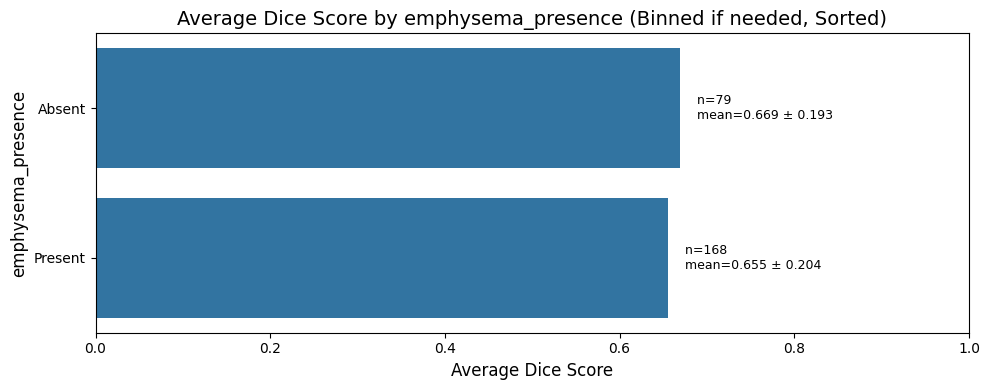



==================== Processing column: emphysema_type ====================
Initial subset shape for 'emphysema_type': (250, 2)
Rows after dropping NaN in 'emphysema_type': 177 (dropped 73)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'emphysema_type': 177 (dropped 0)
Column 'emphysema_type' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                mean  count       std
emphysema_type                                       
Centrilobular               0.653234    133  0.203422
Centrilobular + panlobular  0.768199      2  0.013546
Centrilobular + paraseptal  0.686651     29  0.197120
Paraseptal                  0.653804     13  0.205115

--- Statistical Significance Testing (alpha=0.05) for emphysema_type ---

Performing ANOVA on 4 groups with >1 sample...
ANOVA Results for emphysema_type:
F-statistic: 0.4136
P-value: 0.7435
ANOVA p-value (0.7435) is not le

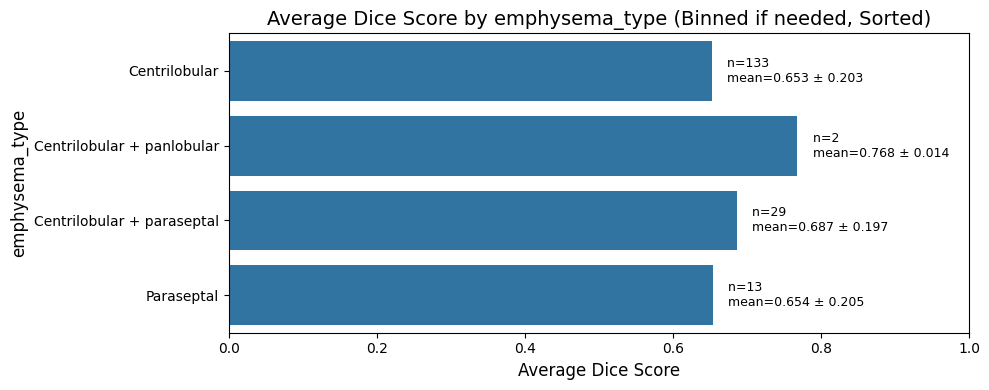



==================== Processing column: emphysema_distribution ====================
Initial subset shape for 'emphysema_distribution': (250, 2)
Rows after dropping NaN in 'emphysema_distribution': 176 (dropped 74)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'emphysema_distribution': 176 (dropped 0)
Column 'emphysema_distribution' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                            mean  count       std
emphysema_distribution                           
Diffuse                 0.608690     46  0.247677
Upper lobe              0.677231    130  0.179772

--- Statistical Significance Testing (alpha=0.05) for emphysema_distribution ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Diffuse vs Upper lobe):
T-statistic: -1.7232
P-value: 0.0898
No significant difference found between 'Diffuse' and 'Upper lo

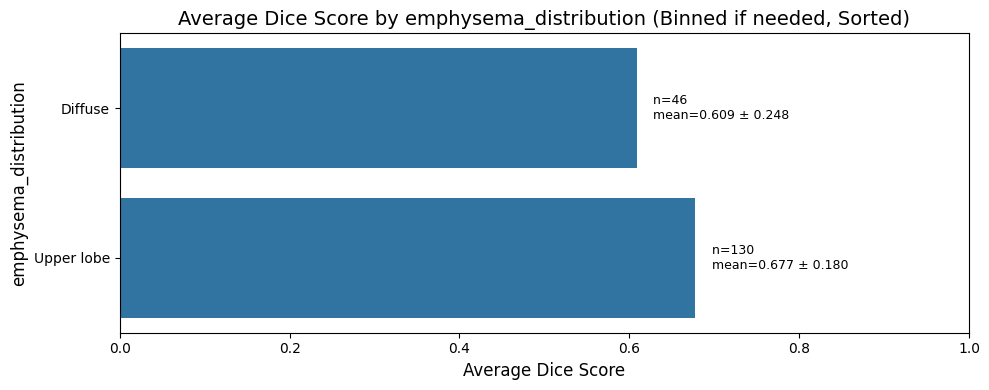



==================== Processing column: fibrosis ====================
Initial subset shape for 'fibrosis': (250, 2)
Rows after dropping NaN in 'fibrosis': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'fibrosis': 250 (dropped 0)
Column 'fibrosis' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
              mean  count       std
fibrosis                           
Absent    0.668568    154  0.201278
Present   0.648137     96  0.196601

--- Statistical Significance Testing (alpha=0.05) for fibrosis ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Absent vs Present):
T-statistic: 0.7919
P-value: 0.4294
No significant difference found between 'Absent' and 'Present' (p >= 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/figures/fibrosis_dice_distribution_NLST.p

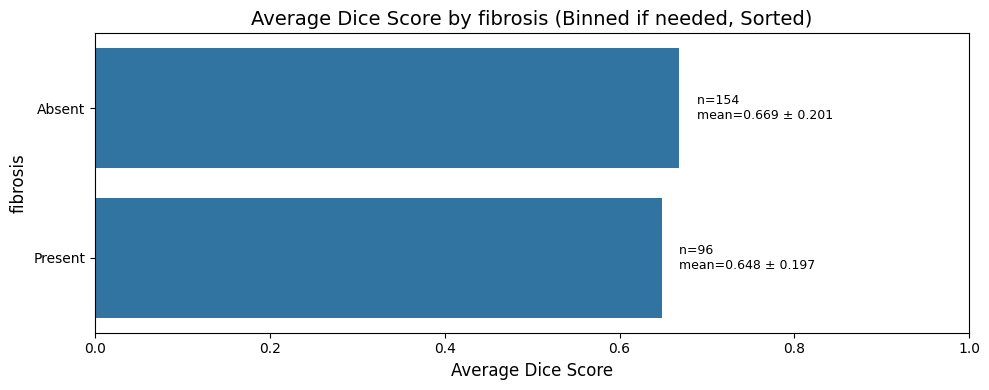



==================== Processing column: fibrosis_distribution ====================
Initial subset shape for 'fibrosis_distribution': (250, 2)
Rows after dropping NaN in 'fibrosis_distribution': 96 (dropped 154)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'fibrosis_distribution': 96 (dropped 0)
Column 'fibrosis_distribution' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                           mean  count       std
fibrosis_distribution                           
Diffuse                0.588730      6  0.248198
Focal                  0.652098     90  0.193760

--- Statistical Significance Testing (alpha=0.05) for fibrosis_distribution ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (Diffuse vs Focal):
T-statistic: -0.6131
P-value: 0.5647
No significant difference found between 'Diffuse' and 'Focal' (p >= 0.05).

Gen

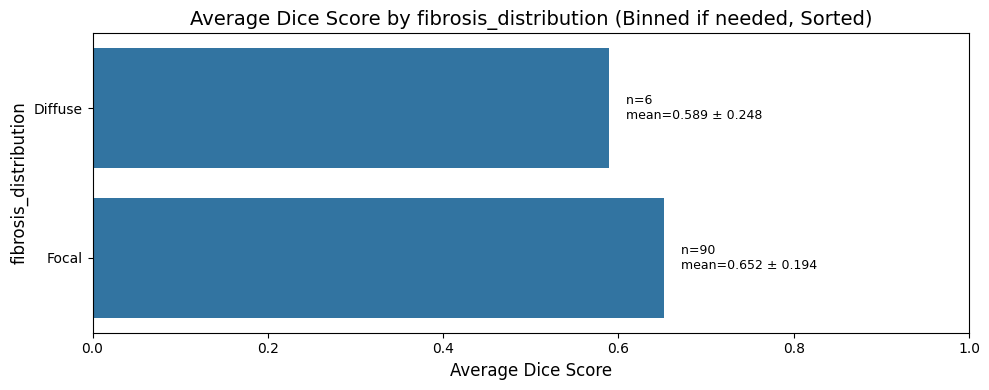



==================== Processing column: lymphadenopathy ====================
Initial subset shape for 'lymphadenopathy': (250, 2)
Rows after dropping NaN in 'lymphadenopathy': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'lymphadenopathy': 250 (dropped 0)
Column 'lymphadenopathy' has 3 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
lymphadenopathy                                
No                    0.665199    216  0.196858
Suspicious            0.624141     11  0.284493
Yes, likely reactive  0.636181     23  0.181015

--- Statistical Significance Testing (alpha=0.05) for lymphadenopathy ---

Performing ANOVA on 3 groups with >1 sample...
ANOVA Results for lymphadenopathy:
F-statistic: 0.4120
P-value: 0.6628
ANOVA p-value (0.6628) is not less than alpha (0.05).
Overall difference between groups is not statistically s

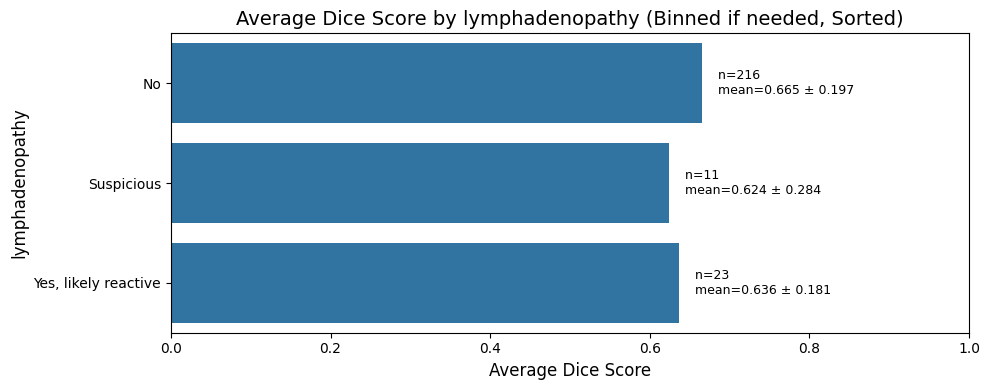



==================== Processing column: prior_scans ====================
Initial subset shape for 'prior_scans': (250, 2)
Rows after dropping NaN in 'prior_scans': 250 (dropped 0)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'prior_scans': 250 (dropped 0)
Column 'prior_scans' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                 mean  count       std
prior_scans                           
No           0.737033     36  0.150919
Yes          0.647885    214  0.203871

--- Statistical Significance Testing (alpha=0.05) for prior_scans ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (No vs Yes):
T-statistic: 3.1002
P-value: 0.0030
Significant difference found between 'No' and 'Yes' (p < 0.05).

Generating plot...
Figure saved to /radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/figures/prior_scans_dice_distri

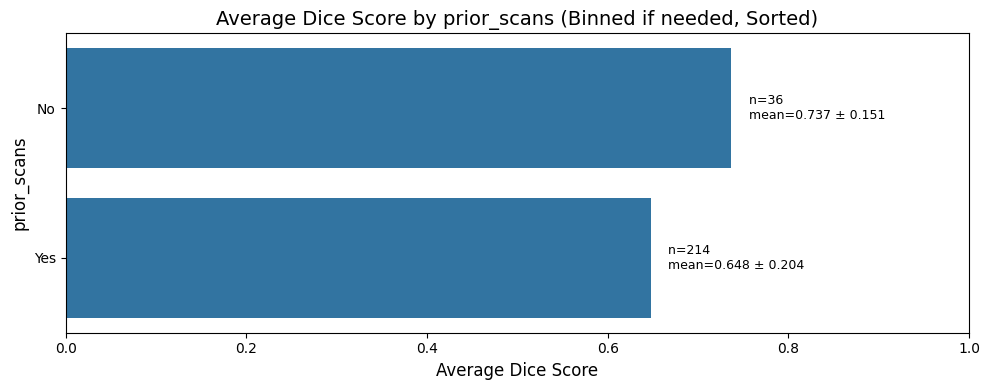



==================== Processing column: nodule_pre-existence ====================
Initial subset shape for 'nodule_pre-existence': (250, 2)
Rows after dropping NaN in 'nodule_pre-existence': 212 (dropped 38)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_pre-existence': 212 (dropped 0)
Column 'nodule_pre-existence' has 2 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                          mean  count       std
nodule_pre-existence                           
No                    0.636044     39  0.175970
Yes                   0.650775    173  0.211045

--- Statistical Significance Testing (alpha=0.05) for nodule_pre-existence ---

Exactly two groups with sufficient data found. Performing Welch's t-test...

Welch's t-test Results (No vs Yes):
T-statistic: -0.4543
P-value: 0.6511
No significant difference found between 'No' and 'Yes' (p >= 0.05).

Generating plot...
Figure 

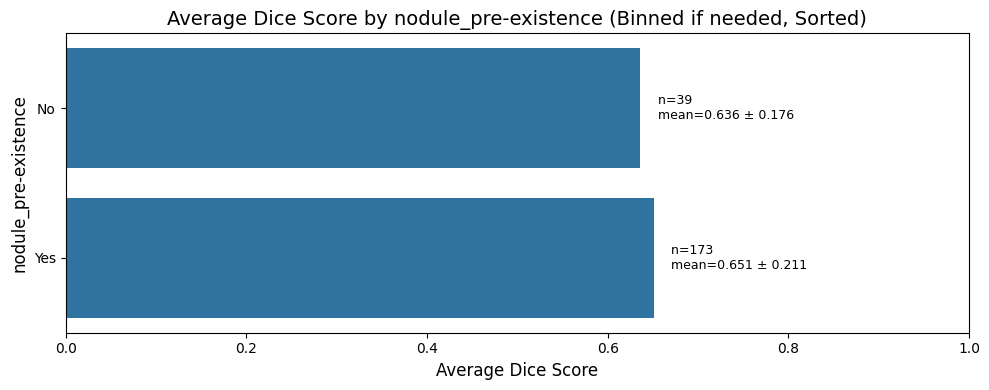



==================== Processing column: nodule_size ====================
Initial subset shape for 'nodule_size': (250, 2)
Rows after dropping NaN in 'nodule_size': 172 (dropped 78)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_size': 172 (dropped 0)
Column 'nodule_size' has 3 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                 mean  count       std
nodule_size                           
Decreased    0.558052      6  0.220602
Increased    0.636996     39  0.200543
Stable       0.660891    127  0.214196

--- Statistical Significance Testing (alpha=0.05) for nodule_size ---

Performing ANOVA on 3 groups with >1 sample...
ANOVA Results for nodule_size:
F-statistic: 0.8030
P-value: 0.4497
ANOVA p-value (0.4497) is not less than alpha (0.05).
Overall difference between groups is not statistically significant, skipping post-hoc tests.

Generating plot...
Figure saved to

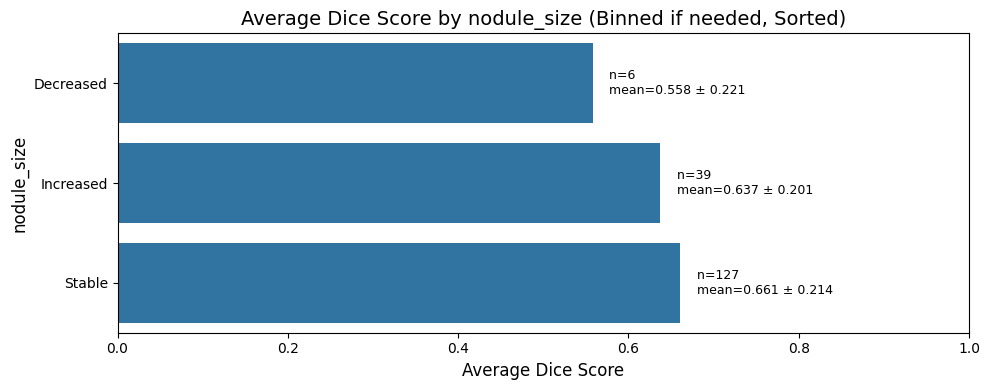



==================== Processing column: nodule_consistency.1 ====================
Initial subset shape for 'nodule_consistency.1': (250, 2)
Rows after dropping NaN in 'nodule_consistency.1': 169 (dropped 81)
Rows after dropping specific values ['Unknown', 'Not specified'] in 'nodule_consistency.1': 169 (dropped 0)
Column 'nodule_consistency.1' has 4 unique values. No binning applied.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                                   mean  count       std
nodule_consistency.1                                    
Decreased attenuation          0.431004      4  0.223974
Increased attenuation diffuse  0.578878     10  0.135389
Increased attenuation focal    0.546851      7  0.280790
Stable                         0.666527    148  0.209678

--- Statistical Significance Testing (alpha=0.05) for nodule_consistency.1 ---

Performing ANOVA on 4 groups with >1 sample...
ANOVA Results for nodule_consistency.1:
F-statis

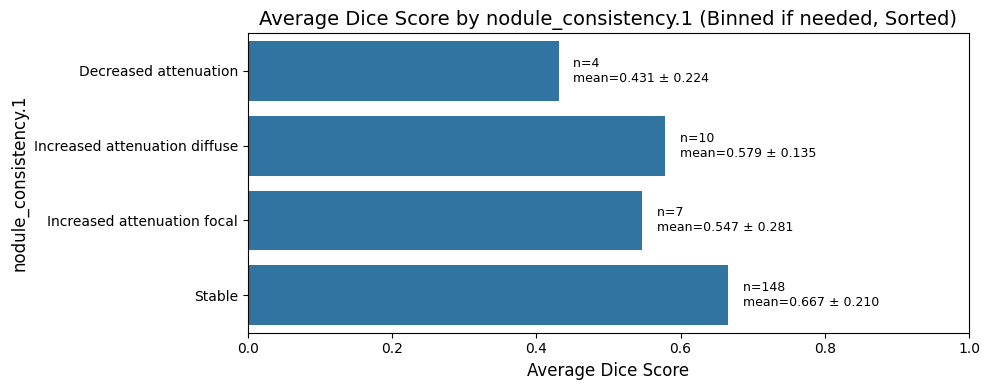



==================== Processing column: num_slices ====================
Initial subset shape for 'num_slices': (250, 2)
Rows after dropping NaN in 'num_slices': 250 (dropped 0)
Column 'num_slices' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'num_slices' has 22 unique values. Attempting binning...
Column 'num_slices' appears to be primarily numeric.
Attempting to bin numeric column 'num_slices' into up to 10 quantiles.
Successfully binned numeric column into 8 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                  mean  count       std
num_slices                             
(0.999, 2.0]  0.522757     29  0.282562
(2.0, 3.0]    0.679040     45  0.142809
(3.0, 4.0]    0.670955     57  0.173879
(4.0, 5.0]    0.653693     22  0.179556
(5.0, 6.0]    0.715163     24  0.121689
(6.0, 8.0]    0.675037     27  0.216262
(8.0, 11.1]   0.622184     21  0.263897
(11.1, 29.0]  0.735299     25  0.160925

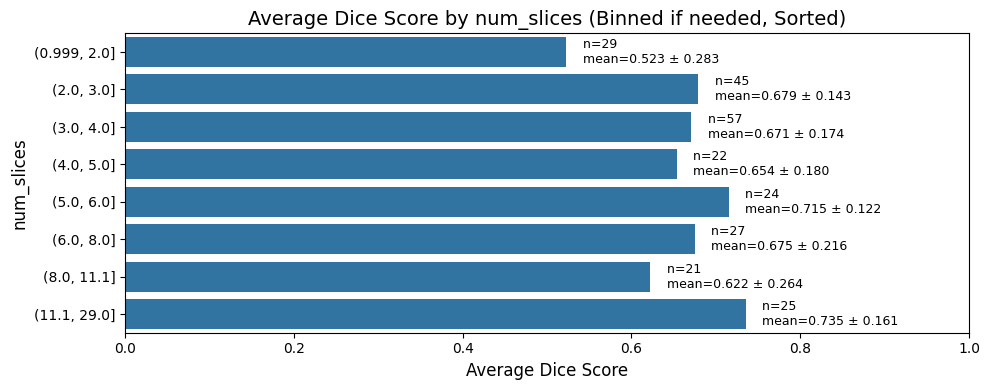



==================== Processing column: pos_voxels ====================
Initial subset shape for 'pos_voxels': (250, 2)
Rows after dropping NaN in 'pos_voxels': 250 (dropped 0)
Column 'pos_voxels' is numeric, skipping drop of string values ['Unknown', 'Not specified'].
Column 'pos_voxels' has 126 unique values. Attempting binning...
Column 'pos_voxels' appears to be primarily numeric.
Attempting to bin numeric column 'pos_voxels' into up to 10 quantiles.
Successfully binned numeric column into 10 bins.

Calculating group statistics...

--- Group Statistics (after potential binning, sorted) ---
                      mean  count       std
pos_voxels                                 
(0.999, 9.0]      0.480941     27  0.232293
(9.0, 15.0]       0.581325     28  0.188243
(15.0, 18.0]      0.683958     21  0.204249
(18.0, 24.0]      0.707418     26  0.190473
(24.0, 33.0]      0.704651     26  0.144846
(33.0, 48.4]      0.717898     22  0.132821
(48.4, 79.3]      0.635350     25  0.191696
(

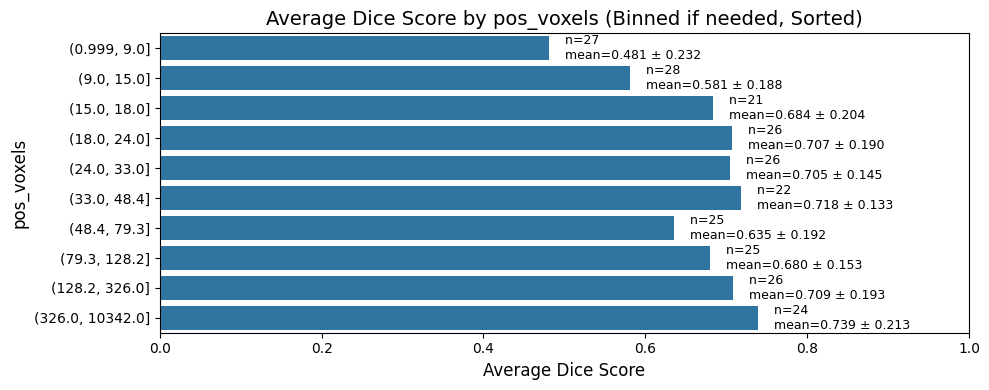



--- Analysis Complete for all columns ---


--- Analysis Complete for all columns ---


--- Analysis Complete for all columns ---


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import os # Import os module to check directory
import traceback # For detailed error reporting

result_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_NLST.csv'
trimmed_df = pd.read_csv(result_path)

def get_df_subset(df, column_name):
    # Ensure the target column exists
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")
    # Select 'dice_score' and the specified column
    if 'dice_score' not in df.columns:
        raise ValueError("'dice_score' column not found in DataFrame.")
    return df[['dice_score', column_name]].copy() # Use copy to avoid SettingWithCopyWarning

# Identify columns to process (all except 'dice_score')
columns_to_analyze = [col for col in trimmed_df.columns if col != 'dice_score']

# Base directory for saving figures
figure_base_dir = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/scripts/figures'

interested_keys_ucla = ['location', 'margins', 'consistency', 'dr_diaag_code', 'evolution', 'suspicion', 'nodule_rads',
                   'nodule_measurement', 'diam_long', 'nodule_radioactivity', 'known_primary_cancer', 'num_slices', 'pos_voxels']

interested_keys_nlst = ['diagnosis_patient', 'diagnosis_nodule', 'level_of_suspicion_of_lung_cancer', 
                        'slice_thickness', 'kernel', 'scanner_manufacturer', 'axial_location', 'longest_axial_diameter_(mm)', 
                        'short_diameter_(mm)', 'mean_diameter', 'nodule_margin_conspicuity', 'nodule_margins', 
                        'additional_nodule_margins', 'nodule_shape', 'nodule_consistency', 'nodule_reticulation', 
                        'cyst-like_spaces', 'eccentric_calcification', 'airway_cut-off', 'pleural_attachment', 
                        'pleural_retraction', 'vascular_convergence', 'septal_stretching', 'paracicatricial_emphysema', 
                        'predominant_nature_of_lung_parenchyma', 'emphysema_presence', 'emphysema_type', 'emphysema_distribution', 
                        'fibrosis', 'fibrosis_distribution', 'lymphadenopathy', 'prior_scans', 
                        'nodule_pre-existence', 'nodule_size', 'nodule_consistency.1', 'num_slices', 'pos_voxels']

# Ensure the base figure directory exists
if not os.path.exists(figure_base_dir):
    try:
        os.makedirs(figure_base_dir)
        print(f"Created base directory for figures: {figure_base_dir}")
    except Exception as e:
        print(f"Error creating base directory {figure_base_dir}: {e}. Figures may not be saved.")
        # Depending on requirements, you might want to exit here

# Loop through each column to analyze
for column_name in interested_keys_nlst:
    print(f"\n\n{'='*20} Processing column: {column_name} {'='*20}")

    try:
        # --- Get Subset ---
        df_subset = get_df_subset(trimmed_df, column_name)
        print(f"Initial subset shape for '{column_name}': {df_subset.shape}")

        # --- Preprocessing ---
        # Drop rows with missing values in the grouping column BEFORE binning/conversion
        initial_rows = len(df_subset)
        df_subset.dropna(subset=[column_name], inplace=True)
        print(f"Rows after dropping NaN in '{column_name}': {len(df_subset)} (dropped {initial_rows - len(df_subset)})")
        if len(df_subset) == 0:
             print(f"Skipping '{column_name}' as it became empty after dropping NaNs.")
             plt.close('all') # Close any potentially open plots
             continue # Skip to the next column

        # Drop specific unwanted string values
        drop_values = ['Unknown', 'Not specified'] # Add any other values to drop
        # Ensure the column is treated as string for isin comparison if it's object type
        if df_subset[column_name].dtype == 'object':
            initial_rows = len(df_subset)
            df_subset = df_subset[~df_subset[column_name].astype(str).isin(drop_values)]
            print(f"Rows after dropping specific values {drop_values} in '{column_name}': {len(df_subset)} (dropped {initial_rows - len(df_subset)})")
        elif pd.api.types.is_numeric_dtype(df_subset[column_name]):
             print(f"Column '{column_name}' is numeric, skipping drop of string values {drop_values}.")
        else:
             print(f"Column '{column_name}' has dtype {df_subset[column_name].dtype}, skipping drop of string values {drop_values}.")


        if len(df_subset) == 0:
             print(f"Skipping '{column_name}' as it became empty after dropping specific values.")
             plt.close('all') # Close any potentially open plots
             continue # Skip to the next column

        # --- Binning if more than 10 unique values ---
        n_unique = df_subset[column_name].nunique()
        is_numeric_binned = False # Flag to track if numeric binning occurred

        if n_unique > 10:
            print(f"Column '{column_name}' has {n_unique} unique values. Attempting binning...")
            # Check if the column is potentially numeric (might contain strings that can be converted)
            temp_numeric_col = pd.to_numeric(df_subset[column_name], errors='coerce')

            # Check if a significant portion could be converted to numeric
            if not temp_numeric_col.isnull().all() and temp_numeric_col.notnull().sum() > len(temp_numeric_col) * 0.5: # Heuristic: at least 50% numeric
                print(f"Column '{column_name}' appears to be primarily numeric.")
                # Drop rows where conversion failed before binning
                df_subset = df_subset[temp_numeric_col.notnull()].copy() # Work on a copy after filtering
                df_subset[column_name] = temp_numeric_col[temp_numeric_col.notnull()] # Assign the converted numeric values

                if df_subset[column_name].nunique() > 1: # Need variability to bin
                    print(f"Attempting to bin numeric column '{column_name}' into up to 10 quantiles.")
                    try:
                        # Use qcut for quantile-based bins, drop duplicate edges
                        df_subset[column_name] = pd.qcut(df_subset[column_name], q=10, duplicates='drop', retbins=False)
                        # df_subset[column_name] now contains Interval objects
                        is_numeric_binned = True
                        print(f"Successfully binned numeric column into {df_subset[column_name].nunique()} bins.")
                    except Exception as e:
                        print(f"Warning: Could not bin numeric column '{column_name}' using pd.qcut. Error: {e}. Proceeding with original numeric values (potentially >10).")
                        # Keep original numeric values if binning fails
                else:
                    print(f"Not enough unique numeric values in '{column_name}' after cleaning to perform quantile binning.")
                    # Keep original numeric values

            # Handle as categorical/string if not numeric or if numeric binning failed/was skipped
            if not is_numeric_binned:
                print(f"Treating column '{column_name}' as categorical. Binning into top 9 + 'Other'.")
                # Ensure the column is string type for value_counts and replacement
                df_subset[column_name] = df_subset[column_name].astype(str)
                value_counts = df_subset[column_name].value_counts()
                # Identify the top 9 most frequent categories
                top_categories = value_counts.nlargest(9).index
                # Replace values not in the top 9 with 'Other'
                df_subset[column_name] = df_subset[column_name].apply(lambda x: x if x in top_categories else 'Other')
                print(f"Number of unique values after categorical binning: {df_subset[column_name].nunique()}")
        else:
             print(f"Column '{column_name}' has {n_unique} unique values. No binning applied.")
             # Ensure column is string if it's object type for consistent grouping later
             if df_subset[column_name].dtype == 'object':
                 df_subset[column_name] = df_subset[column_name].astype(str)

        # --- End of Binning ---


        # Check if df_subset is empty after filtering and potential binning
        if df_subset.empty:
            print(f"DataFrame is empty after filtering/binning for column '{column_name}'. Cannot perform analysis.")
            plt.close('all')
            continue # Skip to the next column
        else:
            # --- Grouping and Stats ---
            print("\nCalculating group statistics...")
            # Group by the column (Intervals if numeric binned, strings/numbers otherwise)
            # Need to handle observed=False explicitly for future pandas versions if using CategoricalDtype
            # If column is Interval, observed=True is default and desired. If string/other, observed=False might be needed.
            observed_flag = True if isinstance(df_subset[column_name].dtype, pd.IntervalDtype) else False

            try:
                grouped_stats = df_subset.groupby(column_name, observed=observed_flag)['dice_score'].agg(['mean', 'count', 'std'])
            except TypeError as te:
                 # Handle cases like mixed types if not caught earlier, fallback to string conversion
                 print(f"TypeError during grouping '{column_name}', attempting conversion to string. Error: {te}")
                 df_subset[column_name] = df_subset[column_name].astype(str)
                 grouped_stats = df_subset.groupby(column_name, observed=False)['dice_score'].agg(['mean', 'count', 'std'])


            # Sort the grouped stats. IntervalIndex sorts numerically. String index sorts alphabetically.
            grouped_stats = grouped_stats.sort_index()

            # --- Prepare for Stats/Plotting ---
            # Get the sorted index (Intervals or strings/numbers)
            sorted_index = grouped_stats.index
            # Create the plot order using string representations of the sorted index
            plot_order = sorted_index.astype(str).tolist()
            # Convert the index of grouped_stats to string for consistent lookup later (e.g., in annotations)
            grouped_stats.index = grouped_stats.index.astype(str)

            # Convert the column in the main df to string *after* grouping/sorting
            # This ensures consistency for filtering and plotting using string labels
            df_subset[column_name] = df_subset[column_name].astype(str)


            counts = grouped_stats['count']
            means = grouped_stats['mean']
            stds = grouped_stats['std']
            print("\n--- Group Statistics (after potential binning, sorted) ---")
            print(grouped_stats)

            # --- Statistical Significance Testing ---
            alpha = 0.05
            print(f"\n--- Statistical Significance Testing (alpha={alpha}) for {column_name} ---")

            # Prepare data for comparison: list of dice scores for each group
            # Use the string group names from plot_order (derived from sorted index)
            group_names = plot_order
            # Filter df_subset using the string version of the column
            group_data = [df_subset['dice_score'][df_subset[column_name] == group].values for group in group_names]

            # Check if all groups have sufficient data for tests (e.g., >1 sample for std dev)
            valid_group_indices = [i for i, g in enumerate(group_data) if len(g) > 1]
            valid_groups_for_anova = [group_data[i] for i in valid_group_indices]
            # Use the corresponding string names for valid groups
            valid_group_names = [group_names[i] for i in valid_group_indices]


            significant_pairs_details = []

            if len(valid_groups_for_anova) >= 3: # ANOVA makes sense for 3+ groups
                # 1. ANOVA (to check for any significant difference overall)
                print(f"\nPerforming ANOVA on {len(valid_groups_for_anova)} groups with >1 sample...")
                f_stat, p_value_anova = stats.f_oneway(*valid_groups_for_anova)
                print(f"ANOVA Results for {column_name}:")
                print(f"F-statistic: {f_stat:.4f}")
                print(f"P-value: {p_value_anova:.4f}")

                if p_value_anova < alpha:
                    print("ANOVA indicates a significant difference exists between at least one pair of groups.")
                    # 2. Post-hoc Test: Tukey's HSD for pairwise comparisons
                    # Filter df_subset to include only the groups used in ANOVA/Tukey
                    # Use the string version of column_name for filtering and grouping
                    df_subset_filtered_for_tukey = df_subset[df_subset[column_name].isin(valid_group_names)]

                    print(f"\nPerforming Tukey's HSD post-hoc test...")
                    # Ensure data passed to tukeyhsd corresponds to the filtered groups
                    # Pass the string version of the column for groups
                    tukey_result = pairwise_tukeyhsd(endog=df_subset_filtered_for_tukey['dice_score'],
                                                     groups=df_subset_filtered_for_tukey[column_name],
                                                     alpha=alpha)

                    print("\nTukey's HSD Results Summary:")
                    print(tukey_result)

                    # Extract results into a DataFrame for easier filtering
                    results_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

                    # Filter for significant pairs
                    significant_pairs_tukey = results_df[results_df['reject'] == True]

                    print(f"\n--- {column_name} Pairs with Significant Difference (p-adj < {alpha}) based on Tukey's HSD ---")
                    if not significant_pairs_tukey.empty:
                            print(significant_pairs_tukey[['group1', 'group2', 'p-adj']])
                            # Store details for potential later use or more detailed reporting
                            for _, row in significant_pairs_tukey.iterrows():
                                significant_pairs_details.append({
                                    'pair': (row['group1'], row['group2']),
                                    'p_value': row['p-adj'],
                                    'test': 'Tukey HSD'
                                })
                    else:
                        print("No significant differences found between pairs after Tukey's HSD correction.")

                else:
                    print(f"ANOVA p-value ({p_value_anova:.4f}) is not less than alpha ({alpha}).")
                    print("Overall difference between groups is not statistically significant, skipping post-hoc tests.")

            elif len(valid_groups_for_anova) == 2:
                    # If exactly two groups with >1 sample, perform an independent t-test
                    print("\nExactly two groups with sufficient data found. Performing Welch's t-test...")
                    group1_data = valid_groups_for_anova[0]
                    group2_data = valid_groups_for_anova[1]
                    group1_name = valid_group_names[0] # String name
                    group2_name = valid_group_names[1] # String name

                    # Welch's t-test is performed as both groups have > 1 sample (checked above)
                    t_stat, p_value_ttest = stats.ttest_ind(group1_data, group2_data, equal_var=False) # Welch's t-test
                    print(f"\nWelch's t-test Results ({group1_name} vs {group2_name}):")
                    print(f"T-statistic: {t_stat:.4f}")
                    print(f"P-value: {p_value_ttest:.4f}")

                    if p_value_ttest < alpha:
                        print(f"Significant difference found between '{group1_name}' and '{group2_name}' (p < {alpha}).")
                        significant_pairs_details.append({
                            'pair': (group1_name, group2_name),
                            'p_value': p_value_ttest,
                            'test': "Welch's t-test"
                        })
                    else:
                        print(f"No significant difference found between '{group1_name}' and '{group2_name}' (p >= {alpha}).")

            else: # Handles cases where < 2 groups had > 1 sample
                    print("\nNot enough groups with sufficient data (>1 sample per group) for ANOVA or t-test.")


            # --- Categorical Plot ---
            print("\nGenerating plot...")
            fig, ax = plt.subplots(figsize=(10, 4)) # Increased height slightly
            # Ensure the order of bars matches the sorted index (now represented as strings in plot_order)
            # plot_order was created from the sorted index earlier

            # Check if df_subset is not empty before plotting
            if not df_subset.empty:
                # Use the string version of column_name for the y-axis and data filtering
                # Use plot_order (list of strings) to enforce the desired sort order
                # Set color to blue and remove error bars
                sns.barplot(x='dice_score', y=column_name, data=df_subset, ax=ax, order=plot_order, errorbar=None)
                ax.set_title(f'Average Dice Score by {column_name} (Binned if needed, Sorted)', fontsize=14)
                ax.set_xlabel('Average Dice Score', fontsize=12)
                ax.set_xlim(0, 1.0) # Set x-axis limit from 0 to 1 for Dice score
                ax.set_ylabel(column_name, fontsize=12) # Label remains the original column name

                # Annotate bars
                max_bar_width = 0 # Keep track of max bar width for text placement
                for i, bar in enumerate(ax.patches):
                    bar_width = bar.get_width()
                    if bar_width > max_bar_width:
                        max_bar_width = bar_width
                    bar_y_center = bar.get_y() + bar.get_height() / 2.

                    # Get corresponding count, mean, and std using the plot_order index
                    # Ensure index lookup is safe and uses the correct group name from plot_order
                    # grouped_stats index is now string type, matching plot_order
                    group_name = plot_order[i] # This is the string representation of the group
                    if group_name in grouped_stats.index:
                        stats_row = grouped_stats.loc[group_name]
                        count_val = int(stats_row['count']) # Ensure count is integer
                        mean_val = stats_row['mean'] # This should be equal to bar_width
                        std_val = stats_row['std'] if not pd.isna(stats_row['std']) else 0 # Handle potential NaN std if count=1

                        # Add text annotation slightly to the right of the bar
                        ax.text(bar_width + 0.015,  # x-position (slightly past the bar end)
                                bar_y_center,      # y-position (vertically centered)
                                f' n={count_val}\n mean={mean_val:.3f} ± {std_val:.3f}', # Text content
                                va='center',       # Vertical alignment
                                ha='left',         # Horizontal alignment
                                fontsize=9)        # Adjust fontsize
                    else:
                         print(f"Warning: Could not find stats for group '{group_name}' during annotation.")


                # Adjust x-limit slightly if needed to make space for text, but keep max at 1.0
                # Add a bit more space for annotations
                current_xlim = ax.get_xlim()
                # Estimate required space based on max bar width and typical annotation length
                required_xlim_for_text = max_bar_width + 0.20 # Increased buffer
                new_xlim_max = max(current_xlim[1], min(required_xlim_for_text, 1.1)) # Allow slightly > 1 if needed
                ax.set_xlim(current_xlim[0], new_xlim_max)


                plt.tight_layout() # Adjust layout to prevent labels overlapping

                # Sanitize column name for filename
                safe_column_name = "".join([c if c.isalnum() else "_" for c in column_name])
                fig_save_path = os.path.join(figure_base_dir, f"{safe_column_name}_dice_distribution_{result_path.split('_')[-1].replace('.csv','')}.png")

                # Try saving the figure
                try:
                    plt.savefig(fig_save_path, bbox_inches='tight') # Use bbox_inches='tight' to include annotations
                    print(f"Figure saved to {fig_save_path}")
                except Exception as e:
                    print(f"Error saving figure to {fig_save_path}: {e}")

                plt.show() # Show the plot after saving

            else:
                # This case should ideally be caught earlier, but as a safeguard:
                print("Skipping plot generation as the DataFrame subset is empty.")
                plt.close(fig) # Close the empty figure

    except Exception as e:
        print(f"\n--- ERROR processing column '{column_name}' ---")
        print(f"Error type: {type(e).__name__}")
        print(f"Error message: {e}")
        print("Traceback:")
        traceback.print_exc() # Print detailed traceback
        print(f"--- Skipping to next column ---")
        # Close any potentially open plot window from the failed iteration
        plt.close('all')
        continue # Move to the next column

print("\n\n--- Analysis Complete for all columns ---")
print("\n\n--- Analysis Complete for all columns ---")
print("\n\n--- Analysis Complete for all columns ---")

16
Displaying overlay for NLST1021 (0.025_0/16):
  Image: NLST1021_slice_33.npy
  Mask: NLST1021_slice_33.npy
  Prediction: NLST1021_slice_33_predmask.npy


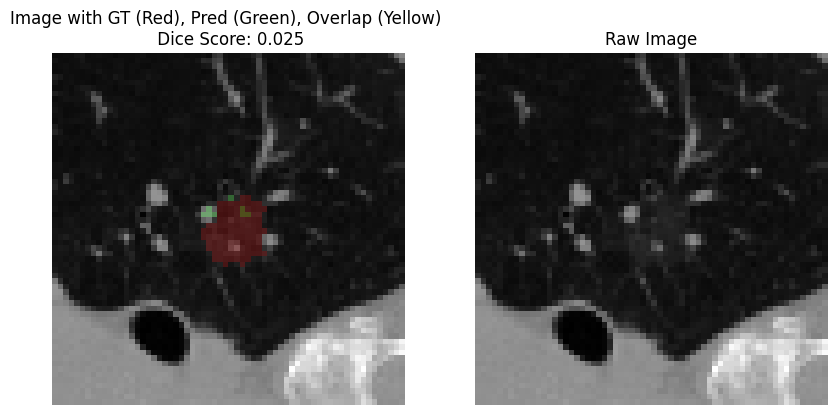

16
Displaying overlay for NLST1023 (0.316_1/16):
  Image: NLST1023_slice_32.npy
  Mask: NLST1023_slice_32.npy
  Prediction: NLST1023_slice_32_predmask.npy


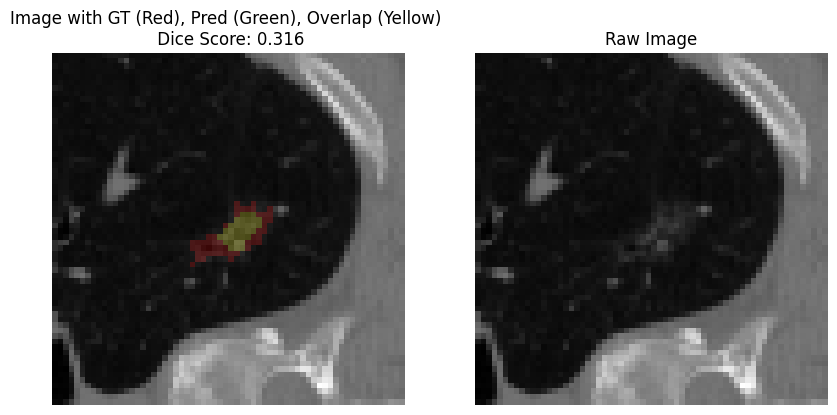

16
Displaying overlay for NLST1000 (0.460_2/16):
  Image: NLST1000_slice_34.npy
  Mask: NLST1000_slice_34.npy
  Prediction: NLST1000_slice_34_predmask.npy


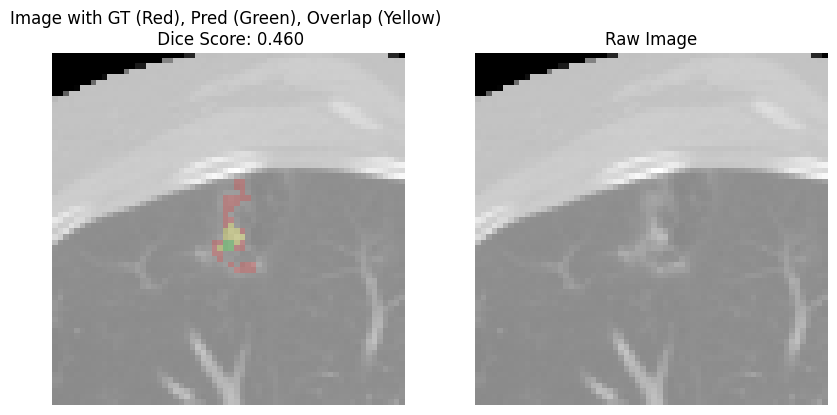

16
Displaying overlay for NLST1162 (0.698_3/16):
  Image: NLST1162_slice_28.npy
  Mask: NLST1162_slice_28.npy
  Prediction: NLST1162_slice_28_predmask.npy


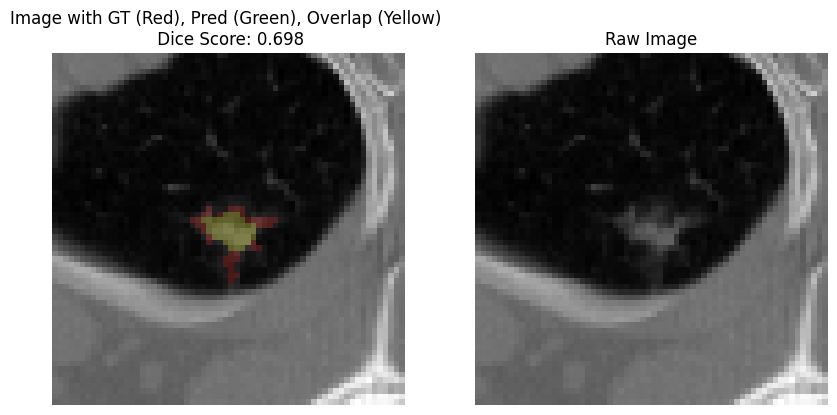

16
Displaying overlay for NLST1087 (0.789_4/16):
  Image: NLST1087_slice_33.npy
  Mask: NLST1087_slice_33.npy
  Prediction: NLST1087_slice_33_predmask.npy


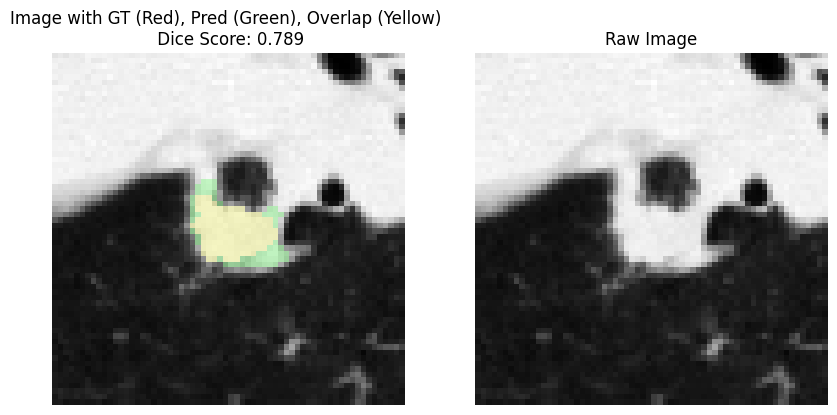

16
Displaying overlay for NLST1064 (0.809_5/16):
  Image: NLST1064_slice_32.npy
  Mask: NLST1064_slice_32.npy
  Prediction: NLST1064_slice_32_predmask.npy


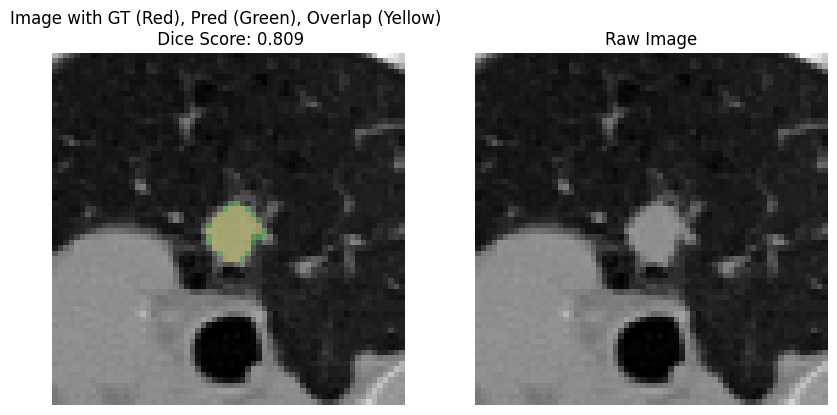

16
Displaying overlay for NLST1198 (0.817_6/16):
  Image: NLST1198_slice_33.npy
  Mask: NLST1198_slice_33.npy
  Prediction: NLST1198_slice_33_predmask.npy


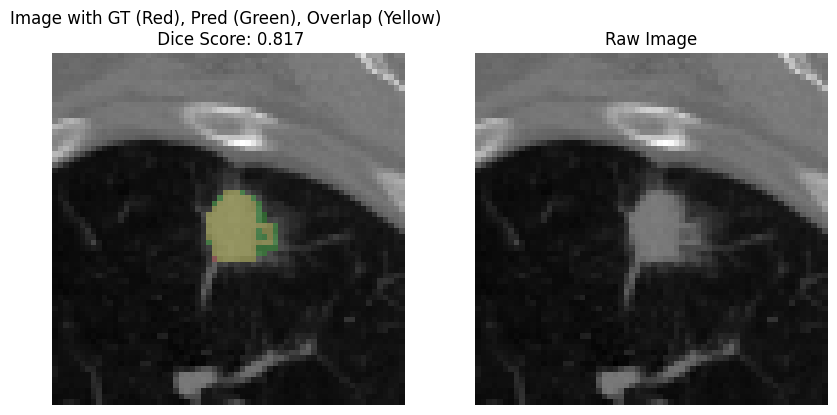

16
Displaying overlay for NLST1199 (0.820_7/16):
  Image: NLST1199_slice_33.npy
  Mask: NLST1199_slice_33.npy
  Prediction: NLST1199_slice_33_predmask.npy


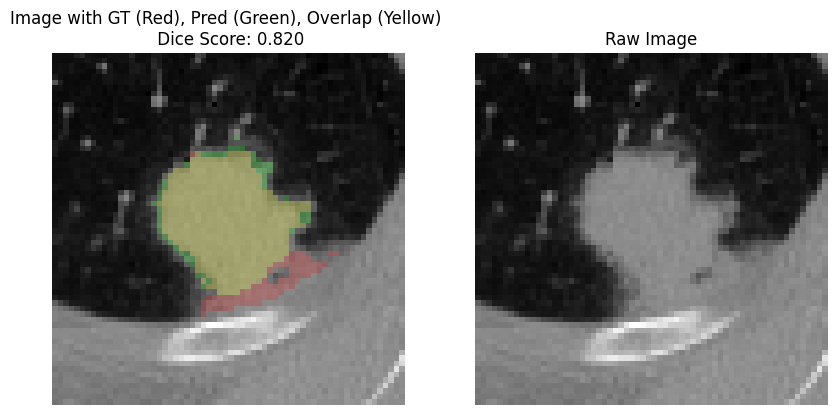

16
Displaying overlay for NLST1063 (0.836_8/16):
  Image: NLST1063_slice_34.npy
  Mask: NLST1063_slice_34.npy
  Prediction: NLST1063_slice_34_predmask.npy


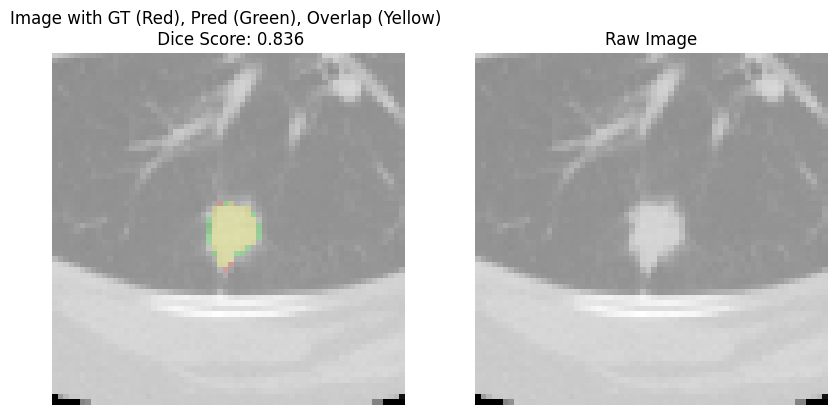

16
Displaying overlay for NLST1035 (0.860_9/16):
  Image: NLST1035_slice_31.npy
  Mask: NLST1035_slice_31.npy
  Prediction: NLST1035_slice_31_predmask.npy


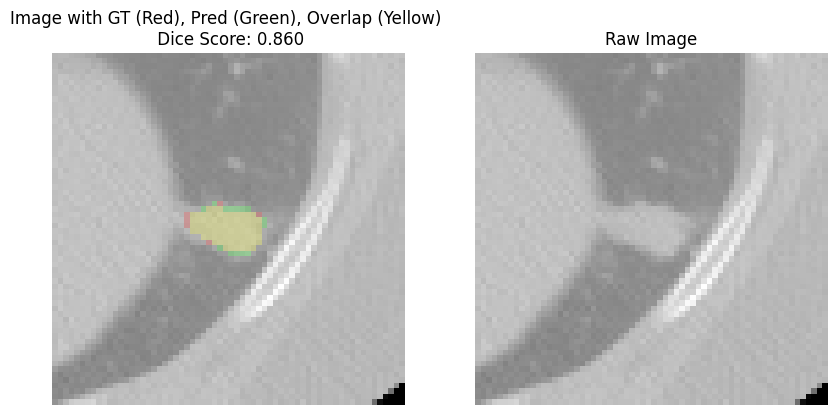

16
Displaying overlay for NLST1149 (0.867_10/16):
  Image: NLST1149_slice_28.npy
  Mask: NLST1149_slice_28.npy
  Prediction: NLST1149_slice_28_predmask.npy


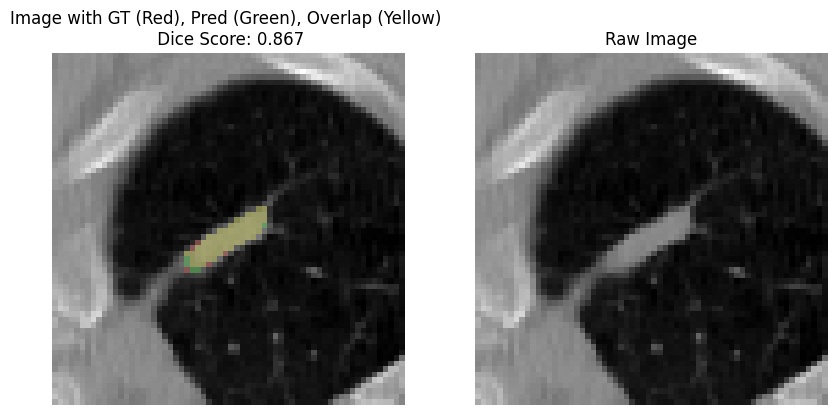

16
Displaying overlay for NLST1134 (0.890_11/16):
  Image: NLST1134_slice_33.npy
  Mask: NLST1134_slice_33.npy
  Prediction: NLST1134_slice_33_predmask.npy


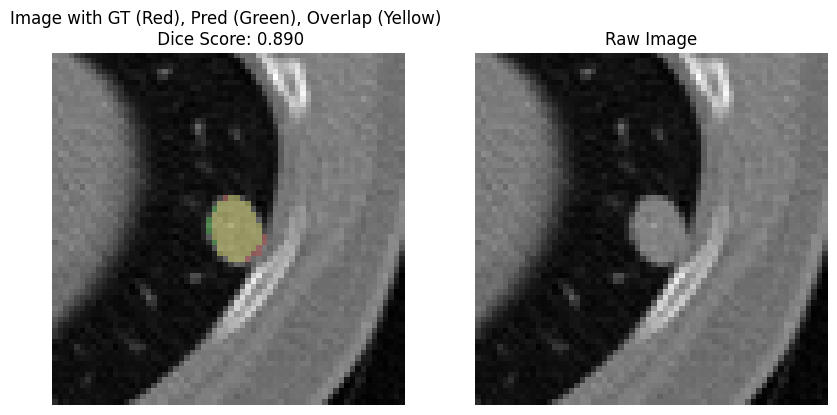

16
Displaying overlay for NLST1177 (0.903_12/16):
  Image: NLST1177_slice_26.npy
  Mask: NLST1177_slice_26.npy
  Prediction: NLST1177_slice_26_predmask.npy


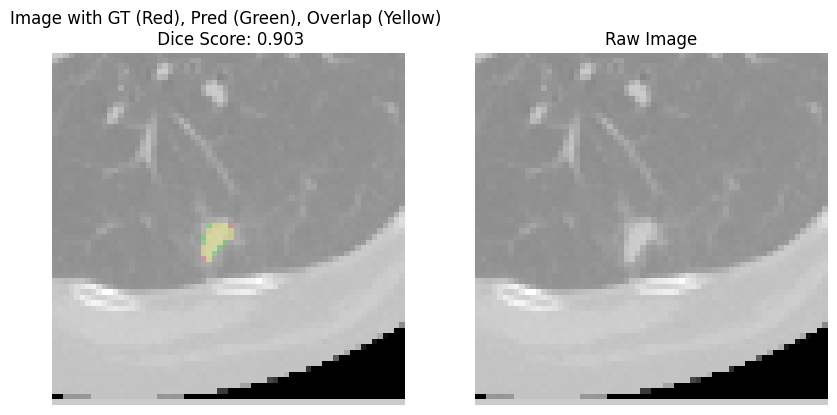

16
Displaying overlay for NLST1072 (0.904_13/16):
  Image: NLST1072_slice_31.npy
  Mask: NLST1072_slice_31.npy
  Prediction: NLST1072_slice_31_predmask.npy


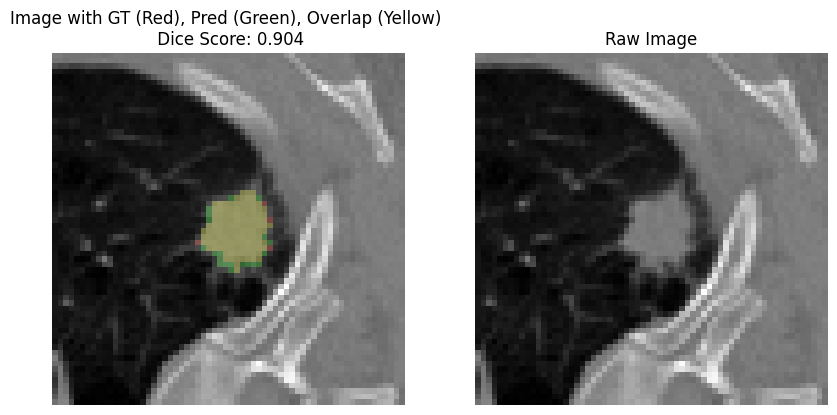

16
Displaying overlay for NLST1106 (0.911_14/16):
  Image: NLST1106_slice_32.npy
  Mask: NLST1106_slice_32.npy
  Prediction: NLST1106_slice_32_predmask.npy


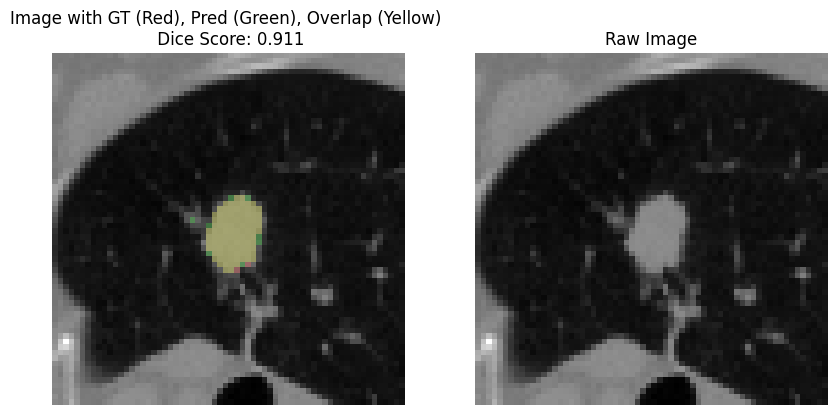

16
Displaying overlay for NLST1146 (0.921_15/16):
  Image: NLST1146_slice_33.npy
  Mask: NLST1146_slice_33.npy
  Prediction: NLST1146_slice_33_predmask.npy


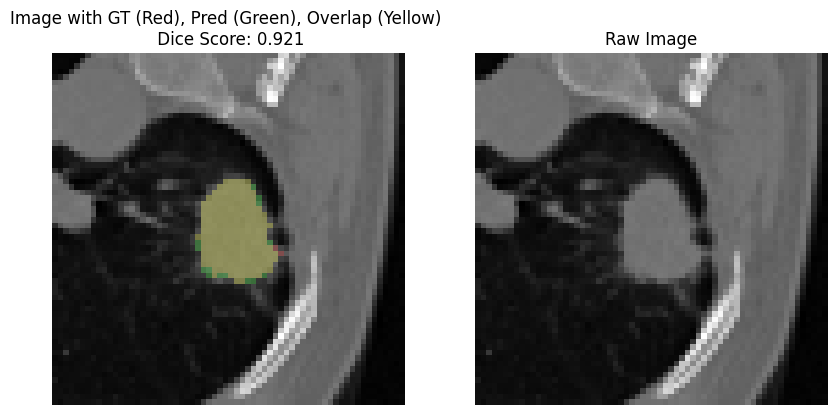

In [24]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap, Normalize # Added for custom colormap

ucla_csv_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_UCLA.csv'
nlst_csv_path = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/results_statistic_final_checkpoint_25-05-11_18:39:46_updated_trimmed_NLST.csv'

ucla_df = pd.read_csv(ucla_csv_path)
nlst_df = pd.read_csv(nlst_csv_path)

def get_criteria_sub_df(df, column, criteria: str|tuple):
    
    if isinstance(criteria, str):
        criteria_df = df[df[column] == criteria]
    elif isinstance(criteria, float):
        criteria_df = df[df[column] == criteria]
    elif isinstance(criteria, tuple):
        lower_bound = criteria[0]
        if lower_bound == -1:
            lower_bound = df[column].min()
        upper_bound = criteria[1]
        if upper_bound == -1:
            upper_bound = df[column].max()
        criteria_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        return ValueError(f"Invalid criteria type: {type(criteria)}")
    
    criteria_df = criteria_df[["New Filename", column, "dice_score"]]
    criteria_df = criteria_df.sort_values(by='dice_score', ascending=True).reset_index(drop=True)
    print(len(criteria_df))
    return criteria_df

def get_image_path(filename, image_dir, mask_dir):
    image_paths = glob.glob(os.path.join(image_dir, f"{filename}_*.npy"))
    mask_paths = glob.glob(os.path.join(mask_dir, f"{filename}_*.npy"))
    sorted_image_paths = sorted(image_paths, key=lambda x: int(x.split('_')[-1].replace('.npy', '')))
    sorted_mask_paths = sorted(mask_paths, key=lambda x: int(x.split('_')[-1].replace('.npy', '')))
    return sorted_image_paths, sorted_mask_paths

def get_pred_path(filename, pred_dir):
    pred_parent_dir = os.path.join(pred_dir, filename)
    pred_paths = glob.glob(os.path.join(pred_parent_dir, f"*.npy"))
    pred_paths.sort(key=lambda x: int(x.split('_')[-2]))
    return pred_paths

def overlay_image_mask_pred(image_path, mask_path, pred_path, alpha=0.5, dice_score=None):
    """
    Overlays ground truth mask (red) and prediction mask (green) on an image.
    The image is displayed in grayscale.
    The ground truth mask is displayed in red.
    The prediction mask is displayed in green.
    The overlapping area between the ground truth and prediction is displayed in yellow.
    All overlays have adjustable transparency.

    Parameters:
    - image_path (str): Path to the .npy file for the image.
    - mask_path (str): Path to the .npy file for the ground truth mask.
    - pred_path (str): Path to the .npy file for the prediction mask.
    - alpha (float): Transparency level for the mask overlays (0.0 to 1.0).
    """
    image = np.load(image_path)
    gt_mask = np.load(mask_path)      # Ground truth mask
    pred_mask = np.load(pred_path)    # Prediction mask

    # Ensure masks are boolean (0 or 1)
    gt_mask = gt_mask.astype(bool)
    pred_mask = pred_mask.astype(bool)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Display the grayscale image
    ax[0].imshow(image, cmap='gray')
    ax[1].imshow(image, cmap='gray')


    # Create an RGBA image for the overlays, initialized to fully transparent
    overlay_rgba = np.zeros((image.shape[0], image.shape[1], 4))

    # Define colors with specified alpha: R, G, B, Alpha
    red_color = np.array([1, 0, 0, alpha])    # Red for ground truth only
    green_color = np.array([0, 1, 0, alpha])  # Green for prediction only
    yellow_color = np.array([1, 1, 0, alpha]) # Yellow for overlap (Red + Green)

    # Apply colors based on mask conditions:
    # 1. Ground truth only (pixels in gt_mask but not in pred_mask)
    gt_only_area = gt_mask & ~pred_mask
    overlay_rgba[gt_only_area] = red_color

    # 2. Prediction only (pixels in pred_mask but not in gt_mask)
    pred_only_area = ~gt_mask & pred_mask
    overlay_rgba[pred_only_area] = green_color

    # 3. Overlap (pixels in both gt_mask and pred_mask)
    overlap_area = gt_mask & pred_mask
    overlay_rgba[overlap_area] = yellow_color
    
    # Overlay the colored masks onto the image
    # The alpha channel in overlay_rgba handles the transparency
    ax[0].imshow(overlay_rgba)

    ax[0].set_title(f"Image with GT (Red), Pred (Green), Overlap (Yellow) \n Dice Score: {dice_score:.3f}")
    ax[1].set_title(f"Raw Image")
    ax[0].axis('off')  # Hide axis ticks and labels for cleaner image display
    ax[1].axis('off')
    plt.show()

    return True

def overlay_image_and_mask_example(df, column, criteria, index, image_dir, mask_dir, pred_dir, alpha=0.3, slice_index=None):
    ucla_sub_df = get_criteria_sub_df(df, column, criteria)
    filename = ucla_sub_df["New Filename"].iloc[index]
    image_paths, mask_paths = get_image_path(filename, image_dir, mask_dir)
    pred_paths = get_pred_path(filename, pred_dir)

    if len(image_paths) == len(mask_paths) == len(pred_paths):
        if slice_index is None:
            slice_index = len(image_paths) // 2
        else:
            slice_index = slice_index
    else:
        print(f"Error: Mismatch in number of image, mask, and prediction paths for {filename}.")
        print(f"Image paths: {len(image_paths)}")
        print(f"Mask paths: {len(mask_paths)}")
        print(f"Prediction paths: {len(pred_paths)}")
        return
    
    selected_image_path = image_paths[slice_index]
    selected_mask_path = mask_paths[slice_index] # Assuming mask_paths has same length as image_paths
    selected_pred_path = pred_paths[slice_index]

    print(f"Displaying overlay for {filename} ({ucla_sub_df['dice_score'].iloc[index]:.3f}_{index}/{len(ucla_sub_df)}):")
    print(f"  Image: {os.path.basename(selected_image_path)}")
    print(f"  Mask: {os.path.basename(selected_mask_path)}")
    print(f"  Prediction: {os.path.basename(selected_pred_path)}")

    dice_score = ucla_sub_df['dice_score'].iloc[index]

    overlay_image_mask_pred(selected_image_path, selected_mask_path, selected_pred_path, alpha=alpha, dice_score=dice_score)

image_dir = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/splits/val/images_2D_2axis'
mask_dir = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/data/splits/val/masks_2D_2axis'
pred_dir = '/radraid2/dongwoolee/VNet_LungNoduleSeg/richard/results/final_checkpoint_25-05-11_18:39:46/predicted_masks'

data = nlst_df
column = 'pos_voxels'
criteria = (500, -1)
for i in np.arange(0, 16, 1):
    overlay_image_and_mask_example(data, column, criteria, i, image_dir, mask_dir, pred_dir, alpha=0.2)
